## Pre

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Preparation

In [ ]:
# Data dec to feb
data_dir = 'DATA'
file_path = os.path.join(data_dir, 'dataset.csv')
burnt = pd.read_csv(file_path, sep=',')# on_bad_lines='skip') # on_bad_lines='skip' will skip lines that cause errors.
burnt['Date'] = pd.to_datetime(burnt['Date']).dt.strftime('%Y/%m/%d')
burnt

,Date,suburb,status,time,station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed Max Wind Gust,Time Max Wind Gust
0,2023/12/01,Hamersley,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,WSW,33.0,16.0
1,2023/12/01,Mariginiup,ADVICE,10,Pearce,15.3,37.0,0.0,10.0,12.6,ESE,54.0,5.0
2,2023/12/01,Wanneroo,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,WSW,33.0,16.0
3,2023/12/02,Hamersley,ADVICE,10,Perth,20.0,26.3,0.0,9.0,10.9,SW,31.0,12.0
4,2023/12/02,Mariginiup,ADVICE,10,Pearce,15.0,30.0,0.0,10.0,10.9,SW,41.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2025/01/31,Ocean Reef,EMERGENCY WARNING,13,Swanbourne,20.7,28.2,0.0,10.0,12.1,S,35.0,18.0
1693,2025/01/31,Ocean Reef,WATCH AND ACT,15,Swanbourne,20.7,28.2,0.0,10.0,12.1,S,35.0,18.0
1694,2025/01/31,Orange Grove,ADVICE,10,Bickley,19.2,33.3,0.0,10.0,12.1,SW,35.0,17.0
1695,2025/01/31,Orange Grove,EMERGENCY WARNING,13,Bickley,19.2,33.3,0.0,10.0,12.1,SW,35.0,17.0


In [ ]:
# Filter the DataFrame
burnt = burnt[burnt['status'].isin(['ADVICE', 'WATCH AND ACT', 'EMERGENCY WARNING'])]
burnt

,Date,suburb,status,time,station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed Max Wind Gust,Time Max Wind Gust
0,2023/12/01,Hamersley,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,WSW,33.0,16.0
1,2023/12/01,Mariginiup,ADVICE,10,Pearce,15.3,37.0,0.0,10.0,12.6,ESE,54.0,5.0
2,2023/12/01,Wanneroo,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,WSW,33.0,16.0
3,2023/12/02,Hamersley,ADVICE,10,Perth,20.0,26.3,0.0,9.0,10.9,SW,31.0,12.0
4,2023/12/02,Mariginiup,ADVICE,10,Pearce,15.0,30.0,0.0,10.0,10.9,SW,41.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2025/01/31,Ocean Reef,EMERGENCY WARNING,13,Swanbourne,20.7,28.2,0.0,10.0,12.1,S,35.0,18.0
1693,2025/01/31,Ocean Reef,WATCH AND ACT,15,Swanbourne,20.7,28.2,0.0,10.0,12.1,S,35.0,18.0
1694,2025/01/31,Orange Grove,ADVICE,10,Bickley,19.2,33.3,0.0,10.0,12.1,SW,35.0,17.0
1695,2025/01/31,Orange Grove,EMERGENCY WARNING,13,Bickley,19.2,33.3,0.0,10.0,12.1,SW,35.0,17.0


In [ ]:
# Wind direction mapping
wind_direction_mapping = {
    'N': 1, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
burnt['Direction Max Wind Gust'] = burnt['Direction Max Wind Gust'].map(wind_direction_mapping).fillna(0)
# Check for NaN values in the 'Direction Max Wind Gust' column
nan_wind_dir = burnt['Direction Max Wind Gust'].isna().sum()
print(f"Number of NaN values in 'Direction Max Wind Gust' column: {nan_wind_dir}")

Number of NaN values in 'Direction Max Wind Gust' column: 0


/tmp/ipython-input-69229991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burnt['Direction Max Wind Gust'] = burnt['Direction Max Wind Gust'].map(wind_direction_mapping).fillna(0)


In [ ]:
burnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 1696
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1562 non-null   object 
 1   suburb                   1562 non-null   object 
 2   status                   1562 non-null   object 
 3   time                     1562 non-null   int64  
 4   station                  1562 non-null   object 
 5   Minimum Temperature      1562 non-null   float64
 6   Maximum Temperature      1562 non-null   float64
 7   Rainfall                 1562 non-null   float64
 8   Evaporation              1562 non-null   float64
 9   Sunshine                 1562 non-null   float64
 10  Direction Max Wind Gust  1562 non-null   float64
 11  Speed Max Wind Gust      1562 non-null   float64
 12  Time Max Wind Gust       1562 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 203.1+ KB


In [ ]:
# Check for NaN values
nan_values = burnt.isna().sum()
print("NaN values:\n", nan_values)

NaN values:
 Date                       0
suburb                     0
status                     0
time                       0
station                    0
Minimum Temperature        0
Maximum Temperature        0
Rainfall                   0
Evaporation                0
Sunshine                   0
Direction Max Wind Gust    0
Speed Max Wind Gust        0
Time Max Wind Gust         0
dtype: int64


##EDA


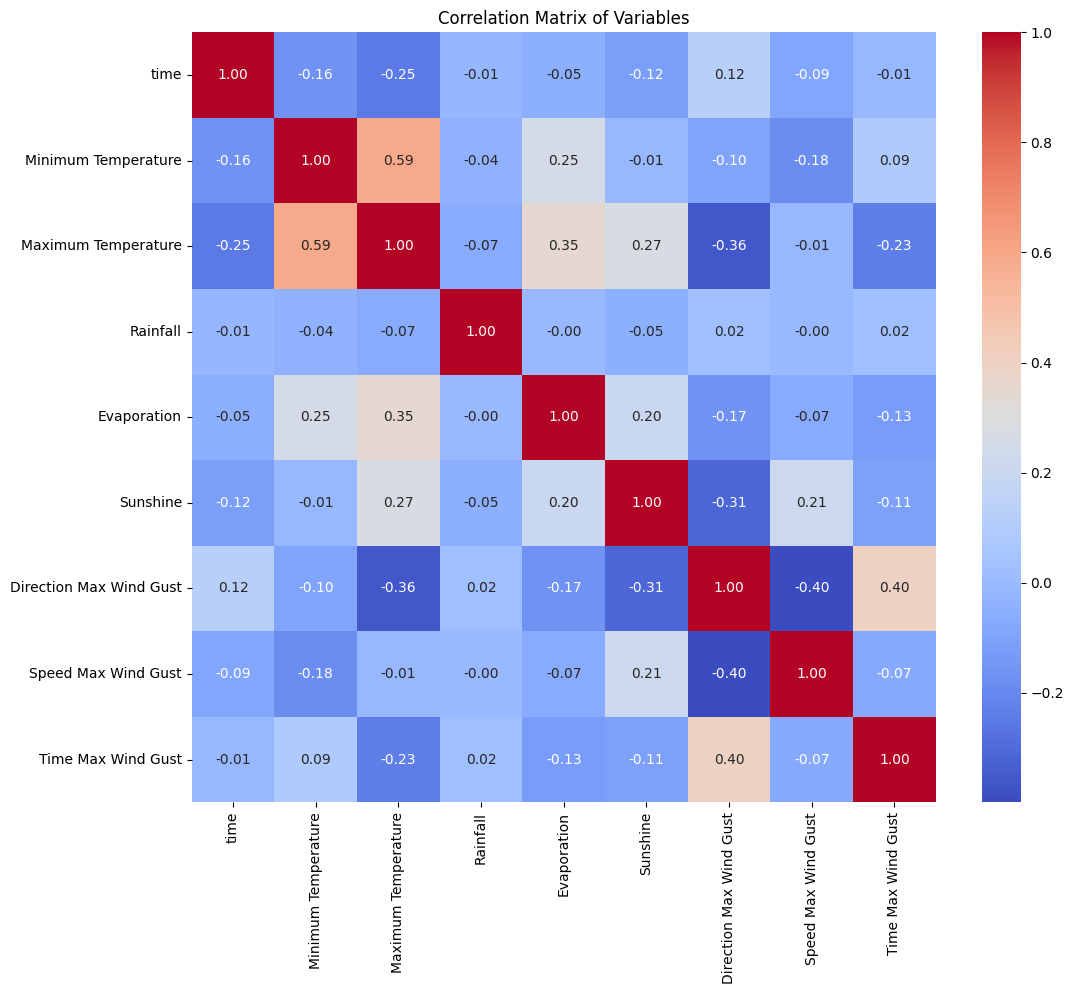

In [ ]:
# Calculate the correlation matrix
numerical_df = burnt.select_dtypes(include=['number'])

correlation_matrixa = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrixa, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

Skipping column 'Date' as it's not numeric.
Skipping column 'suburb' as it's not numeric.
Skipping column 'status' as it's not numeric.
Skipping column 'station' as it's not numeric.


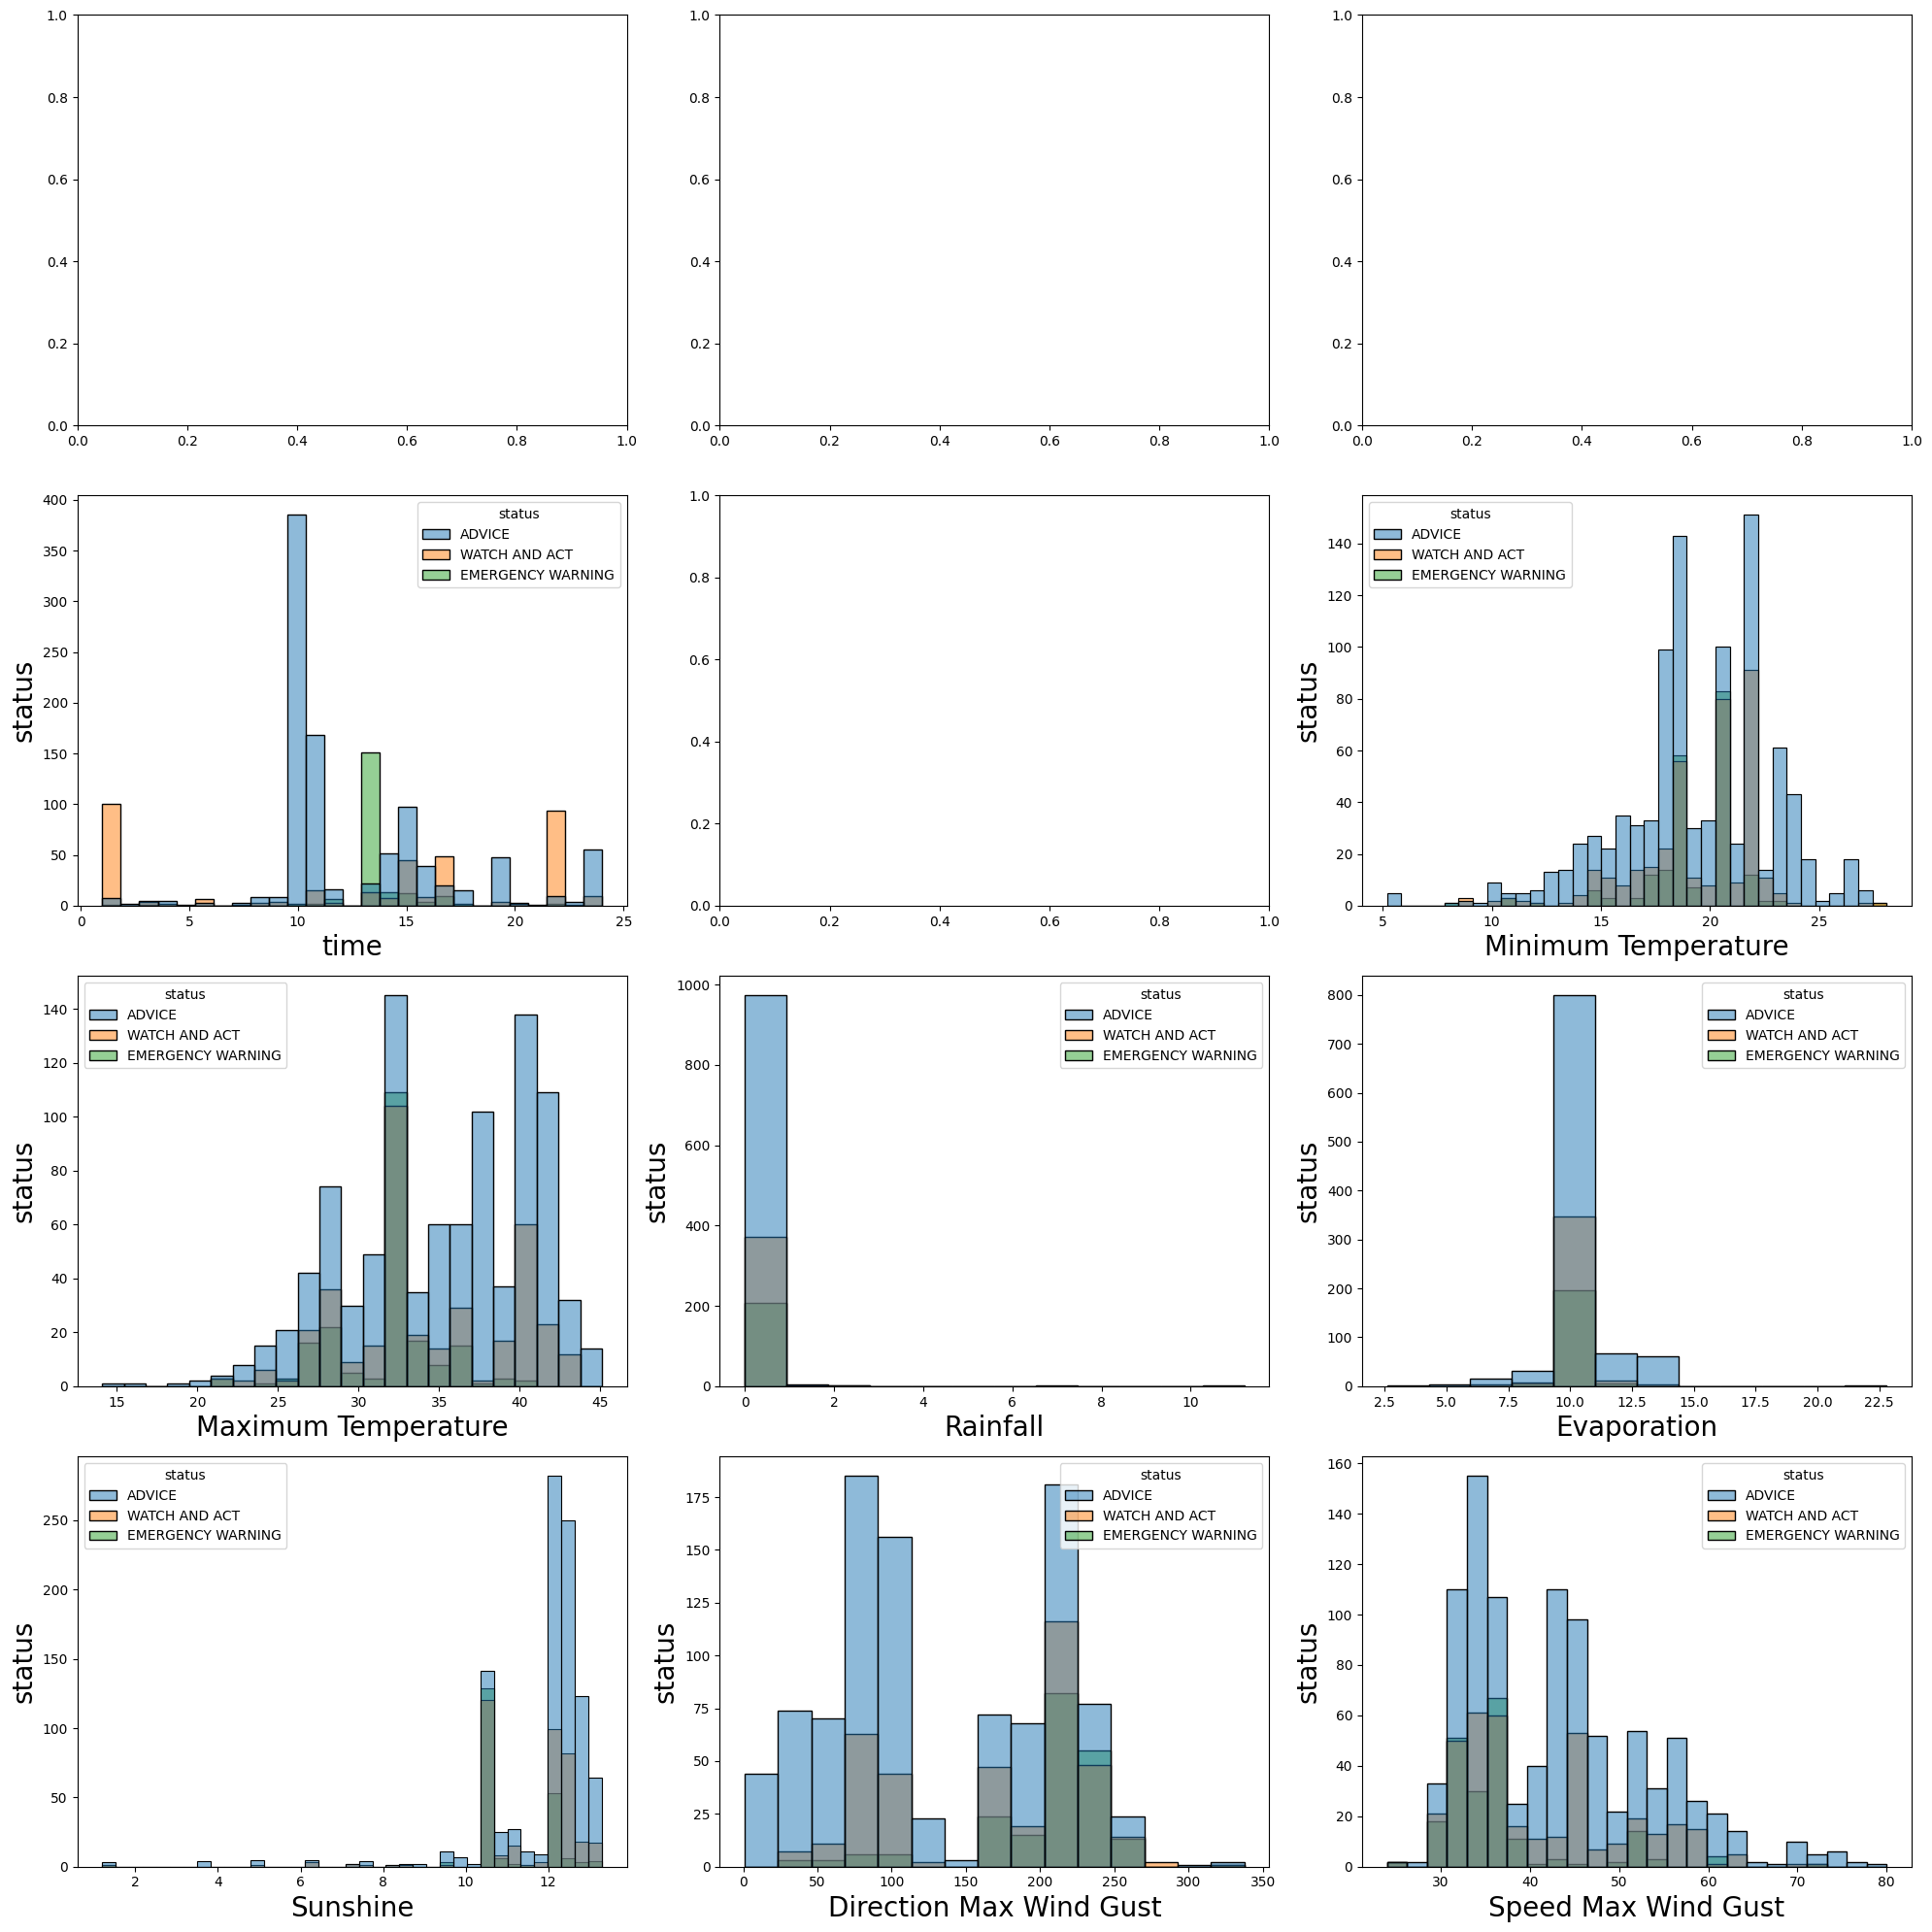

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in burnt:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        # Check if the column is numeric and plot only numeric columns
        if pd.api.types.is_numeric_dtype(burnt[column]):
            sns.histplot(x=burnt[column],hue=burnt['status'])
            plt.xlabel(column,fontsize=20)
            plt.ylabel('status',fontsize=20)
        else:
            print(f"Skipping column '{column}' as it's not numeric.")
    plotnumber+=1
plt.tight_layout()

In [ ]:
burnt

,Date,suburb,status,time,station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed Max Wind Gust,Time Max Wind Gust
0,2023/12/01,Hamersley,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,247.5,33.0,16.0
1,2023/12/01,Mariginiup,ADVICE,10,Pearce,15.3,37.0,0.0,10.0,12.6,112.5,54.0,5.0
2,2023/12/01,Wanneroo,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,247.5,33.0,16.0
3,2023/12/02,Hamersley,ADVICE,10,Perth,20.0,26.3,0.0,9.0,10.9,225.0,31.0,12.0
4,2023/12/02,Mariginiup,ADVICE,10,Pearce,15.0,30.0,0.0,10.0,10.9,225.0,41.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2025/01/31,Ocean Reef,EMERGENCY WARNING,13,Swanbourne,20.7,28.2,0.0,10.0,12.1,180.0,35.0,18.0
1693,2025/01/31,Ocean Reef,WATCH AND ACT,15,Swanbourne,20.7,28.2,0.0,10.0,12.1,180.0,35.0,18.0
1694,2025/01/31,Orange Grove,ADVICE,10,Bickley,19.2,33.3,0.0,10.0,12.1,225.0,35.0,17.0
1695,2025/01/31,Orange Grove,EMERGENCY WARNING,13,Bickley,19.2,33.3,0.0,10.0,12.1,225.0,35.0,17.0


Skipping column 'Date' as it's not numeric.
Skipping column 'suburb' as it's not numeric.
Skipping column 'status' as it's not numeric.
Skipping column 'station' as it's not numeric.


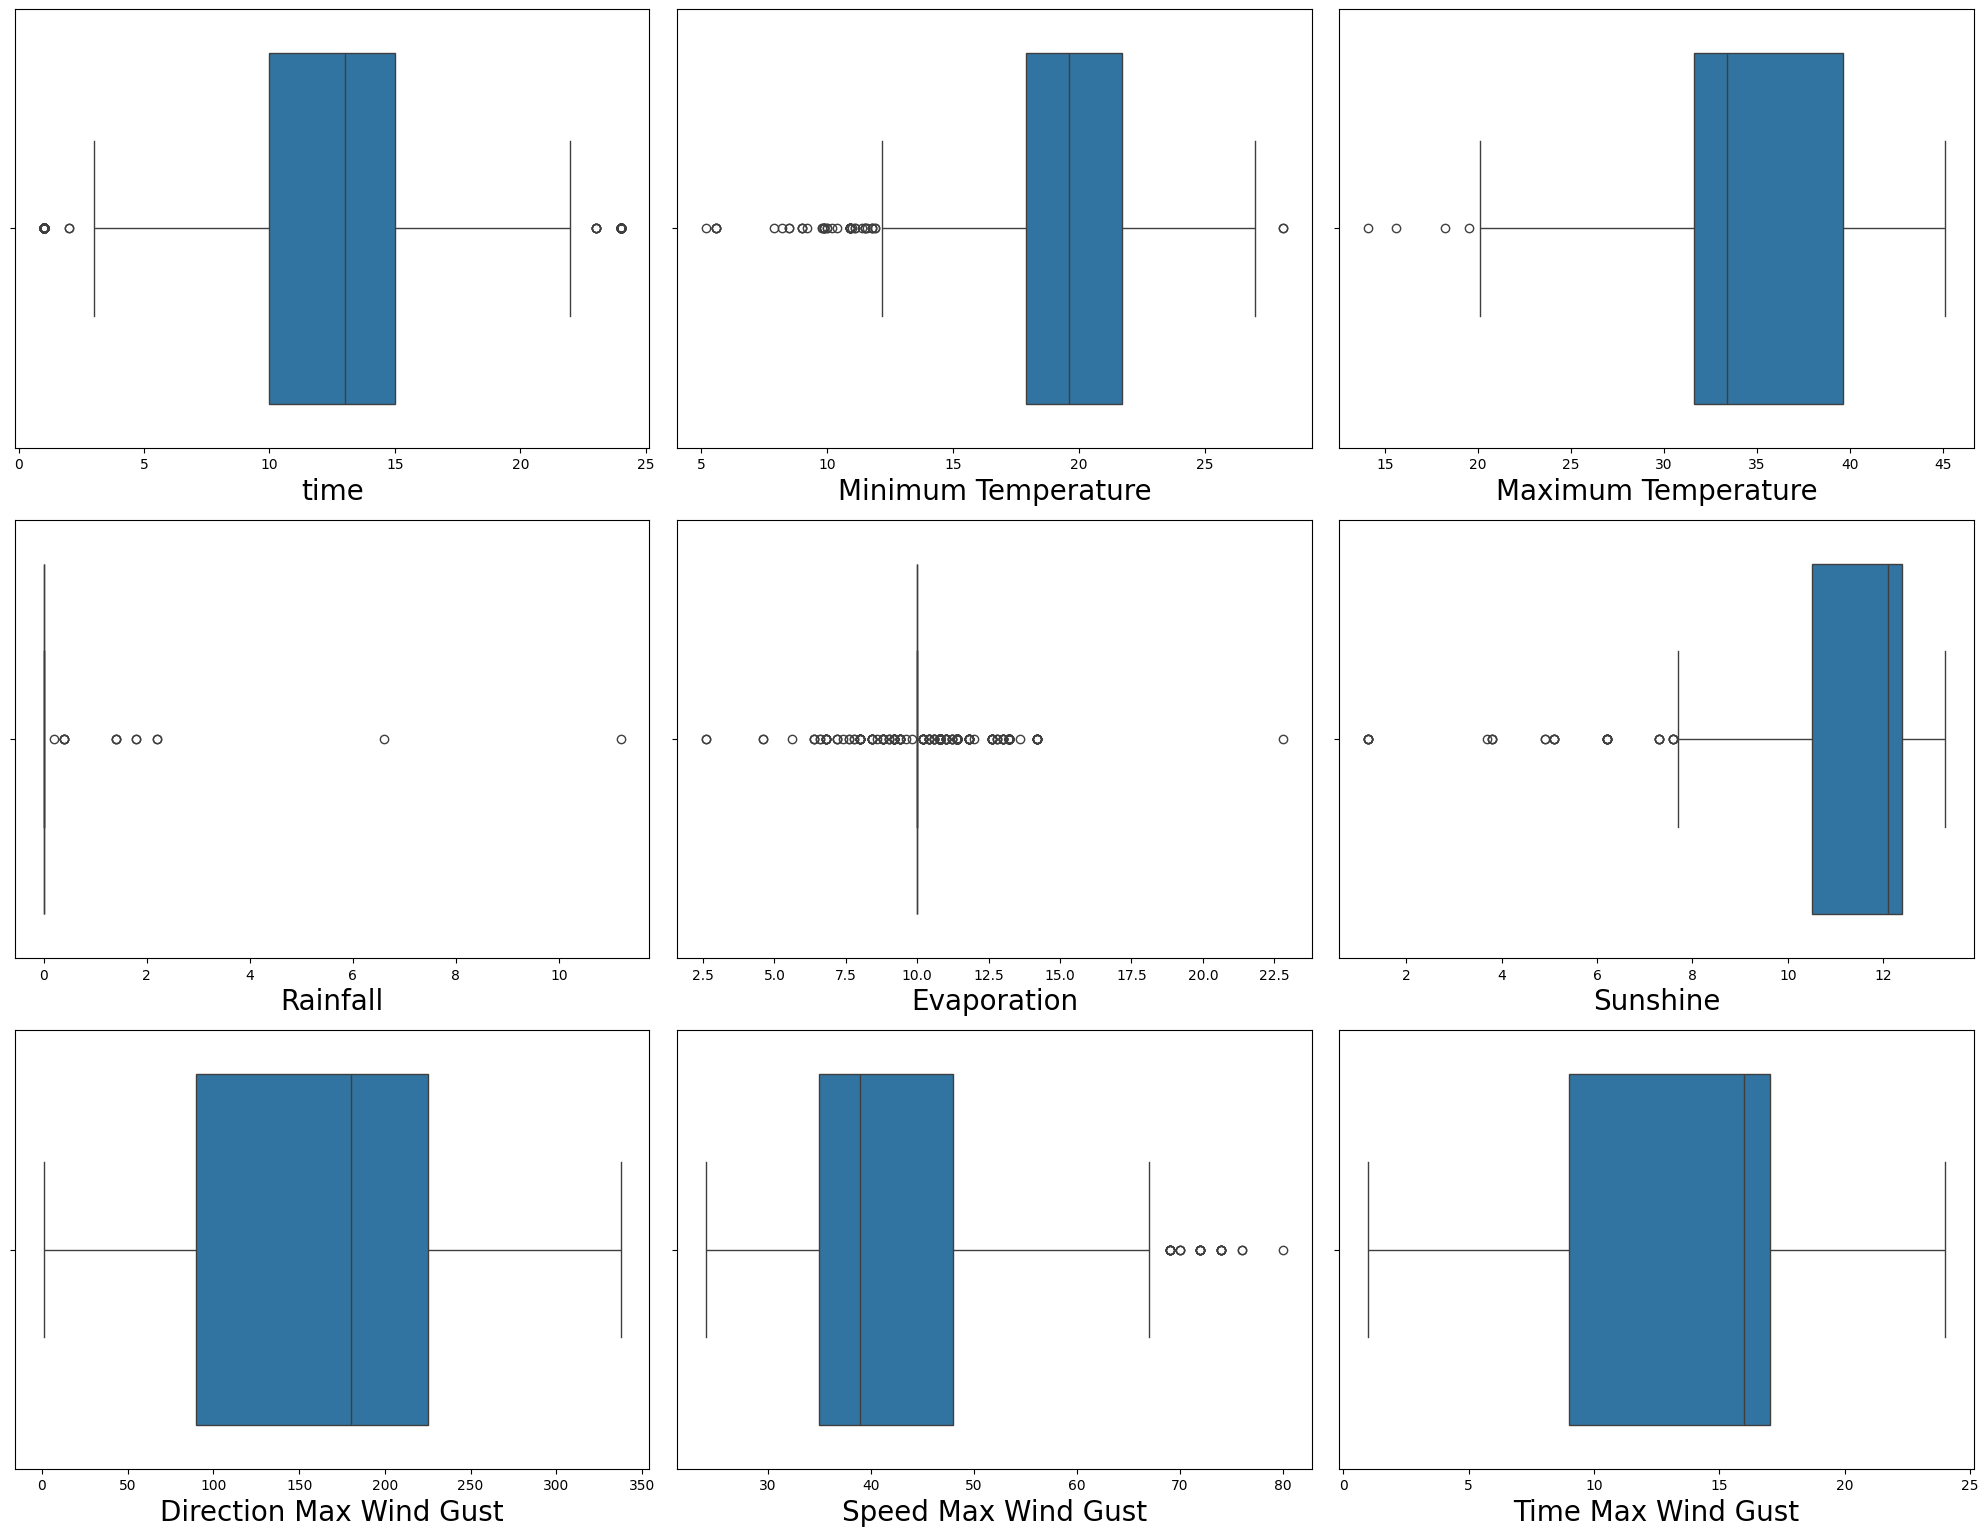

In [ ]:
# prompt: buatin box plot per variabel dan tampilkan plotnya yg bisa di buat, yg di skip gausa dibuat plotnya\

plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1
for column in burnt:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        # Check if the column is numeric and plot only numeric columns
        if pd.api.types.is_numeric_dtype(burnt[column]):
            sns.boxplot(x=burnt[column])
            plt.xlabel(column, fontsize=20)
            plotnumber += 1
        else:
            print(f"Skipping column '{column}' as it's not numeric.")

plt.tight_layout()
plt.show()

Skipping column 'Date' as it's not numeric or is in the skip list.
Skipping column 'suburb' as it's not numeric or is in the skip list.
Skipping column 'status' as it's not numeric or is in the skip list.
Skipping column 'station' as it's not numeric or is in the skip list.


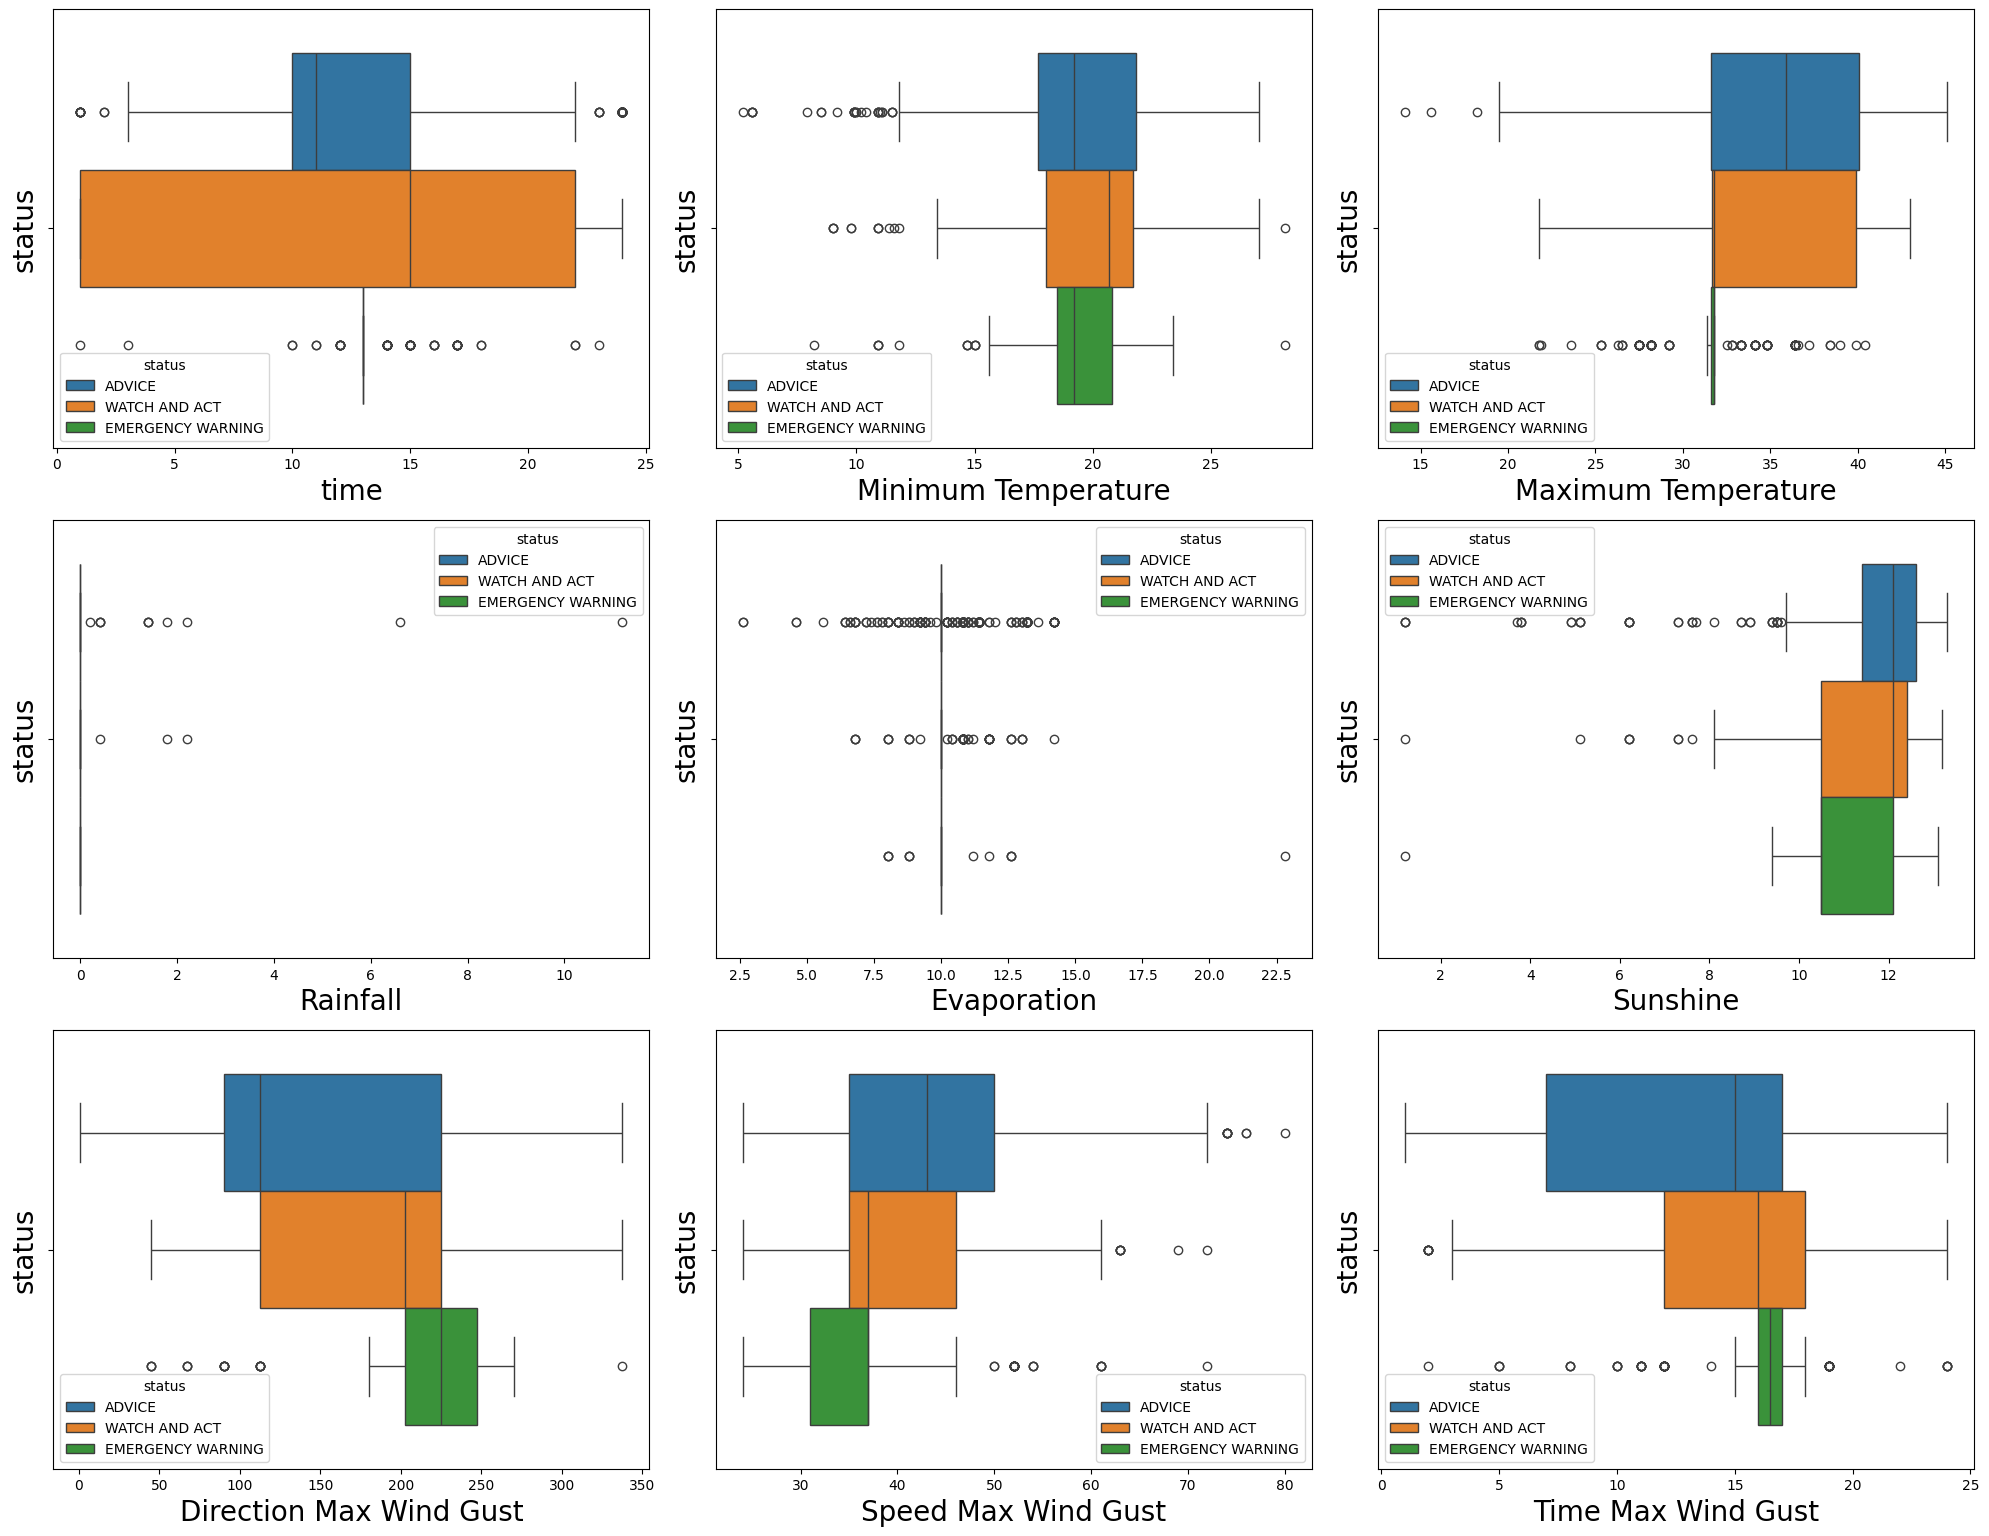

In [ ]:
# prompt: buaitn box plot tiap variabel, yg di skip tidak perlu ditampilkan boxplotnya

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in burnt:
    # Skip non-numeric columns and specific numeric columns
    if pd.api.types.is_numeric_dtype(burnt[column]) and column not in ['Incident ID', 'status']:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(x=burnt[column], hue=burnt['status'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('status',fontsize=20)
        plotnumber+=1
    else:
        print(f"Skipping column '{column}' as it's not numeric or is in the skip list.")
plt.tight_layout()
plt.show()

In [ ]:
burnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 1696
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1562 non-null   object 
 1   suburb                   1562 non-null   object 
 2   status                   1562 non-null   object 
 3   time                     1562 non-null   int64  
 4   station                  1562 non-null   object 
 5   Minimum Temperature      1562 non-null   float64
 6   Maximum Temperature      1562 non-null   float64
 7   Rainfall                 1562 non-null   float64
 8   Evaporation              1562 non-null   float64
 9   Sunshine                 1562 non-null   float64
 10  Direction Max Wind Gust  1562 non-null   float64
 11  Speed Max Wind Gust      1562 non-null   float64
 12  Time Max Wind Gust       1562 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 203.1+ KB


In [ ]:
# @title Minimum Temperature vs Maximum Temperature

from matplotlib import pyplot as plt
burnt.plot(kind='scatter', x='Minimum Temperature', y='Maximum Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title status

from matplotlib import pyplot as plt
import seaborn as sns
burnt.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
burnt

In [ ]:
# @title time

from matplotlib import pyplot as plt
burnt['time'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data Encoding

In [ ]:
burnt['Date'] = pd.to_datetime(burnt['Date'])
burnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 1696
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1562 non-null   datetime64[ns]
 1   suburb                   1562 non-null   object        
 2   status                   1562 non-null   object        
 3   time                     1562 non-null   int64         
 4   station                  1562 non-null   object        
 5   Minimum Temperature      1562 non-null   float64       
 6   Maximum Temperature      1562 non-null   float64       
 7   Rainfall                 1562 non-null   float64       
 8   Evaporation              1562 non-null   float64       
 9   Sunshine                 1562 non-null   float64       
 10  Direction Max Wind Gust  1562 non-null   float64       
 11  Speed Max Wind Gust      1562 non-null   float64       
 12  Time Max Wind Gust       1562 non-null 

/tmp/ipython-input-316398172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burnt['Date'] = pd.to_datetime(burnt['Date'])


In [ ]:
proc_df = burnt.copy()
proc_df

,Date,suburb,status,time,station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed Max Wind Gust,Time Max Wind Gust
0,2023-12-01,Hamersley,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,247.5,33.0,16.0
1,2023-12-01,Mariginiup,ADVICE,10,Pearce,15.3,37.0,0.0,10.0,12.6,112.5,54.0,5.0
2,2023-12-01,Wanneroo,ADVICE,10,Perth,18.6,35.3,0.0,7.6,12.6,247.5,33.0,16.0
3,2023-12-02,Hamersley,ADVICE,10,Perth,20.0,26.3,0.0,9.0,10.9,225.0,31.0,12.0
4,2023-12-02,Mariginiup,ADVICE,10,Pearce,15.0,30.0,0.0,10.0,10.9,225.0,41.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2025-01-31,Ocean Reef,EMERGENCY WARNING,13,Swanbourne,20.7,28.2,0.0,10.0,12.1,180.0,35.0,18.0
1693,2025-01-31,Ocean Reef,WATCH AND ACT,15,Swanbourne,20.7,28.2,0.0,10.0,12.1,180.0,35.0,18.0
1694,2025-01-31,Orange Grove,ADVICE,10,Bickley,19.2,33.3,0.0,10.0,12.1,225.0,35.0,17.0
1695,2025-01-31,Orange Grove,EMERGENCY WARNING,13,Bickley,19.2,33.3,0.0,10.0,12.1,225.0,35.0,17.0


In [ ]:
# Definisikan ranking status
status_rank = {
    "EMERGENCY WARNING": 3,
    "WATCH AND ACT": 2,
    "ADVICE": 1   # di datasetmu tertulis "ADVICE" (uppercase)
}

proc_df["status_rank"] = proc_df["status"].map(status_rank)

# Urutkan: suburb, status_rank (descending), Date (descending)
df_sorted = proc_df.sort_values(["suburb", "status_rank", "Date"], ascending=[True, False, False])

# Ambil 1 baris terbaik per suburb
highest_status = df_sorted.groupby("suburb").head(1)[["suburb", "Date", "status"]].reset_index(drop=True)

# Simpan hasil kalau mau
highest_status.to_csv("highest_status_per_suburb.csv", index=False)

highest_status.head(10)


,suburb,Date,status
0,Alfred Cove,2025-01-31,EMERGENCY WARNING
1,Anketell,2025-01-31,EMERGENCY WARNING
2,Applecross,2025-01-31,EMERGENCY WARNING
3,Ardross,2025-01-31,EMERGENCY WARNING
4,Armadale,2025-01-31,EMERGENCY WARNING
5,Ascot,2025-01-31,EMERGENCY WARNING
6,Ashby,2025-01-29,WATCH AND ACT
7,Ashfield,2025-01-29,WATCH AND ACT
8,Attadale,2025-01-31,EMERGENCY WARNING
9,Atwell,2025-01-31,EMERGENCY WARNING


In [ ]:
# Ambil nama suburb dalam bentuk array/list
suburb_array = highest_status["suburb"].unique().tolist()

print(suburb_array)


['Alfred Cove', 'Anketell', 'Applecross', 'Ardross', 'Armadale', 'Ascot', 'Ashby', 'Ashfield', 'Attadale', 'Atwell', 'Aubin Grove', 'Aveley', 'Bailup', 'Balcatta', 'Baldivis', 'Ballajura', 'Banjup', 'Banksia Grove', 'Baskerville', 'Bassendean', 'Bateman', 'Bayswater', 'Beaconsfield', 'Beckenham', 'Bedford', 'Bedfordale', 'Beechboro', 'Beechina', 'Beeliar', 'Beldon', 'Belhus', 'Bellevue', 'Belmont', 'Bennett Springs', 'Bentley', 'Bertram', 'Bibra Lake', 'Bickley', 'Bicton', 'Booragoon', 'Boya', 'Brabham', 'Brigadoon', 'Brookdale', 'Bull Creek', 'Bullsbrook', 'Burns Beach', 'Burswood', 'Calista', 'Camillo', 'Canning Vale', 'Cannington', 'Cardup', 'Carine', 'Carlisle', 'Carmel', 'Carramar', 'Casuarina', 'Caversham', 'Champion Lakes', 'Chidlow', 'Churchlands', 'City Beach', 'Claremont', 'Cloverdale', 'Cockburn Central', 'Como', 'Connolly', 'Coogee', 'Coolbellup', 'Coolbinia', 'Cooloongup', 'Cottesloe', 'Crawley', 'Cullacabardee', 'Daglish', 'Dalkeith', 'Darch', 'Darling Downs', 'Dayton', '

In [ ]:
# Export the DataFrame 'df' as a CSV file named 'dataset.csv'
proc_df.to_csv('datasetA.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Ekstract Date
# proc_df['Date'] = pd.to_datetime(proc_df['Date']) # Convert 'Date' column to datetime
# Check for NaN values in the 'Date' column
nan_dates = proc_df['Date'].isna().sum()
print(f"Number of NaN values in 'Date' column: {nan_dates}")

# Extract year
proc_df['year'] = proc_df['Date'].dt.year
# Check for NaN values in the 'year' column
nan_year = proc_df['year'].isna().sum()
print(f"Number of NaN values in 'year' column: {nan_year}")

#Extract month
proc_df['month'] = proc_df['Date'].dt.month
# Check for NaN values in the 'month' column
nan_month = proc_df['month'].isna().sum()
print(f"Number of NaN values in 'month' column: {nan_month}")

#Extract day
proc_df['day'] = proc_df['Date'].dt.day
# Check for NaN values in the 'day' column
nan_day = proc_df['day'].isna().sum()
print(f"Number of NaN values in 'day' column: {nan_day}")

#Extract day of week
proc_df['day_of_week'] = proc_df['Date'].dt.dayofweek
# Check for NaN values in the 'day_of_week' column
nan_dow = proc_df['day_of_week'].isna().sum()
print(f"Number of NaN values in 'day_of_week' column: {nan_dow}")

Number of NaN values in 'Date' column: 0
Number of NaN values in 'year' column: 0
Number of NaN values in 'month' column: 0
Number of NaN values in 'day' column: 0
Number of NaN values in 'day_of_week' column: 0


In [ ]:
# Status encoding
status_mapping = {
    # 'SAFE': 1,
    'ADVICE': 0,
    'WATCH AND ACT': 1,
    'EMERGENCY WARNING': 2,
    # 'BURNT': 5
}

proc_df['status_encoded'] = proc_df['status'].map(status_mapping)
nan_status = proc_df['status_encoded'].isna().sum()
print(f"Number of NaN values in 'status_encoded' column: {nan_status}")
proc_df = proc_df.dropna(subset=['status_encoded'])

Number of NaN values in 'status_encoded' column: 0


In [ ]:
# Categorical encoding
categorical_columns = ['suburb', 'station']
for col in categorical_columns:
    # proc_df[col] = proc_df[col].fillna('Unknown')
    le = LabelEncoder()
    proc_df[f'{col}_encoded'] = le.fit_transform(proc_df[col])
    print(f"Hasil encoding untuk kolom '{col}':\n{proc_df[[col, f'{col}_encoded']]}\n")

Hasil encoding untuk kolom 'suburb':
            suburb  suburb_encoded
0        Hamersley             101
1       Mariginiup             170
2         Wanneroo             234
3        Hamersley             101
4       Mariginiup             170
...            ...             ...
1692    Ocean Reef             205
1693    Ocean Reef             205
1694  Orange Grove             207
1695  Orange Grove             207
1696  Orange Grove             207

[1562 rows x 2 columns]

Hasil encoding untuk kolom 'station':
         station  station_encoded
0          Perth                7
1         Pearce                6
2          Perth                7
3          Perth                7
4         Pearce                6
...          ...              ...
1692  Swanbourne                9
1693  Swanbourne                9
1694     Bickley                0
1695     Bickley                0
1696     Bickley                0

[1562 rows x 2 columns]



In [ ]:
proc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 1696
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1562 non-null   datetime64[ns]
 1   suburb                   1562 non-null   object        
 2   status                   1562 non-null   object        
 3   time                     1562 non-null   int64         
 4   station                  1562 non-null   object        
 5   Minimum Temperature      1562 non-null   float64       
 6   Maximum Temperature      1562 non-null   float64       
 7   Rainfall                 1562 non-null   float64       
 8   Evaporation              1562 non-null   float64       
 9   Sunshine                 1562 non-null   float64       
 10  Direction Max Wind Gust  1562 non-null   float64       
 11  Speed Max Wind Gust      1562 non-null   float64       
 12  Time Max Wind Gust       1562 non-null 

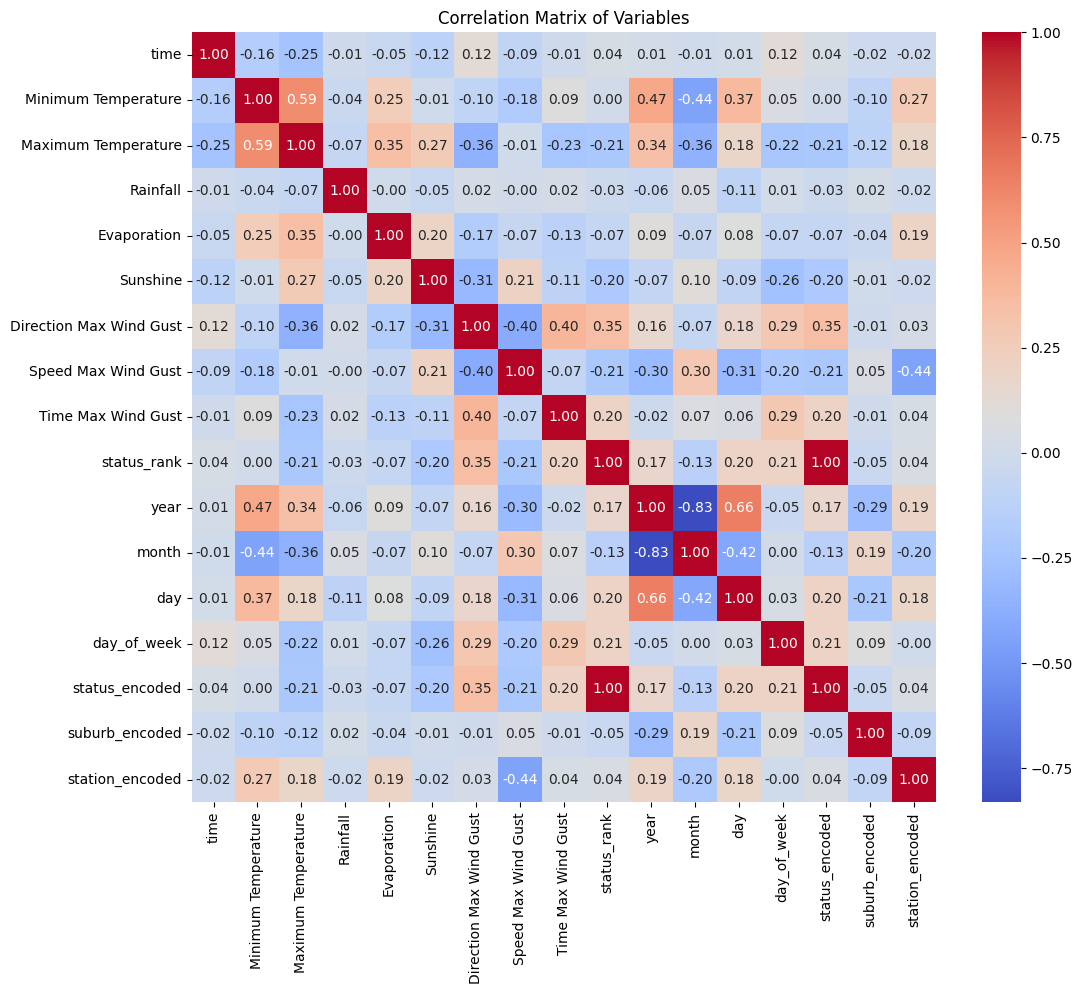

In [ ]:
# Calculate the correlation matrix
numeric_df = proc_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

## Data Balance

In [ ]:
features = [
            'month', 'day', 'day_of_week','year', 'time', 'suburb_encoded', 'station_encoded',
            'Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation',
            'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust'
        ]

In [ ]:
# feature matrix
X = proc_df[features]
y = proc_df['status_encoded']

In [ ]:
# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

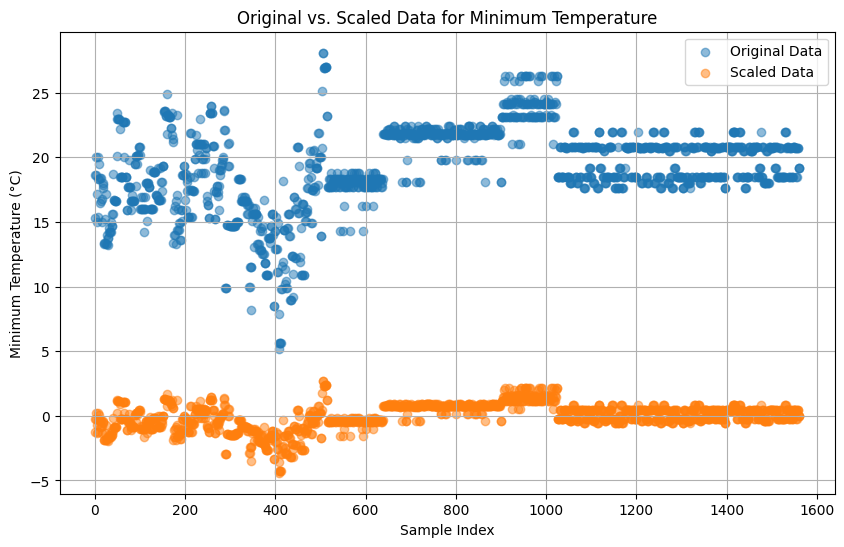

In [ ]:
# X: Original features
# X_scaled: Scaled features

# Select a feature to plot (e.g., 'Minimum Temperature')
feature_index = X.columns.get_loc('Minimum Temperature')


plt.figure(figsize=(10, 6))
plt.scatter(range(len(X.iloc[:, feature_index])), X.iloc[:, feature_index], label='Original Data', alpha=0.5)
plt.scatter(range(len(X_scaled[:, feature_index])), X_scaled[:, feature_index], label='Scaled Data', alpha=0.5)


plt.xlabel('Sample Index')
plt.ylabel('Minimum Temperature (°C)') # Use the original feature name
plt.title(f'Original vs. Scaled Data for {X.columns[feature_index]}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Random Over Sampler untuk balancing
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X_scaled, y)
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X_scaled, y)
# Print distribusi kelas
print("\nDistribusi kelas sebelum balancing:")
print(y.value_counts())
print("\nDistribusi kelas setelah balancing:")
print(pd.Series(y_balanced).value_counts())


Distribusi kelas sebelum balancing:
status_encoded
0    980
1    374
2    208
Name: count, dtype: int64

Distribusi kelas setelah balancing:
status_encoded
0    980
1    980
2    980
Name: count, dtype: int64


/tmp/ipython-input-3069982812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=pastel_palette, ax=axes[0])
/tmp/ipython-input-3069982812.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x=y, palette=pastel_palette, ax=axes[0])
/tmp/ipython-input-3069982812.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette=pastel_palette, ax=axes[1])
/tmp/ipython-input-3069982812.py:14: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x=y_balanced, palette=pastel_palette, ax=axes[1])


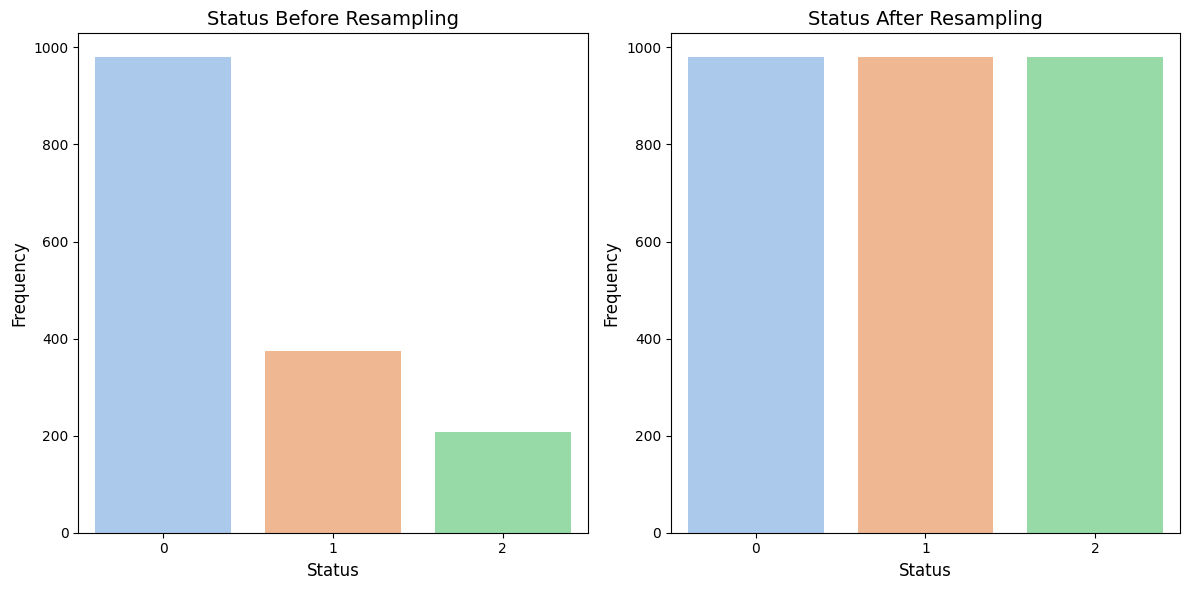

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define pastel color palette
pastel_palette = sns.color_palette("pastel")

# First plot: Before Balancing
sns.countplot(x=y, palette=pastel_palette, ax=axes[0])
axes[0].set_title('Status Before Resampling', fontsize=14)
axes[0].set_xlabel('Status', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Second plot: After Balancing
sns.countplot(x=y_balanced, palette=pastel_palette, ax=axes[1])
axes[1].set_title('Status After Resampling', fontsize=14)
axes[1].set_xlabel('Status', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

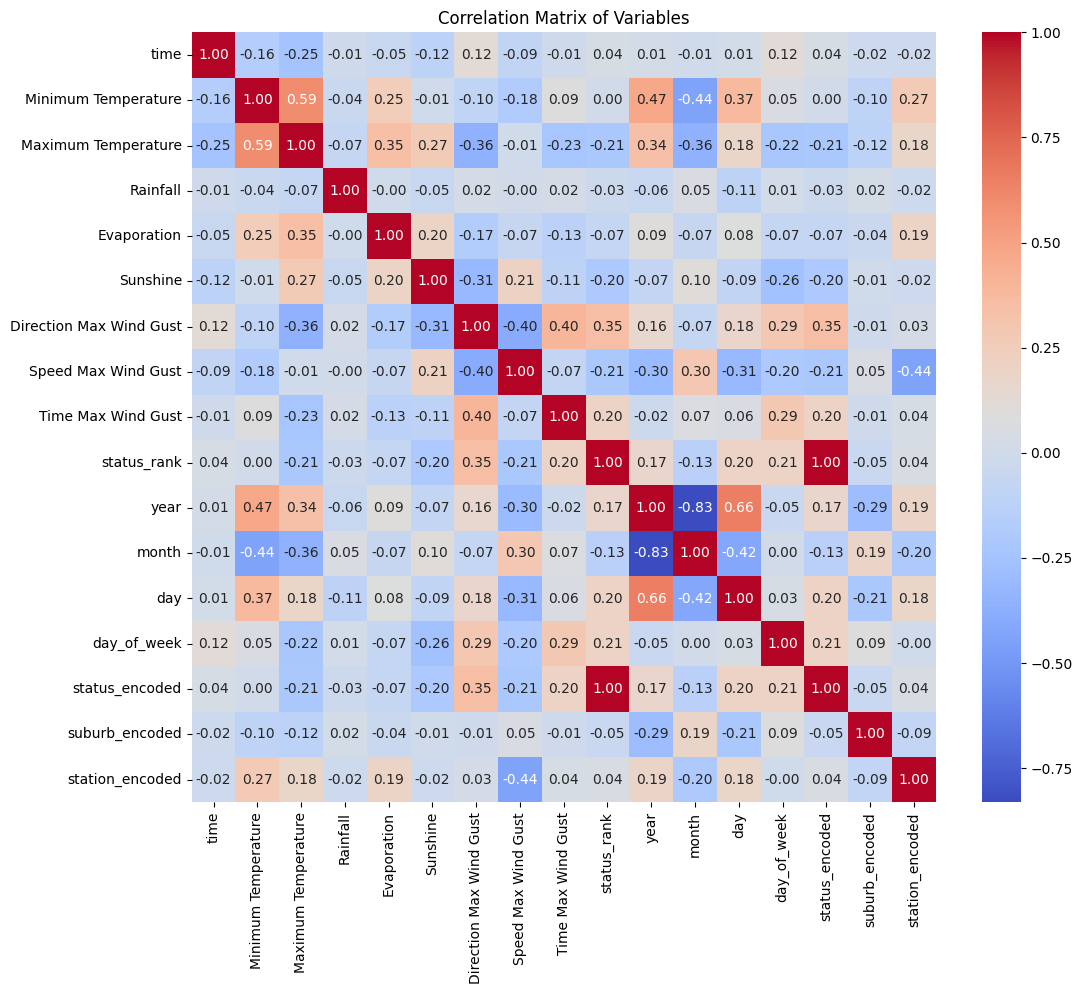

In [ ]:
import numpy as np
plt.figure(figsize=(12, 10))
# Calculate correlation for numerical columns only
num_cols = proc_df.select_dtypes(include=np.number).columns
sns.heatmap(proc_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Model

## SVM

### Skenario 1: Split 80:20

In [ ]:
# Split data
X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1 = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
print(len(X_train_svm1), len(y_train_svm1))
print(len(X_test_svm1), len(y_test_svm1))

2352 2352
588 588


Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.930707864660975
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       193
           1       0.88      0.94      0.91       200
           2       0.94      0.93      0.93       195

    accuracy                           0.92       588
   macro avg       0.92      0.92      0.92       588
weighted avg       0.92      0.92      0.92       588

F1-score: 0.9202745881125388


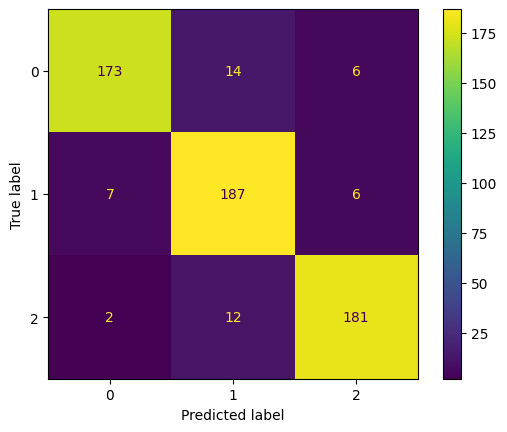

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'] # Kernel type
}

# Create the SVM model
svm_model = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_svm1, y_train_svm1)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best parameters
best_svm_model = grid_search.best_estimator_
svm1_pred = best_svm_model.predict(X_test_svm1)

print(classification_report(y_test_svm1, svm1_pred))
print(f"F1-score: {f1_score(y_test_svm1, svm1_pred,average='weighted')}")
ConfusionMatrixDisplay.from_predictions(y_test_svm1, svm1_pred)
plt.show()

In [ ]:
# Evaluasi pada data training
y_train_pred = best_svm_model.predict(X_train_svm1)
train_acc = accuracy_score(y_train_svm1, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_svm1, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_svm_model.predict(X_test_svm1)
test_acc = accuracy_score(y_test_svm1, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_svm1, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_svm1, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")


Training Accuracy: 0.9774659863945578
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       787
           1       0.95      0.99      0.97       780
           2       0.98      0.97      0.97       785

    accuracy                           0.98      2352
   macro avg       0.98      0.98      0.98      2352
weighted avg       0.98      0.98      0.98      2352


Testing Accuracy: 0.92
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       193
           1       0.88      0.94      0.91       200
           2       0.94      0.93      0.93       195

    accuracy                           0.92       588
   macro avg       0.92      0.92      0.92       588
weighted avg       0.92      0.92      0.92       588

F1-score: 0.9202745881125388
Difference (Training - Testing): 0.06


In [ ]:
# Calculate Accuracy
accuracy_svm1 = accuracy_score(y_test_svm1, svm1_pred)
print(f'Accuracy: {accuracy_svm1}')

# Calculate Precision
precision_svm1 = precision_score(y_test_svm1, svm1_pred, average='weighted')
print(f'Precision: {precision_svm1}')

# Calculate Recall
recall_svm1 = recall_score(y_test_svm1, svm1_pred, average='weighted')
print(f'Recall: {recall_svm1}')

# Calculate F1-score
f1_svm1 = f1_score(y_test_svm1, svm1_pred, average='weighted')
print(f'F1-score: {f1_svm1}')

Accuracy: 0.9200680272108843
Precision: 0.9216301804158701
Recall: 0.9200680272108843
F1-score: 0.9202745881125388


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 10 hingga 4
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_svm1, y_train_svm1)
    X_test_selected = selector.transform(X_test_svm1)

    # Gunakan model terbaik dari grid search
    best_svm_model.fit(X_train_selected, y_train_svm1)
    predictions = best_svm_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_svm1, predictions, average='weighted')
    accuracy = accuracy_score(y_test_svm1, predictions)
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1}")
print(f"Accuracy: {best_accuracy}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...
F1-score: 0.9202745881125388
Accuracy: 0.9200680272108843

Evaluating with top 13 features...
F1-score: 0.9254018465285496
Accuracy: 0.9251700680272109

Evaluating with top 12 features...
F1-score: 0.9254018465285496
Accuracy: 0.9251700680272109

Evaluating with top 11 features...
F1-score: 0.6120300859881006
Accuracy: 0.6241496598639455

Evaluating with top 10 features...
F1-score: 0.6120300859881006
Accuracy: 0.6241496598639455

Evaluating with top 9 features...
F1-score: 0.6314933775846019
Accuracy: 0.6428571428571429

Evaluating with top 8 features...
F1-score: 0.6314933775846019
Accuracy: 0.6428571428571429

Evaluating with top 7 features...
F1-score: 0.6295937607802569
Accuracy: 0.641156462585034

Evaluating with top 6 features...
F1-score: 0.6239309253242259
Accuracy: 0.6360544217687075

Evaluating with top 5 features...
F1-score: 0.6223197441043359
Accuracy: 0.6343537414965986

Evaluating with top 4 features...
F1-score: 0.6171929571540766
Ac


Training SVM with selected features...

SVM Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       193
           1       0.88      0.94      0.91       200
           2       0.94      0.94      0.94       195

    accuracy                           0.93       588
   macro avg       0.93      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588

F1-score (with selected features): 0.9254018465285496

Selected features: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


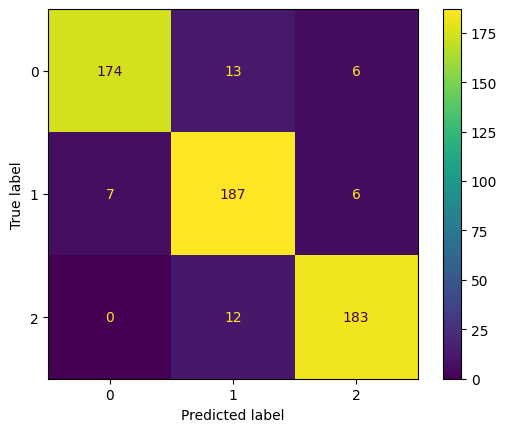

In [ ]:
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=best_k) # Choose the number of top features (k)
X_train_selected = selector.fit_transform(X_train_svm1, y_train_svm1)
X_test_selected = selector.transform(X_test_svm1)

# Train the SVM model with the selected features
print("\nTraining SVM with selected features...")
best_svm_model.fit(X_train_selected, y_train_svm1)
svm1_pred_selected = best_svm_model.predict(X_test_selected)

# Evaluate the model with selected features
print("\nSVM Classification Report (with selected features):")
print(classification_report(y_test_svm1, svm1_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_svm1, svm1_pred_selected, average='weighted')}")

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features_svm1 = [features[i] for i in selected_feature_indices]
print(f"\nSelected features: {selected_features_svm1}")

ConfusionMatrixDisplay.from_predictions(y_test_svm1, svm1_pred_selected)
plt.show()

In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_svm_model.score(X_train_selected, y_train_svm1)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_svm_model.score(X_test_selected, y_test_svm1)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")


Training Accuracy (with selected features): 0.9779
Testing Accuracy (with selected features): 0.9252
Accuracy Difference (Training - Testing): 0.0527


In [ ]:
# Calculate Accuracy
accuracy_svm1_selected = accuracy_score(y_test_svm1, svm1_pred_selected)
print(f'Accuracy: {accuracy_svm1_selected}')

# Calculate Precision
precision_svm1_selected = precision_score(y_test_svm1, svm1_pred_selected, average='weighted')
print(f'Precision: {precision_svm1_selected}')

# Calculate Recall
recall_svm1_selected = recall_score(y_test_svm1, svm1_pred_selected, average='weighted')
print(f'Recall: {recall_svm1_selected}')

# Calculate F1-score
f1_svm1_selected = f1_score(y_test_svm1, svm1_pred_selected, average='weighted')
print(f'F1-score: {f1_svm1_selected}')

Accuracy: 0.9251700680272109
Precision: 0.9267874250711439
Recall: 0.9251700680272109
F1-score: 0.9254018465285496


### Skenario 2: Split 70:30

In [ ]:
# Split data
X_train_svm2, X_test_svm2, y_train_svm2, y_test_svm2 = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
print(len(X_train_svm2), len(y_train_svm2))
print(len(X_test_svm2), len(y_test_svm2))

2058 2058
882 882


Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.9314931613634754
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       283
           1       0.89      0.93      0.91       306
           2       0.94      0.92      0.93       293

    accuracy                           0.92       882
   macro avg       0.92      0.92      0.92       882
weighted avg       0.92      0.92      0.92       882

F1-score: 0.918483973127749


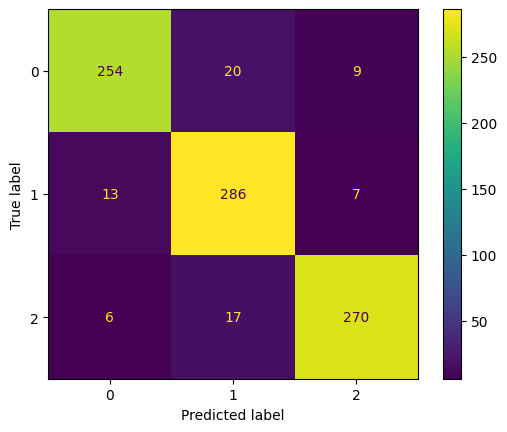

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'] # Kernel type
}

# Create the SVM model
svm_model = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_svm2, y_train_svm2)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best parameters
best_svm_model = grid_search.best_estimator_
svm2_pred = best_svm_model.predict(X_test_svm2)

print(classification_report(y_test_svm2, svm2_pred))
print(f"F1-score: {f1_score(y_test_svm2, svm2_pred,average='weighted')}")
ConfusionMatrixDisplay.from_predictions(y_test_svm2, svm2_pred)
plt.show()

In [ ]:
# Evaluasi pada data training
y_train_pred = best_svm_model.predict(X_train_svm2)
train_acc = accuracy_score(y_train_svm2, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_svm2, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_svm_model.predict(X_test_svm2)
test_acc = accuracy_score(y_test_svm2, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_svm2, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_svm2, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")



Training Accuracy: 0.9795918367346939
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       697
           1       0.96      0.99      0.97       674
           2       0.98      0.97      0.98       687

    accuracy                           0.98      2058
   macro avg       0.98      0.98      0.98      2058
weighted avg       0.98      0.98      0.98      2058


Testing Accuracy: 0.92
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       283
           1       0.89      0.93      0.91       306
           2       0.94      0.92      0.93       293

    accuracy                           0.92       882
   macro avg       0.92      0.92      0.92       882
weighted avg       0.92      0.92      0.92       882

F1-score: 0.918483973127749
Difference (Training - Testing): 0.06


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy_svm2 = accuracy_score(y_test_svm2, svm2_pred)
print(f'Accuracy: {accuracy_svm2}')

# Calculate Precision
precision_svm2 = precision_score(y_test_svm2, svm2_pred, average='weighted')
print(f'Precision: {precision_svm2}')

# Calculate Recall
recall_svm2 = recall_score(y_test_svm2, svm2_pred, average='weighted')
print(f'Recall: {recall_svm2}')

# Calculate F1-score
f1_svm2= f1_score(y_test_svm2, svm2_pred, average='weighted')
print(f'F1-score: {f1_svm2}')

Accuracy: 0.9183673469387755
Precision: 0.919342164777181
Recall: 0.9183673469387755
F1-score: 0.918483973127749


In [ ]:
# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 10 hingga 4
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_svm2, y_train_svm2)
    X_test_selected = selector.transform(X_test_svm2)

    # Gunakan model terbaik dari grid search
    best_svm_model.fit(X_train_selected, y_train_svm2)
    predictions = best_svm_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_svm2, predictions, average='weighted')
    accuracy = accuracy_score(y_test_svm2, predictions)
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1}")
print(f"Accuracy: {best_accuracy}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...
F1-score: 0.9195788910986109
Accuracy: 0.9195011337868481

Evaluating with top 13 features...
F1-score: 0.9230021290990026
Accuracy: 0.9229024943310657

Evaluating with top 12 features...
F1-score: 0.9230021290990026
Accuracy: 0.9229024943310657

Evaluating with top 11 features...
F1-score: 0.6296302778782563
Accuracy: 0.6394557823129252

Evaluating with top 10 features...
F1-score: 0.6296302778782563
Accuracy: 0.6394557823129252

Evaluating with top 9 features...
F1-score: 0.6389031711195962
Accuracy: 0.6496598639455783

Evaluating with top 8 features...
F1-score: 0.6389031711195962
Accuracy: 0.6496598639455783

Evaluating with top 7 features...
F1-score: 0.6363300925227744
Accuracy: 0.6473922902494331

Evaluating with top 6 features...
F1-score: 0.6405589828233329
Accuracy: 0.6507936507936508

Evaluating with top 5 features...
F1-score: 0.6303306435248686
Accuracy: 0.6428571428571429

Evaluating with top 4 features...
F1-score: 0.622624537299247
Ac

In [ ]:
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=best_k) # Choose the number of top features (k)
X_train_selected = selector.fit_transform(X_train_svm2, y_train_svm2)
X_test_selected = selector.transform(X_test_svm2)

# Train the SVM model with the selected features
print("\nTraining SVM with selected features...")
best_svm_model.fit(X_train_selected, y_train_svm2)
svm2_pred_selected = best_svm_model.predict(X_test_selected)

# Evaluate the model with selected features
print("\nSVM Classification Report (with selected features):")
print(classification_report(y_test_svm2, svm2_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_svm2, svm2_pred_selected, average='weighted')}")

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features_svm2 = [features[i] for i in selected_feature_indices]
print(f"\nSelected features: {selected_features_svm2}")


Training SVM with selected features...

SVM Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       283
           1       0.89      0.93      0.91       306
           2       0.95      0.93      0.94       293

    accuracy                           0.92       882
   macro avg       0.92      0.92      0.92       882
weighted avg       0.92      0.92      0.92       882

F1-score (with selected features): 0.9230021290990026

Selected features: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_svm_model.score(X_train_selected, y_train_svm2)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_svm_model.score(X_test_selected, y_test_svm2)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")



Training Accuracy (with selected features): 0.9815
Testing Accuracy (with selected features): 0.9229
Accuracy Difference (Training - Testing): 0.0586


In [ ]:
# Calculate Accuracy
accuracy_svm2_selected = accuracy_score(y_test_svm2, svm2_pred_selected)
print(f'Accuracy: {accuracy_svm2_selected}')

# Calculate Precision
precision_svm2_selected = precision_score(y_test_svm2, svm2_pred_selected, average='weighted')
print(f'Precision: {precision_svm2_selected}')

# Calculate Recall
recall_svm2_selected = recall_score(y_test_svm2, svm2_pred_selected, average='weighted')
print(f'Recall: {recall_svm2_selected}')

# Calculate F1-score
f1_svm2_selected= f1_score(y_test_svm2, svm2_pred_selected, average='weighted')
print(f'F1-score: {f1_svm2_selected}')

Accuracy: 0.9229024943310657
Precision: 0.9236067844411547
Recall: 0.9229024943310657
F1-score: 0.9230021290990026


### Skenario 3: Split 60:40

In [ ]:
# Split data
X_train_svm3, X_test_svm3, y_train_svm3, y_test_svm3 = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=42)
print(len(X_train_svm3), len(y_train_svm3))
print(len(X_test_svm3), len(y_test_svm3))

1764 1764
1176 1176


Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.9263166366211693
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       398
           1       0.88      0.92      0.90       396
           2       0.94      0.93      0.94       382

    accuracy                           0.91      1176
   macro avg       0.91      0.91      0.91      1176
weighted avg       0.91      0.91      0.91      1176

F1-score: 0.9133998064637977


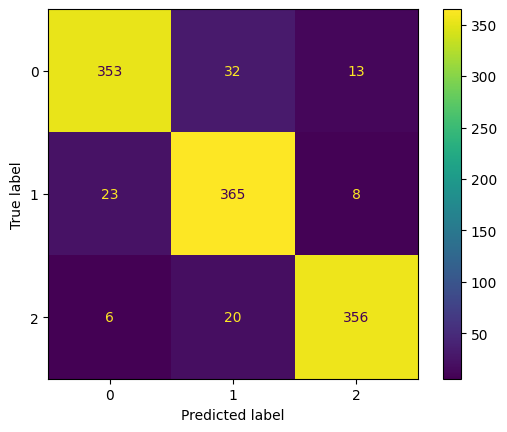

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'] # Kernel type
}

# Create the SVM model
svm_model = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_svm3, y_train_svm3)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best parameters
best_svm_model = grid_search.best_estimator_
svm3_pred = best_svm_model.predict(X_test_svm3)

print(classification_report(y_test_svm3, svm3_pred))
print(f"F1-score: {f1_score(y_test_svm3, svm3_pred,average='weighted')}")
ConfusionMatrixDisplay.from_predictions(y_test_svm3, svm3_pred)
plt.show()

In [ ]:
# Evaluasi pada data training
y_train_pred = best_svm_model.predict(X_train_svm3)
train_acc = accuracy_score(y_train_svm3, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_svm3, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_svm_model.predict(X_test_svm3)
test_acc = accuracy_score(y_test_svm3, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_svm3, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_svm3, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")



Training Accuracy: 0.9801587301587301
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       582
           1       0.96      0.99      0.97       584
           2       0.98      0.97      0.98       598

    accuracy                           0.98      1764
   macro avg       0.98      0.98      0.98      1764
weighted avg       0.98      0.98      0.98      1764


Testing Accuracy: 0.91
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       398
           1       0.88      0.92      0.90       396
           2       0.94      0.93      0.94       382

    accuracy                           0.91      1176
   macro avg       0.91      0.91      0.91      1176
weighted avg       0.91      0.91      0.91      1176

F1-score: 0.9133998064637977
Difference (Training - Testing): 0.07


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy_svm3 = accuracy_score(y_test_svm3, svm3_pred)
print(f'Accuracy: {accuracy_svm3}')

# Calculate Precision
precision_svm3 = precision_score(y_test_svm3, svm3_pred, average='weighted')
print(f'Precision: {precision_svm3}')

# Calculate Recall
recall_svm3 = recall_score(y_test_svm3, svm3_pred, average='weighted')
print(f'Recall: {recall_svm3}')

# Calculate F1-score
f1_svm3= f1_score(y_test_svm3, svm3_pred, average='weighted')
print(f'F1-score: {f1_svm3}')

Accuracy: 0.9132653061224489
Precision: 0.9142223901031018
Recall: 0.9132653061224489
F1-score: 0.9133998064637977


In [ ]:
# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 10 hingga 4
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_svm3, y_train_svm3)
    X_test_selected = selector.transform(X_test_svm3)

    # Gunakan model terbaik dari grid search
    best_svm_model.fit(X_train_selected, y_train_svm3)
    predictions = best_svm_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_svm3, predictions, average='weighted')
    accuracy = accuracy_score(y_test_svm3, predictions)
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1}")
print(f"Accuracy: {best_accuracy}")
print(f"Selected features: {best_features}")



Evaluating with top 14 features...
F1-score: 0.9133998064637977
Accuracy: 0.9132653061224489

Evaluating with top 13 features...
F1-score: 0.9167875687147551
Accuracy: 0.9166666666666666

Evaluating with top 12 features...
F1-score: 0.9185192680413704
Accuracy: 0.9183673469387755

Evaluating with top 11 features...
F1-score: 0.6189529164435453
Accuracy: 0.6309523809523809

Evaluating with top 10 features...
F1-score: 0.6335807858062207
Accuracy: 0.6445578231292517

Evaluating with top 9 features...
F1-score: 0.6335807858062207
Accuracy: 0.6445578231292517

Evaluating with top 8 features...
F1-score: 0.6335807858062207
Accuracy: 0.6445578231292517

Evaluating with top 7 features...
F1-score: 0.6297944809303736
Accuracy: 0.641156462585034

Evaluating with top 6 features...
F1-score: 0.6249945446068012
Accuracy: 0.6369047619047619

Evaluating with top 5 features...
F1-score: 0.6224272126432991
Accuracy: 0.6343537414965986

Evaluating with top 4 features...
F1-score: 0.6188755851042768
Ac


Training SVM with selected features...

SVM Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       398
           1       0.88      0.93      0.90       396
           2       0.95      0.94      0.94       382

    accuracy                           0.92      1176
   macro avg       0.92      0.92      0.92      1176
weighted avg       0.92      0.92      0.92      1176

F1-score (with selected features): 0.9185192680413704

Selected features: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


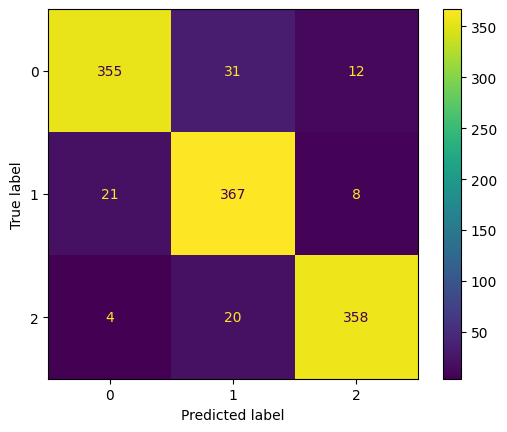

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=best_k) # Choose the number of top features (k)
X_train_selected = selector.fit_transform(X_train_svm3, y_train_svm3)
X_test_selected = selector.transform(X_test_svm3)

# Train the SVM model with the selected features
print("\nTraining SVM with selected features...")
best_svm_model.fit(X_train_selected, y_train_svm3)
svm3_pred_selected = best_svm_model.predict(X_test_selected)

# Evaluate the model with selected features
print("\nSVM Classification Report (with selected features):")
print(classification_report(y_test_svm3, svm3_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_svm3, svm3_pred_selected, average='weighted')}")

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features_svm3 = [features[i] for i in selected_feature_indices]
print(f"\nSelected features: {selected_features_svm3}")
ConfusionMatrixDisplay.from_predictions(y_test_svm3, svm3_pred_selected)
plt.show()

In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_svm_model.score(X_train_selected, y_train_svm3)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_svm_model.score(X_test_selected, y_test_svm3)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")



Training Accuracy (with selected features): 0.9807
Testing Accuracy (with selected features): 0.9184
Accuracy Difference (Training - Testing): 0.0624


In [ ]:
# Calculate Accuracy
accuracy_svm3_selected = accuracy_score(y_test_svm3, svm3_pred_selected)
print(f'Accuracy: {accuracy_svm3_selected}')

# Calculate Precision
precision_svm3_selected = precision_score(y_test_svm3, svm3_pred_selected, average='weighted')
print(f'Precision: {precision_svm3_selected}')

# Calculate Recall
recall_svm3_selected = recall_score(y_test_svm3, svm3_pred_selected, average='weighted')
print(f'Recall: {recall_svm3_selected}')

# Calculate F1-score
f1_svm3_selected = f1_score(y_test_svm3, svm3_pred_selected, average='weighted')
print(f'F1-score: {f1_svm3_selected}')

Accuracy: 0.9183673469387755
Precision: 0.9194628909764964
Recall: 0.9183673469387755
F1-score: 0.9185192680413704


## Random Forest

### Skenario 1: Split 80:20

In [ ]:
# Split data
X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
print(len(X_train_rf1), len(y_train_rf1))
print(len(X_test_rf1), len(y_test_rf1))

2352 2352
588 588


Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForest: 0.9570655463703301
F1-score: 0.9367397930469945
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       193
           1       0.92      0.93      0.93       200
           2       0.93      0.99      0.96       195

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588



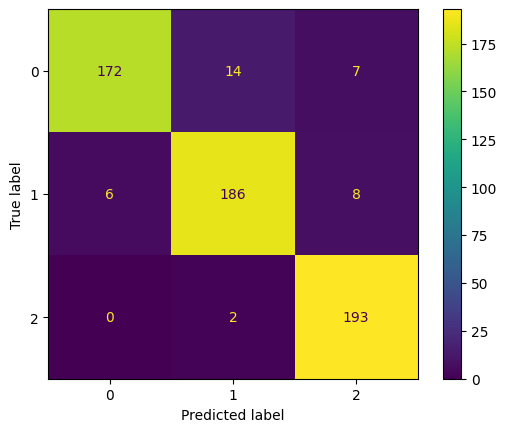

In [ ]:
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_rf1, y_train_rf1)

# Print the best parameters and best score for RandomForest
print("Best parameters for RandomForest:", grid_search_rf.best_params_)
print("Best score for RandomForest:", grid_search_rf.best_score_)

# Evaluate the RandomForest model with the best parameters
best_rf_model = grid_search_rf.best_estimator_
rf1_pred = best_rf_model.predict(X_test_rf1)

print(f"F1-score: {f1_score(y_test_rf1, rf1_pred,average='weighted')}")
print(classification_report(y_test_rf1, rf1_pred))
ConfusionMatrixDisplay.from_predictions(y_test_rf1, rf1_pred)
plt.show()

In [ ]:
# Evaluasi pada data training
y_train_pred = best_rf_model.predict(X_train_rf1)
train_acc = accuracy_score(y_train_rf1, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_rf1, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_rf_model.predict(X_test_rf1)
test_acc = accuracy_score(y_test_rf1, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_rf1, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_rf1, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")



Training Accuracy: 0.9931972789115646
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       787
           1       0.98      0.99      0.99       780
           2       0.99      0.99      0.99       785

    accuracy                           0.99      2352
   macro avg       0.99      0.99      0.99      2352
weighted avg       0.99      0.99      0.99      2352


Testing Accuracy: 0.94
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       193
           1       0.92      0.93      0.93       200
           2       0.93      0.99      0.96       195

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588

F1-score: 0.9367397930469945
Difference (Training - Testing): 0.06


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy_rf1 = accuracy_score(y_test_rf1, rf1_pred)
print(f'Accuracy: {accuracy_rf1}')

# Calculate Precision
precision_rf1 = precision_score(y_test_rf1, rf1_pred, average='weighted')
print(f'Precision: {precision_rf1}')

# Calculate Recall
recall_rf1 = recall_score(y_test_rf1, rf1_pred, average='weighted')
print(f'Recall: {recall_rf1}')

# Calculate F1-score
f1_rf1 = f1_score(y_test_rf1, rf1_pred, average='weighted')
print(f'F1-score: {f1_rf1}')

Accuracy: 0.9370748299319728
Precision: 0.938078737864041
Recall: 0.9370748299319728
F1-score: 0.9367397930469945


In [ ]:
# Feature importance RF
feature_importance = pd.DataFrame({
    'feature': features[:len(best_rf_model.feature_importances_)],
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
4                      time    0.534654
5            suburb_encoded    0.081607
1                       day    0.081253
2               day_of_week    0.045369
8       Maximum Temperature    0.042706
7       Minimum Temperature    0.034333
12  Direction Max Wind Gust    0.032946
11                 Sunshine    0.031856
14       Time Max Wind Gust    0.028080
13      Speed Max Wind Gust    0.025407
0                     month    0.020824
3                      year    0.017888
10              Evaporation    0.011796
6           station_encoded    0.010861
9                  Rainfall    0.000420


/tmp/ipython-input-104497226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, orient='h', palette='viridis')


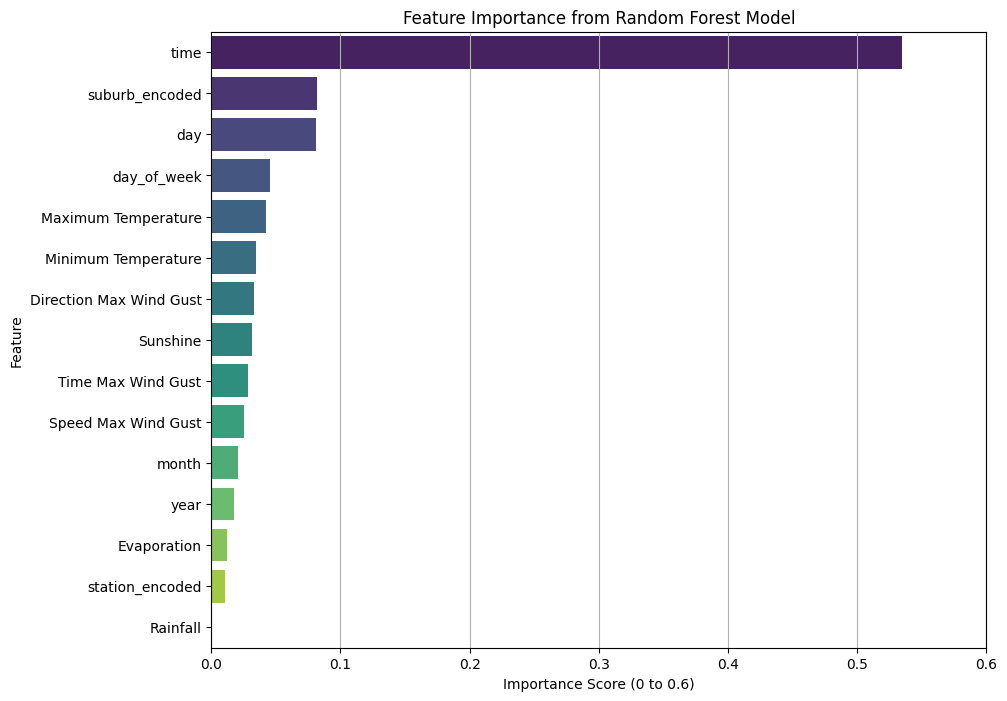

In [ ]:
# Buat plot vertikal feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, orient='h', palette='viridis')
plt.xlabel('Importance Score (0 to 0.6)')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.xlim(0, 0.6) # Set the x-axis limit from 0 to 1
plt.grid(axis='x') # Add grid lines only on the x-axis
plt.show()


/tmp/ipython-input-1643515523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')


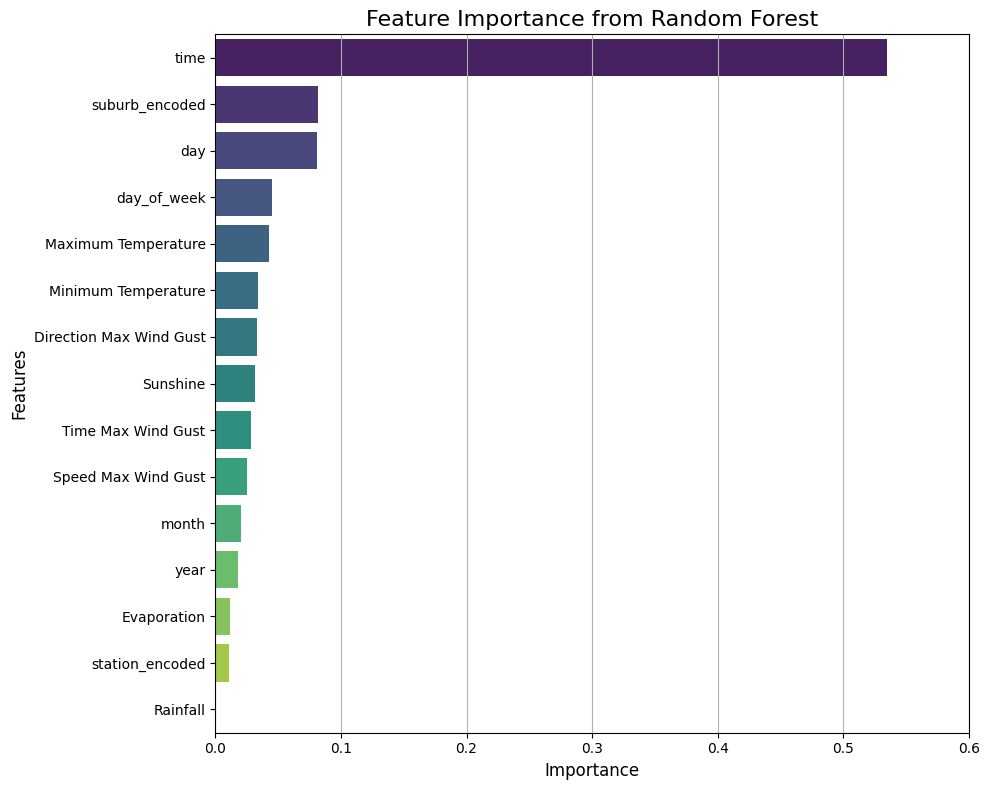

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xlim(0, 0.6) # Set the x-axis limit from 0 to 1
plt.grid(axis='x') # Add grid lines only on the x-axis
plt.tight_layout()
plt.show()


In [ ]:
# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 10 hingga 4
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_rf1, y_train_rf1)
    X_test_selected = selector.transform(X_test_rf1)

    # Gunakan model terbaik dari grid search
    best_rf_model.fit(X_train_selected, y_train_rf1)
    predictions = best_rf_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_rf1, predictions, average='weighted')
    accuracy = accuracy_score(y_test_rf1, predictions)
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1}")
print(f"Accuracy: {best_accuracy}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...
F1-score: 0.9369234135869249
Accuracy: 0.9370748299319728

Evaluating with top 13 features...
F1-score: 0.9367465135261137
Accuracy: 0.9370748299319728

Evaluating with top 12 features...
F1-score: 0.9351941641662521
Accuracy: 0.935374149659864

Evaluating with top 11 features...
F1-score: 0.6056243273038863
Accuracy: 0.608843537414966

Evaluating with top 10 features...
F1-score: 0.6036178353099378
Accuracy: 0.6071428571428571

Evaluating with top 9 features...
F1-score: 0.6333875078933099
Accuracy: 0.6445578231292517

Evaluating with top 8 features...
F1-score: 0.6333875078933099
Accuracy: 0.6445578231292517

Evaluating with top 7 features...
F1-score: 0.6333875078933099
Accuracy: 0.6445578231292517

Evaluating with top 6 features...
F1-score: 0.6315757582271996
Accuracy: 0.6428571428571429

Evaluating with top 5 features...
F1-score: 0.6315757582271996
Accuracy: 0.6428571428571429

Evaluating with top 4 features...
F1-score: 0.6280952301337929
Acc


Training Random Forest with selected features...

Random Forest Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       193
           1       0.91      0.94      0.92       200
           2       0.93      0.98      0.95       195

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588

F1-score (with selected features): 0.9369234135869249

Selected features for Random Forest: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'station_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


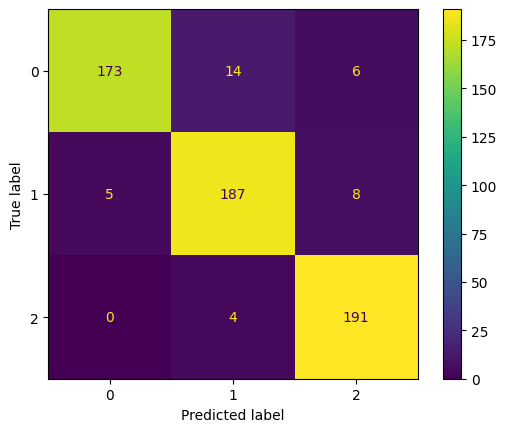

In [ ]:
# Feature Selection using SelectKBest for Random Forest
selector_rf = SelectKBest(score_func=f_classif, k=best_k)  # Choose the number of top features (k)
X_train_rf1_selected = selector_rf.fit_transform(X_train_rf1, y_train_rf1)
X_test_rf1_selected = selector_rf.transform(X_test_rf1)

# Train the Random Forest model with the selected features
print("\nTraining Random Forest with selected features...")
best_rf_model.fit(X_train_rf1_selected, y_train_rf1)
rf1_pred_selected = best_rf_model.predict(X_test_rf1_selected)

# Evaluate the model with selected features
print("\nRandom Forest Classification Report (with selected features):")
print(classification_report(y_test_rf1, rf1_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_rf1, rf1_pred_selected, average='weighted')}")

# Get the names of the selected features
selected_feature_indices_rf = selector_rf.get_support(indices=True)
selected_features_rf1 = [features[i] for i in selected_feature_indices_rf]
print(f"\nSelected features for Random Forest: {selected_features_rf1}")
ConfusionMatrixDisplay.from_predictions(y_test_rf1, rf1_pred_selected)
plt.show()

In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_rf_model.score(X_train_rf1_selected, y_train_rf1)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_rf_model.score(X_test_rf1_selected, y_test_rf1)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")


Training Accuracy (with selected features): 0.9932
Testing Accuracy (with selected features): 0.9371
Accuracy Difference (Training - Testing): 0.0561


In [ ]:
# Calculate Accuracy
accuracy_rf1_selected = accuracy_score(y_test_rf1, rf1_pred_selected)
print(f'Accuracy: {accuracy_rf1_selected}')

# Calculate Precision
precision_rf1_selected = precision_score(y_test_rf1, rf1_pred_selected, average='weighted')
print(f'Precision: {precision_rf1_selected}')

# Calculate Recall
recall_rf1_selected = recall_score(y_test_rf1, rf1_pred_selected, average='weighted')
print(f'Recall: {recall_rf1_selected}')

# Calculate F1-score
f1_rf1_selected = f1_score(y_test_rf1, rf1_pred_selected, average='weighted')
print(f'F1-score: {f1_rf1_selected}')

Accuracy: 0.9370748299319728
Precision: 0.9382663314709278
Recall: 0.9370748299319728
F1-score: 0.9369234135869249


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(
    best_rf_model, X_test_rf1_selected, y_test_rf1, n_repeats=10, random_state=42, n_jobs=2
)

feature_importance_df = pd.DataFrame(
    {
        "Feature": selected_features_rf1,
        "Importance": result.importances_mean,
        "Std": result.importances_std,
    }
)

# Display the feature importances
print(feature_importance_df.sort_values(by="Importance", ascending=False))

                    Feature  Importance       Std
4                      time    0.456973  0.015680
1                       day    0.162075  0.011333
5            suburb_encoded    0.039626  0.005381
10                 Sunshine    0.011735  0.004716
2               day_of_week    0.005952  0.002048
11  Direction Max Wind Gust    0.005272  0.002789
7       Maximum Temperature    0.004422  0.004882
12      Speed Max Wind Gust    0.002721  0.003741
6           station_encoded    0.002381  0.003663
13       Time Max Wind Gust    0.001701  0.001863
9               Evaporation    0.001531  0.000916
0                     month    0.000850  0.001743
8                  Rainfall    0.000000  0.000000
3                      year   -0.003231  0.001776


In [ ]:
# Feature importance RF
feature_importance = pd.DataFrame({
    'feature': selected_features_rf1[:len(best_rf_model.feature_importances_)],
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
4                      time    0.537105
1                       day    0.096122
5            suburb_encoded    0.082139
2               day_of_week    0.047187
7       Maximum Temperature    0.042888
11  Direction Max Wind Gust    0.036481
10                 Sunshine    0.035128
13       Time Max Wind Gust    0.028062
12      Speed Max Wind Gust    0.026693
0                     month    0.020974
3                      year    0.019677
6           station_encoded    0.013914
9               Evaporation    0.013087
8                  Rainfall    0.000543


/tmp/ipython-input-4108440863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, orient='h', palette='viridis')


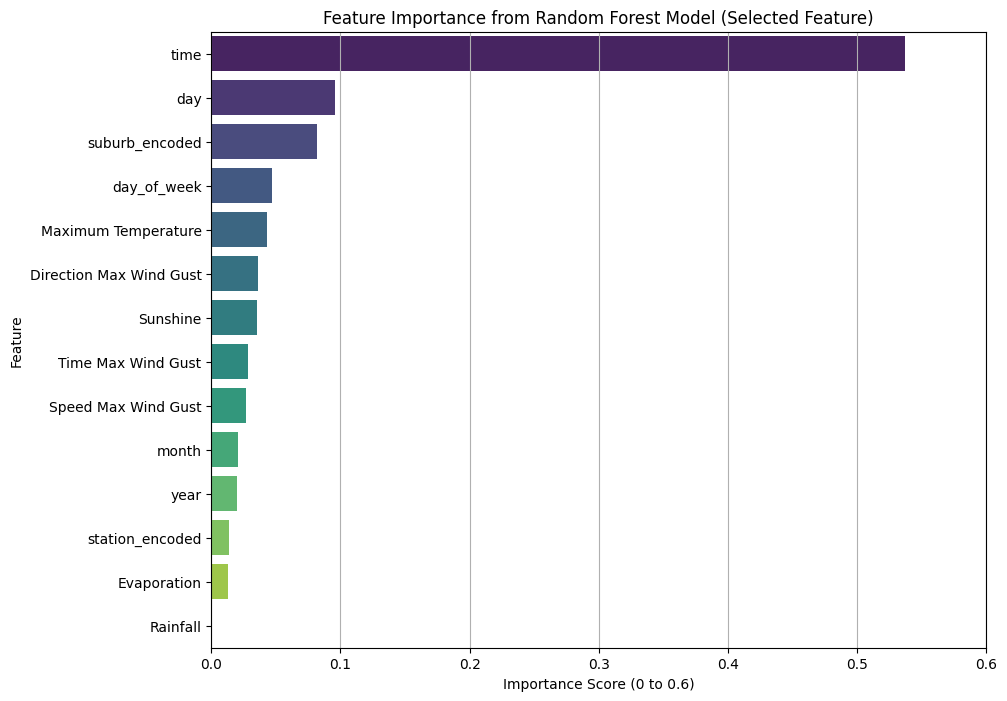

In [ ]:
# Buat plot vertikal feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, orient='h', palette='viridis')
plt.xlabel('Importance Score (0 to 0.6)')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model (Selected Feature)')
plt.xlim(0, 0.6) # Set the x-axis limit from 0 to 1
plt.grid(axis='x') # Add grid lines only on the x-axis
plt.show()
# prompt: buatin plot/grafik vertikal dr feature imortance

/tmp/ipython-input-3539737084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')


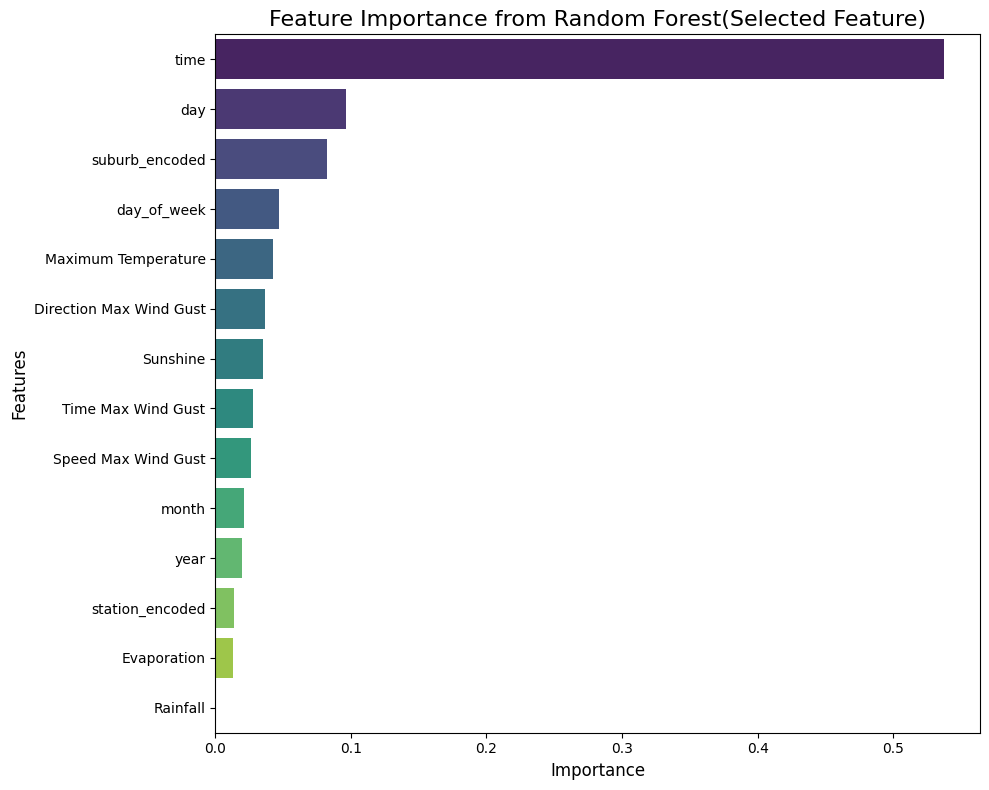

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Random Forest(Selected Feature)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


### Skenario 2: Split 70:30

In [ ]:
# Split data
X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
print(len(X_train_rf2), len(y_train_rf2))
print(len(X_test_rf2), len(y_test_rf2))

2058 2058
882 882


Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForest: 0.9582228993929087
F1-score: 0.9374419551948724
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       283
           1       0.91      0.94      0.93       306
           2       0.94      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.94      0.94      0.94       882
weighted avg       0.94      0.94      0.94       882



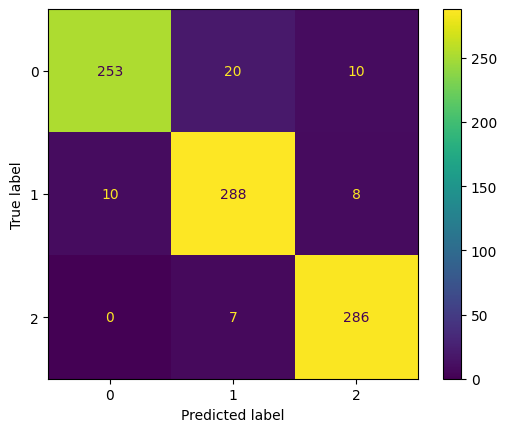

In [ ]:
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_rf2, y_train_rf2)

# Print the best parameters and best score for RandomForest
print("Best parameters for RandomForest:", grid_search_rf.best_params_)
print("Best score for RandomForest:", grid_search_rf.best_score_)

# Evaluate the RandomForest model with the best parameters
best_rf_model = grid_search_rf.best_estimator_
rf2_pred = best_rf_model.predict(X_test_rf2)

print(f"F1-score: {f1_score(y_test_rf2, rf2_pred,average='weighted')}")
print(classification_report(y_test_rf2, rf2_pred))
ConfusionMatrixDisplay.from_predictions(y_test_rf2, rf2_pred)
plt.show()

In [ ]:
# Evaluasi pada data training
y_train_pred = best_rf_model.predict(X_train_rf2)
train_acc = accuracy_score(y_train_rf2, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_rf2, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_rf_model.predict(X_test_rf2)
test_acc = accuracy_score(y_test_rf2, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_rf2, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_rf2, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")


Training Accuracy: 0.9946550048590865
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       697
           1       0.99      1.00      0.99       674
           2       1.00      1.00      1.00       687

    accuracy                           0.99      2058
   macro avg       0.99      0.99      0.99      2058
weighted avg       0.99      0.99      0.99      2058


Testing Accuracy: 0.94
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       283
           1       0.91      0.94      0.93       306
           2       0.94      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.94      0.94      0.94       882
weighted avg       0.94      0.94      0.94       882

F1-score: 0.9374419551948724
Difference (Training - Testing): 0.06


In [ ]:
# Calculate Accuracy
accuracy_rf2 = accuracy_score(y_test_rf2, rf2_pred)
print(f'Accuracy: {accuracy_rf2}')

# Calculate Precision
precision_rf2 = precision_score(y_test_rf2, rf2_pred, average='weighted')
print(f'Precision: {precision_rf2}')

# Calculate Recall
recall_rf2 = recall_score(y_test_rf2, rf2_pred, average='weighted')
print(f'Recall: {recall_rf2}')

# Calculate F1-score
f1_rf2 = f1_score(y_test_rf2, rf2_pred, average='weighted')
print(f'F1-score: {f1_rf2}')

Accuracy: 0.937641723356009
Precision: 0.9383926168788412
Recall: 0.937641723356009
F1-score: 0.9374419551948724


In [ ]:
# Feature importance RF
feature_importance = pd.DataFrame({
    'feature': features[:len(best_rf_model.feature_importances_)],
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
4                      time    0.526528
1                       day    0.088428
5            suburb_encoded    0.084968
2               day_of_week    0.047875
8       Maximum Temperature    0.042079
12  Direction Max Wind Gust    0.033036
7       Minimum Temperature    0.032813
14       Time Max Wind Gust    0.027905
13      Speed Max Wind Gust    0.027312
11                 Sunshine    0.026414
0                     month    0.022000
3                      year    0.016716
6           station_encoded    0.012211
10              Evaporation    0.011144
9                  Rainfall    0.000570


In [ ]:
# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 10 hingga 4
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_rf2, y_train_rf2)
    X_test_selected = selector.transform(X_test_rf2)

    # Gunakan model terbaik dari grid search
    best_rf_model.fit(X_train_selected, y_train_rf2)
    predictions = best_rf_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_rf2, predictions, average='weighted')
    accuracy = accuracy_score(y_test_rf2, predictions)
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1}")
print(f"Accuracy: {best_accuracy}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...
F1-score: 0.9385316431370759
Accuracy: 0.9387755102040817

Evaluating with top 13 features...
F1-score: 0.9408126372210844
Accuracy: 0.9410430839002267

Evaluating with top 12 features...
F1-score: 0.9386166948512596
Accuracy: 0.9387755102040817

Evaluating with top 11 features...
F1-score: 0.6132679336773154
Accuracy: 0.6156462585034014

Evaluating with top 10 features...
F1-score: 0.6132679336773154
Accuracy: 0.6156462585034014

Evaluating with top 9 features...
F1-score: 0.6461321176389011
Accuracy: 0.6564625850340136

Evaluating with top 8 features...
F1-score: 0.6446499972906555
Accuracy: 0.655328798185941

Evaluating with top 7 features...
F1-score: 0.6448439728596527
Accuracy: 0.655328798185941

Evaluating with top 6 features...
F1-score: 0.6430002943256538
Accuracy: 0.6541950113378685

Evaluating with top 5 features...
F1-score: 0.6383614619490997
Accuracy: 0.6496598639455783

Evaluating with top 4 features...
F1-score: 0.63057515259462
Accur

In [ ]:
# Feature Selection using SelectKBest for Random Forest
selector_rf = SelectKBest(score_func=f_classif, k=best_k)  # Choose the number of top features (k)
X_train_rf2_selected = selector_rf.fit_transform(X_train_rf2, y_train_rf2)
X_test_rf2_selected = selector_rf.transform(X_test_rf2)

# Train the Random Forest model with the selected features
print("\nTraining Random Forest with selected features...")
best_rf_model.fit(X_train_rf2_selected, y_train_rf2)
rf2_pred_selected = best_rf_model.predict(X_test_rf2_selected)

# Evaluate the model with selected features
print("\nRandom Forest Classification Report (with selected features):")
print(classification_report(y_test_rf2, rf2_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_rf2, rf2_pred_selected, average='weighted')}")

# Get the names of the selected features
selected_feature_indices_rf = selector_rf.get_support(indices=True)
selected_features_rf2 = [features[i] for i in selected_feature_indices_rf]
print(f"\nSelected features for Random Forest: {selected_features_rf2}")


Training Random Forest with selected features...

Random Forest Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       283
           1       0.92      0.94      0.93       306
           2       0.94      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.94      0.94      0.94       882
weighted avg       0.94      0.94      0.94       882

F1-score (with selected features): 0.9408126372210844

Selected features for Random Forest: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_rf_model.score(X_train_rf2_selected, y_train_rf2)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_rf_model.score(X_test_rf2_selected, y_test_rf2)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")


Training Accuracy (with selected features): 0.9947
Testing Accuracy (with selected features): 0.9410
Accuracy Difference (Training - Testing): 0.0536


In [ ]:
# Calculate Accuracy
accuracy_rf2_selected = accuracy_score(y_test_rf2, rf2_pred_selected)
print(f'Accuracy: {accuracy_rf2_selected}')

# Calculate Precision
precision_rf2_selected = precision_score(y_test_rf2, rf2_pred_selected, average='weighted')
print(f'Precision: {precision_rf2_selected}')

# Calculate Recall
recall_rf2_selected = recall_score(y_test_rf2, rf2_pred_selected, average='weighted')
print(f'Recall: {recall_rf2_selected}')

# Calculate F1-score
f1_rf2_selected = f1_score(y_test_rf2, rf2_pred_selected, average='weighted')
print(f'F1-score: {f1_rf2_selected}')

Accuracy: 0.9410430839002267
Precision: 0.9417680279674319
Recall: 0.9410430839002267
F1-score: 0.9408126372210844


In [ ]:
# Feature importance RF
feature_importance = pd.DataFrame({
    'feature': selected_features_rf2[:len(best_rf_model.feature_importances_)],
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
4                      time    0.539559
1                       day    0.092087
5            suburb_encoded    0.085503
6       Maximum Temperature    0.048211
2               day_of_week    0.046433
9                  Sunshine    0.038508
10  Direction Max Wind Gust    0.035795
12       Time Max Wind Gust    0.027560
11      Speed Max Wind Gust    0.027134
3                      year    0.022590
0                     month    0.021055
8               Evaporation    0.015187
7                  Rainfall    0.000377


### Skenario 3: Split 60:40

In [ ]:
# Split data
X_train_rf3, X_test_rf3, y_train_rf3, y_test_rf3 = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=42)
print(len(X_train_rf3), len(y_train_rf3))
print(len(X_test_rf3), len(y_test_rf3))

1764 1764
1176 1176


Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score for RandomForest: 0.9546532964202937
F1-score: 0.9335696388742908
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       398
           1       0.90      0.95      0.92       396
           2       0.94      0.96      0.95       382

    accuracy                           0.93      1176
   macro avg       0.94      0.93      0.93      1176
weighted avg       0.94      0.93      0.93      1176



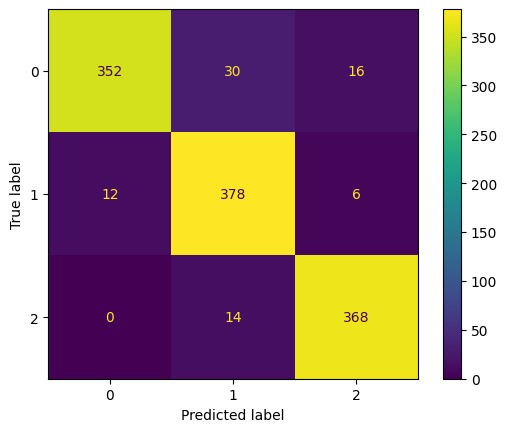

In [ ]:
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_rf3, y_train_rf3)

# Print the best parameters and best score for RandomForest
print("Best parameters for RandomForest:", grid_search_rf.best_params_)
print("Best score for RandomForest:", grid_search_rf.best_score_)

# Evaluate the RandomForest model with the best parameters
best_rf_model = grid_search_rf.best_estimator_
rf3_pred = best_rf_model.predict(X_test_rf3)

print(f"F1-score: {f1_score(y_test_rf3, rf3_pred,average='weighted')}")
print(classification_report(y_test_rf3, rf3_pred))
ConfusionMatrixDisplay.from_predictions(y_test_rf3, rf3_pred)
plt.show()

In [ ]:
# Evaluasi pada data training
y_train_pred = best_rf_model.predict(X_train_rf3)
train_acc = accuracy_score(y_train_rf3, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_rf3, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_rf_model.predict(X_test_rf3)
test_acc = accuracy_score(y_test_rf3, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_rf3, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_rf3, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")


Training Accuracy: 0.9948979591836735
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       582
           1       0.99      1.00      0.99       584
           2       1.00      0.99      1.00       598

    accuracy                           0.99      1764
   macro avg       0.99      0.99      0.99      1764
weighted avg       0.99      0.99      0.99      1764


Testing Accuracy: 0.93
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       398
           1       0.90      0.95      0.92       396
           2       0.94      0.96      0.95       382

    accuracy                           0.93      1176
   macro avg       0.94      0.93      0.93      1176
weighted avg       0.94      0.93      0.93      1176

F1-score: 0.9335696388742908
Difference (Training - Testing): 0.06


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy_rf3 = accuracy_score(y_test_rf3, rf3_pred)
print(f'Accuracy: {accuracy_rf3}')

# Calculate Precision
precision_rf3 = precision_score(y_test_rf3, rf3_pred, average='weighted')
print(f'Precision: {precision_rf3}')

# Calculate Recall
recall_rf3 = recall_score(y_test_rf3, rf3_pred, average='weighted')
print(f'Recall: {recall_rf3}')

# Calculate F1-score
f1_rf3 = f1_score(y_test_rf3, rf3_pred, average='weighted')
print(f'F1-score: {f1_rf3}')

Accuracy: 0.9336734693877551
Precision: 0.935409271602327
Recall: 0.9336734693877551
F1-score: 0.9335696388742908


In [ ]:
# Feature importance RF
feature_importance = pd.DataFrame({
    'feature': features[:len(best_rf_model.feature_importances_)],
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
4                      time    0.528969
5            suburb_encoded    0.081691
1                       day    0.080663
2               day_of_week    0.048910
8       Maximum Temperature    0.046729
7       Minimum Temperature    0.034754
12  Direction Max Wind Gust    0.032962
13      Speed Max Wind Gust    0.029516
14       Time Max Wind Gust    0.026537
11                 Sunshine    0.024947
3                      year    0.020424
0                     month    0.018227
10              Evaporation    0.014157
6           station_encoded    0.011094
9                  Rainfall    0.000418


In [ ]:
# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 10 hingga 4
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_rf3, y_train_rf3)
    X_test_selected = selector.transform(X_test_rf3)

    # Gunakan model terbaik dari grid search
    best_rf_model.fit(X_train_selected, y_train_rf3)
    predictions = best_rf_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_rf3, predictions, average='weighted')
    accuracy = accuracy_score(y_test_rf3, predictions)
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1}")
print(f"Accuracy: {best_accuracy}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...
F1-score: 0.9345226949413096
Accuracy: 0.9345238095238095

Evaluating with top 13 features...
F1-score: 0.9362068720842784
Accuracy: 0.9362244897959183

Evaluating with top 12 features...
F1-score: 0.9345442654938741
Accuracy: 0.9345238095238095

Evaluating with top 11 features...
F1-score: 0.5876540318321775
Accuracy: 0.5875850340136054

Evaluating with top 10 features...
F1-score: 0.6403657105350341
Accuracy: 0.6505102040816326

Evaluating with top 9 features...
F1-score: 0.6375058772385798
Accuracy: 0.6479591836734694

Evaluating with top 8 features...
F1-score: 0.6385883448038533
Accuracy: 0.6488095238095238

Evaluating with top 7 features...
F1-score: 0.640498735917291
Accuracy: 0.6505102040816326

Evaluating with top 6 features...
F1-score: 0.6355920773745329
Accuracy: 0.6462585034013606

Evaluating with top 5 features...
F1-score: 0.6320943074436824
Accuracy: 0.6428571428571429

Evaluating with top 4 features...
F1-score: 0.6309936997150657
Ac


Training Random Forest with selected features...

Random Forest Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       398
           1       0.90      0.95      0.92       396
           2       0.95      0.96      0.96       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176

F1-score (with selected features): 0.9362068720842784

Selected features for Random Forest: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


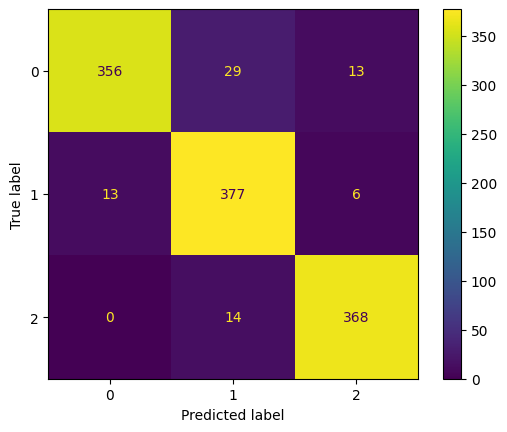

In [ ]:
# Feature Selection using SelectKBest for Random Forest
selector_rf = SelectKBest(score_func=f_classif, k=best_k)  # Choose the number of top features (k)
X_train_rf3_selected = selector_rf.fit_transform(X_train_rf3, y_train_rf3)
X_test_rf3_selected = selector_rf.transform(X_test_rf3)

# Train the Random Forest model with the selected features
print("\nTraining Random Forest with selected features...")
best_rf_model.fit(X_train_rf3_selected, y_train_rf3)
rf3_pred_selected = best_rf_model.predict(X_test_rf3_selected)

# Evaluate the model with selected features
print("\nRandom Forest Classification Report (with selected features):")
print(classification_report(y_test_rf3, rf3_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_rf3, rf3_pred_selected, average='weighted')}")

# Get the names of the selected features
selected_feature_indices_rf = selector_rf.get_support(indices=True)
selected_features_rf3 = [features[i] for i in selected_feature_indices_rf]
print(f"\nSelected features for Random Forest: {selected_features_rf3}")
ConfusionMatrixDisplay.from_predictions(y_test_rf3, rf3_pred_selected)
plt.show()

In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_rf_model.score(X_train_rf3_selected, y_train_rf3)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_rf_model.score(X_test_rf3_selected, y_test_rf3)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")


Training Accuracy (with selected features): 0.9949
Testing Accuracy (with selected features): 0.9362
Accuracy Difference (Training - Testing): 0.0587


In [ ]:
# Calculate Accuracy
accuracy_rf3_selected = accuracy_score(y_test_rf3, rf3_pred_selected)
print(f'Accuracy: {accuracy_rf3_selected}')

# Calculate Precision
precision_rf3_selected = precision_score(y_test_rf3, rf3_pred_selected, average='weighted')
print(f'Precision: {precision_rf3_selected}')

# Calculate Recall
recall_rf3_selected = recall_score(y_test_rf3, rf3_pred_selected, average='weighted')
print(f'Recall: {recall_rf3_selected}')

# Calculate F1-score
f1_rf3_selected = f1_score(y_test_rf3, rf3_pred_selected, average='weighted')
print(f'F1-score: {f1_rf3_selected}')

Accuracy: 0.9362244897959183
Precision: 0.9376538611194868
Recall: 0.9362244897959183
F1-score: 0.9362068720842784


In [ ]:
# Feature importance RF
feature_importance = pd.DataFrame({
    'feature': selected_features_rf3[:len(best_rf_model.feature_importances_)],
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
4                      time    0.539308
1                       day    0.087843
5            suburb_encoded    0.081975
6       Maximum Temperature    0.055827
2               day_of_week    0.051902
10  Direction Max Wind Gust    0.039413
9                  Sunshine    0.033237
11      Speed Max Wind Gust    0.027392
12       Time Max Wind Gust    0.026603
0                     month    0.023343
3                      year    0.019367
8               Evaporation    0.012996
7                  Rainfall    0.000794


## XGBoost

### Skenario 1: Split 80:20

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Split data
X_train_xgb1, X_test_xgb1, y_train_xgb1, y_test_xgb1 = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
print(len(X_train_xgb1), len(y_train_xgb1))
print(len(X_test_xgb1), len(y_test_xgb1))

2352 2352
588 588


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}
Best score for XGBoost: 0.9625947508695848
F1-score: 0.9453730406171638
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       193
           1       0.93      0.93      0.93       200
           2       0.94      0.99      0.96       195

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588



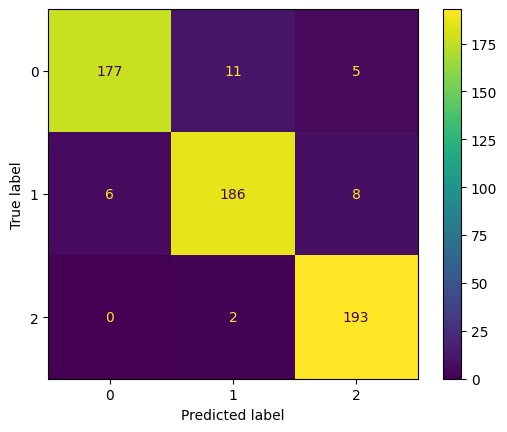

In [ ]:
# Define parameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [3, 6, 10],  # Kedalaman pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Kecepatan learning
    'subsample': [0.8, 1.0],  # Proporsi data yang digunakan per tree
    'colsample_bytree': [0.8, 1.0]  # Proporsi fitur yang digunakan per tree
}

# Buat model XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Grid Search dengan Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_xgb1, y_train_xgb1)

# Print best parameters dan best score untuk XGBoost
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)

# Evaluasi model dengan parameter terbaik
best_xgb_model = grid_search_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(X_test_xgb1)

print(f"F1-score: {f1_score(y_test_xgb1, xgb_pred, average='weighted')}")
print(classification_report(y_test_xgb1, xgb_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_xgb1, xgb_pred)
plt.show()


In [ ]:
# Evaluasi pada data training
y_train_pred = best_xgb_model.predict(X_train_xgb1)
train_acc = accuracy_score(y_train_xgb1, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_xgb1, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_xgb_model.predict(X_test_xgb1)
test_acc = accuracy_score(y_test_xgb1, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_xgb1, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_xgb1, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")



Training Accuracy: 0.9927721088435374
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       787
           1       0.98      0.99      0.99       780
           2       0.99      0.99      0.99       785

    accuracy                           0.99      2352
   macro avg       0.99      0.99      0.99      2352
weighted avg       0.99      0.99      0.99      2352


Testing Accuracy: 0.95
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       193
           1       0.93      0.93      0.93       200
           2       0.94      0.99      0.96       195

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588

F1-score: 0.9453730406171638
Difference (Training - Testing): 0.05


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy_xgb1 = accuracy_score(y_test_xgb1, xgb_pred)
print(f'Accuracy: {accuracy_xgb1}')

# Calculate Precision
precision_xgb1 = precision_score(y_test_xgb1, xgb_pred, average='weighted')
print(f'Precision: {precision_xgb1}')

# Calculate Recall
recall_xgb1 = recall_score(y_test_xgb1, xgb_pred, average='weighted')
print(f'Recall: {recall_xgb1}')

# Calculate F1-score
f1_xgb1 = f1_score(y_test_xgb1, xgb_pred, average='weighted')
print(f'F1-score: {f1_xgb1}')

Accuracy: 0.9455782312925171
Precision: 0.9460901008021373
Recall: 0.9455782312925171
F1-score: 0.9453730406171638


In [ ]:
# Feature importance dari XGBoost (berdasarkan model)
feature_importance_xgb = pd.DataFrame({
    'feature': features[:len(best_xgb_model.feature_importances_)],
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (XGBoost):")
print(feature_importance_xgb)


Feature Importance (XGBoost):
                    feature  importance
1                       day    0.318476
4                      time    0.214344
3                      year    0.081838
0                     month    0.063968
10              Evaporation    0.055268
7       Minimum Temperature    0.051350
2               day_of_week    0.032878
11                 Sunshine    0.030181
6           station_encoded    0.028767
8       Maximum Temperature    0.027729
13      Speed Max Wind Gust    0.026827
12  Direction Max Wind Gust    0.026616
14       Time Max Wind Gust    0.024222
5            suburb_encoded    0.017535
9                  Rainfall    0.000000


/tmp/ipython-input-1301329067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_xgb, orient='h', palette='viridis')


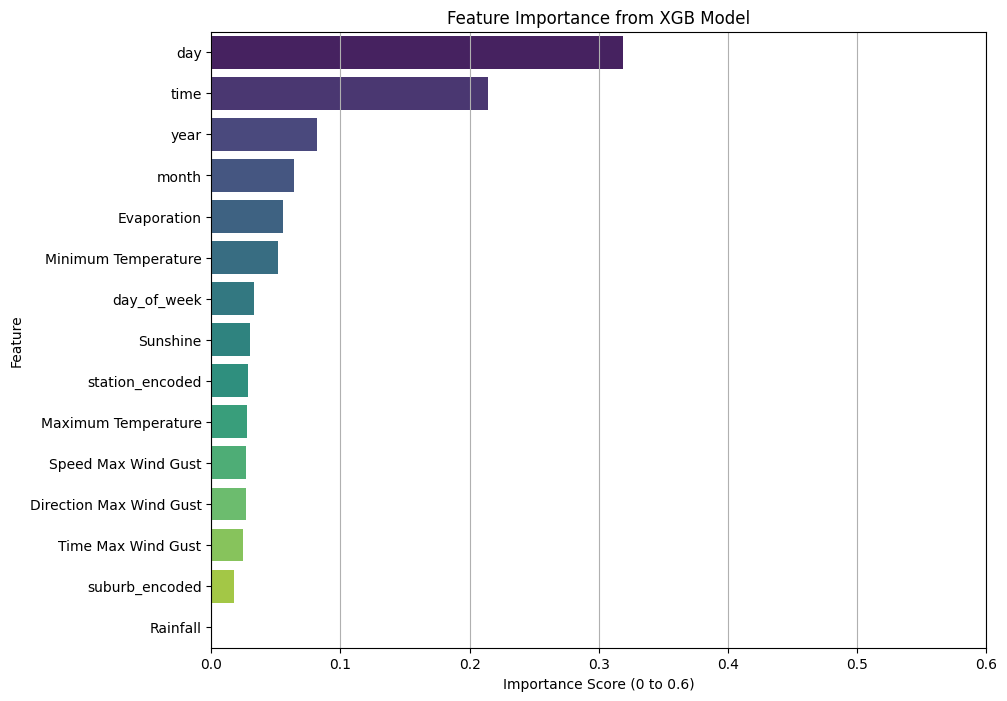

In [ ]:
# Buat plot vertikal feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb, orient='h', palette='viridis')
plt.xlabel('Importance Score (0 to 0.6)')
plt.ylabel('Feature')
plt.title('Feature Importance from XGB Model')
plt.xlim(0, 0.6) # Set the x-axis limit from 0 to 1
plt.grid(axis='x') # Add grid lines only on the x-axis
plt.show()

/tmp/ipython-input-886659696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_xgb, palette='viridis')


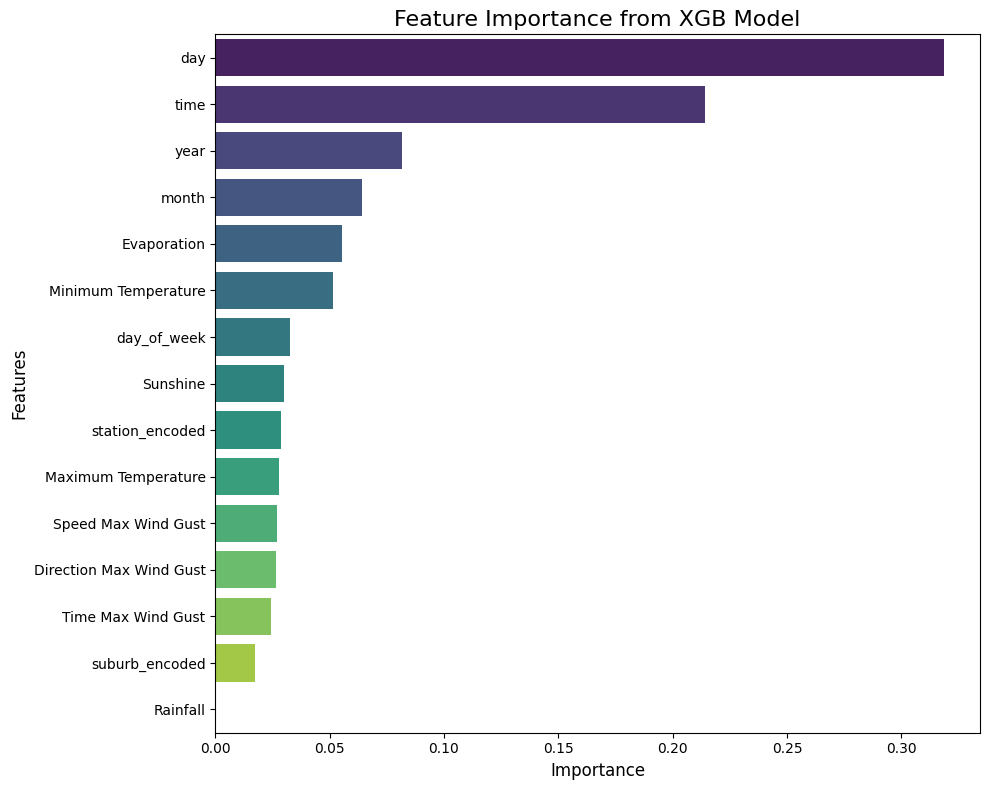

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb, palette='viridis')
plt.title('Feature Importance from XGB Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, accuracy_score

# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 14 hingga 4 (menurun)
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_xgb1, y_train_xgb1)
    X_test_selected = selector.transform(X_test_xgb1)

    # Gunakan model terbaik dari grid search XGBoost
    best_xgb_model.fit(X_train_selected, y_train_xgb1)
    predictions = best_xgb_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_xgb1, predictions, average='weighted')
    accuracy = accuracy_score(y_test_xgb1, predictions)
    print(f"F1-score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = (
            k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]
        )

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9471
Accuracy: 0.9473

Evaluating with top 13 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9505
Accuracy: 0.9507

Evaluating with top 12 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9505
Accuracy: 0.9507

Evaluating with top 11 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.6135
Accuracy: 0.6173

Evaluating with top 10 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.6032
Accuracy: 0.6088

Evaluating with top 9 features...
F1-score: 0.6351
Accuracy: 0.6463

Evaluating with top 8 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.6332
Accuracy: 0.6446

Evaluating with top 7 features...
F1-score: 0.6329
Accuracy: 0.6446

Evaluating with top 6 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.6329
Accuracy: 0.6446

Evaluating with top 5 features...
F1-score: 0.6333
Accuracy: 0.6446

Evaluating with top 4 features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.6296
Accuracy: 0.6412

Best result with top 13 features:
F1-score: 0.9505
Accuracy: 0.9507
Selected features: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']



Training XGBoost with selected features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:17:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       193
           1       0.94      0.93      0.94       200
           2       0.94      0.99      0.96       195

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588

F1-score (with selected features): 0.9505188432317824

Selected features for XGBoost: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


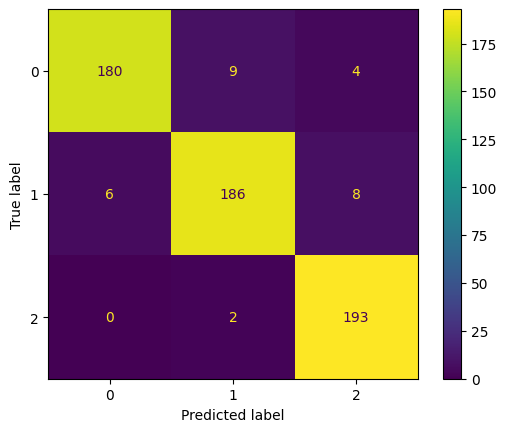

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Feature Selection using SelectKBest for XGBoost
selector_xgb = SelectKBest(score_func=f_classif, k=best_k)  # Pilih top-k fitur terbaik
X_train_xgb1_selected = selector_xgb.fit_transform(X_train_xgb1, y_train_xgb1)
X_test_xgb1_selected = selector_xgb.transform(X_test_xgb1)

# Train the XGBoost model with the selected features
print("\nTraining XGBoost with selected features...")
best_xgb_model.fit(X_train_xgb1_selected, y_train_xgb1)
xgb1_pred_selected = best_xgb_model.predict(X_test_xgb1_selected)

# Evaluate the model with selected features
print("\nXGBoost Classification Report (with selected features):")
print(classification_report(y_test_xgb1, xgb1_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_xgb1, xgb1_pred_selected, average='weighted')}")
# Get the names of the selected features
selected_feature_indices_xgb = selector_xgb.get_support(indices=True)
selected_features_xgb1 = [features[i] for i in selected_feature_indices_xgb]
print(f"\nSelected features for XGBoost: {selected_features_xgb1}")
ConfusionMatrixDisplay.from_predictions(y_test_xgb1, xgb1_pred_selected)
plt.show()

In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_xgb_model.score(X_train_xgb1_selected, y_train_xgb1)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_xgb_model.score(X_test_xgb1_selected, y_test_xgb1)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")


Training Accuracy (with selected features): 0.9928
Testing Accuracy (with selected features): 0.9507
Accuracy Difference (Training - Testing): 0.0421


In [ ]:
# Calculate Accuracy
accuracy_xgb1_selected = accuracy_score(y_test_xgb1, xgb1_pred_selected)
print(f'Accuracy: {accuracy_xgb1_selected}')

# Calculate Precision
precision_xgb1_selected = precision_score(y_test_xgb1, xgb1_pred_selected, average='weighted')
print(f'Precision: {precision_xgb1_selected}')

# Calculate Recall
recall_xgb1_selected = recall_score(y_test_xgb1, xgb1_pred_selected, average='weighted')
print(f'Recall: {recall_xgb1_selected}')

# Calculate F1-score
f1_xgb1_selected = f1_score(y_test_xgb1, xgb1_pred_selected, average='weighted')
print(f'F1-score: {f1_xgb1_selected}')

Accuracy: 0.9506802721088435
Precision: 0.9510068821627385
Recall: 0.9506802721088435
F1-score: 0.9505188432317824


In [ ]:
# Permutation Importance untuk XGBoost
result_xgb = permutation_importance(
    best_xgb_model, X_test_xgb1_selected, y_test_xgb1, n_repeats=10, random_state=42, n_jobs=2
)

feature_importance_xgb_df = pd.DataFrame(
    {
        "Feature": selected_features_xgb1,
        "Importance": result_xgb.importances_mean,
        "Std": result_xgb.importances_std,
    }
)

# Display the feature importances
print("\nPermutation Importance (XGBoost):")
print(feature_importance_xgb_df.sort_values(by="Importance", ascending=False))


Permutation Importance (XGBoost):
                    Feature  Importance       Std
4                      time    0.489626  0.011293
1                       day    0.347619  0.009228
5            suburb_encoded    0.038265  0.006237
11      Speed Max Wind Gust    0.011905  0.002946
10  Direction Max Wind Gust    0.011224  0.002178
12       Time Max Wind Gust    0.009694  0.001871
6       Maximum Temperature    0.009354  0.003745
3                      year    0.007653  0.002970
9                  Sunshine    0.007483  0.003061
2               day_of_week    0.005952  0.002185
0                     month    0.004592  0.003956
8               Evaporation    0.001871  0.000510
7                  Rainfall    0.000000  0.000000


In [ ]:
# Feature importance dari XGBoost (berdasarkan model)
feature_importance_xgb = pd.DataFrame({
    'feature': features[:len(best_xgb_model.feature_importances_)],
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (XGBoost):")
print(feature_importance_xgb)


Feature Importance (XGBoost):
                    feature  importance
1                       day    0.277963
4                      time    0.232051
3                      year    0.123487
0                     month    0.064118
8       Maximum Temperature    0.047841
2               day_of_week    0.044830
7       Minimum Temperature    0.037121
6           station_encoded    0.034352
9                  Rainfall    0.033081
11                 Sunshine    0.031198
10              Evaporation    0.029960
12  Direction Max Wind Gust    0.024617
5            suburb_encoded    0.019382


/tmp/ipython-input-1301329067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_xgb, orient='h', palette='viridis')


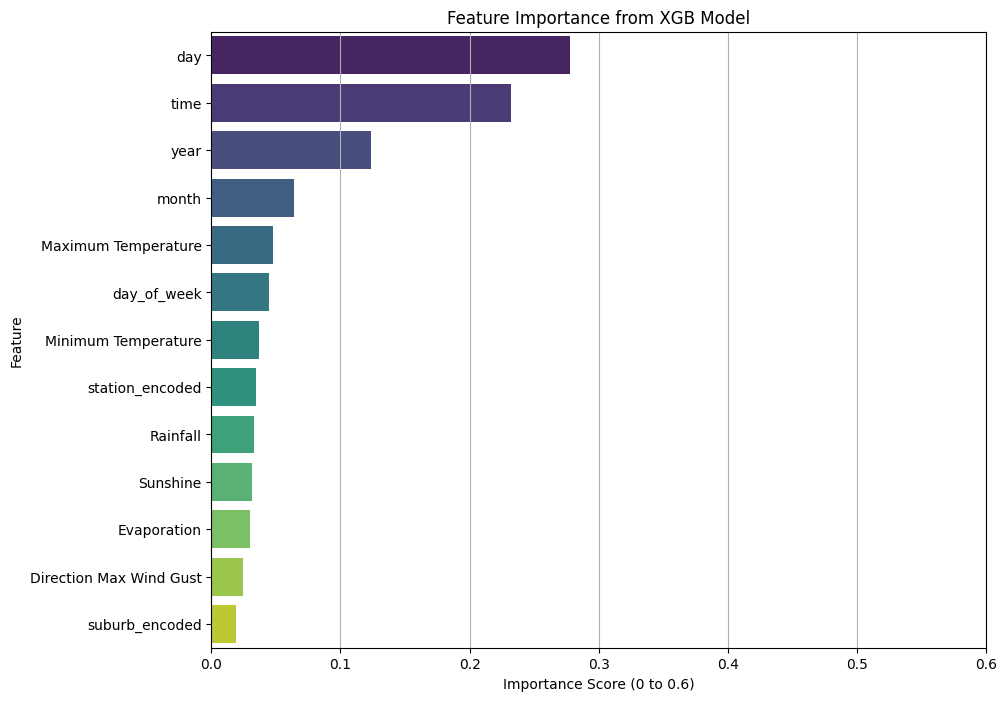

In [ ]:
# Buat plot vertikal feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb, orient='h', palette='viridis')
plt.xlabel('Importance Score (0 to 0.6)')
plt.ylabel('Feature')
plt.title('Feature Importance from XGB Model')
plt.xlim(0, 0.6) # Set the x-axis limit from 0 to 1
plt.grid(axis='x') # Add grid lines only on the x-axis
plt.show()

/tmp/ipython-input-870002545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_xgb, palette='viridis')


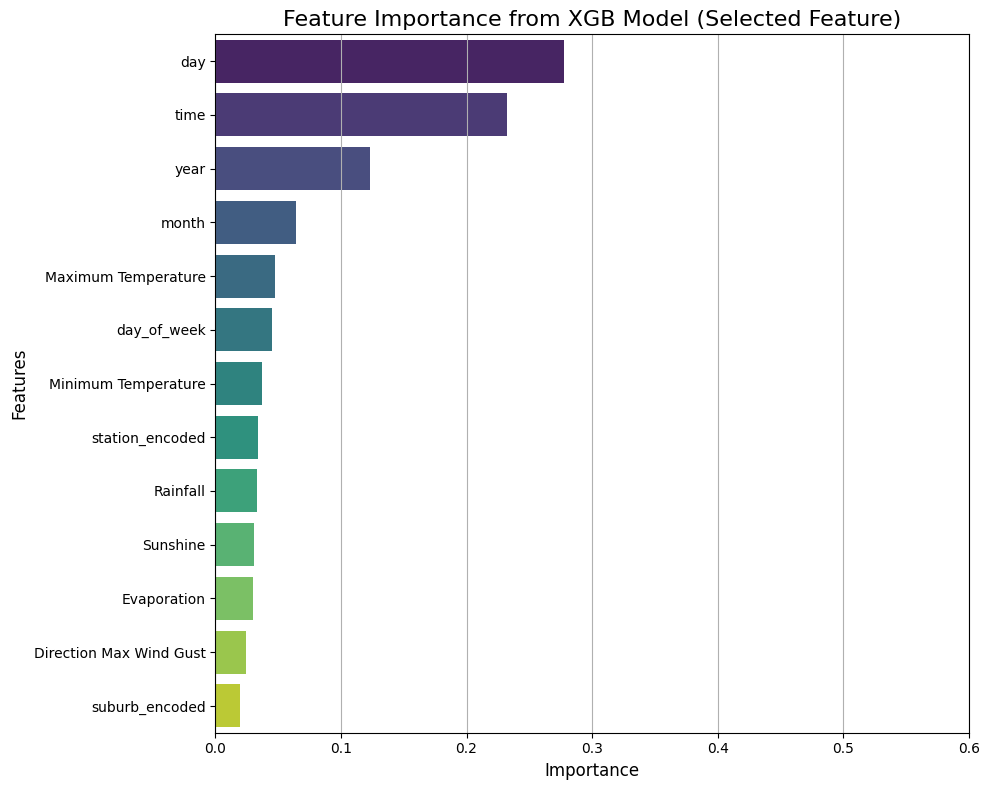

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb, palette='viridis')
plt.title('Feature Importance from XGB Model (Selected Feature)', fontsize=16)
plt.xlim(0, 0.6)
plt.grid(axis='x')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Buat plot vertikal feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb, orient='h', palette='viridis')
plt.xlabel('Importance Score (0 to 1)')
plt.ylabel('Feature')
plt.title('Feature Importance from XGB Model (Selected Feature)')
plt.xlim(0, 1) # Set the x-axis limit from 0 to 1
plt.grid(axis='x') # Add grid lines only on the x-axis
plt.show()

### Skenario 2: Split 70:30

In [ ]:
# Split data
X_train_xgb2, X_test_xgb2, y_train_xgb2, y_test_xgb2 = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
print(len(X_train_xgb2), len(y_train_xgb2))
print(len(X_test_xgb2), len(y_test_xgb2))

2058 2058
882 882


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Best score for XGBoost: 0.9572461200481894
F1-score: 0.9442488485563101
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       283
           1       0.92      0.95      0.93       306
           2       0.95      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.95      0.94      0.94       882
weighted avg       0.95      0.94      0.94       882



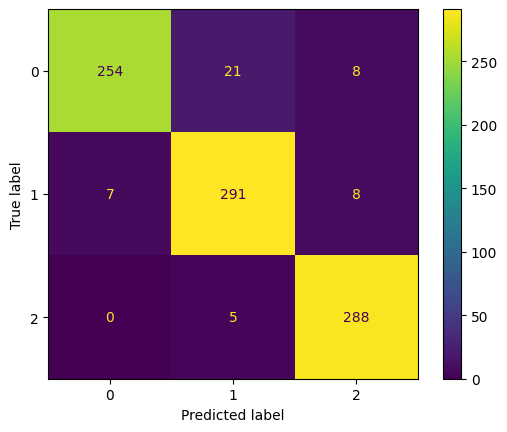

In [ ]:
# Define parameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [3, 6, 10],  # Kedalaman pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Kecepatan learning
    'subsample': [0.8, 1.0],  # Proporsi data yang digunakan per tree
    'colsample_bytree': [0.8, 1.0]  # Proporsi fitur yang digunakan per tree
}

# Buat model XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Grid Search dengan Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_xgb2, y_train_xgb2)

# Print best parameters dan best score untuk XGBoost
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)

# Evaluasi model dengan parameter terbaik
best_xgb_model = grid_search_xgb.best_estimator_
xgb2_pred = best_xgb_model.predict(X_test_xgb2)

print(f"F1-score: {f1_score(y_test_xgb2, xgb2_pred, average='weighted')}")
print(classification_report(y_test_xgb2, xgb2_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_xgb2, xgb2_pred)
plt.show()


In [ ]:
# Evaluasi pada data training
y_train_pred = best_xgb_model.predict(X_train_xgb2)
train_acc = accuracy_score(y_train_xgb2, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_xgb2, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_xgb_model.predict(X_test_xgb2)
test_acc = accuracy_score(y_test_xgb2, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_xgb2, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_xgb2, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")



Training Accuracy: 0.9946550048590865
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       697
           1       0.99      0.99      0.99       674
           2       0.99      1.00      1.00       687

    accuracy                           0.99      2058
   macro avg       0.99      0.99      0.99      2058
weighted avg       0.99      0.99      0.99      2058


Testing Accuracy: 0.94
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       283
           1       0.92      0.95      0.93       306
           2       0.95      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.95      0.94      0.94       882
weighted avg       0.95      0.94      0.94       882

F1-score: 0.9442488485563101
Difference (Training - Testing): 0.05


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy_xgb2 = accuracy_score(y_test_xgb2, xgb2_pred)
print(f'Accuracy: {accuracy_xgb2}')

# Calculate Precision
precision_xgb2 = precision_score(y_test_xgb2, xgb2_pred, average='weighted')
print(f'Precision: {precision_xgb2}')

# Calculate Recall
recall_xgb2 = recall_score(y_test_xgb2, xgb2_pred, average='weighted')
print(f'Recall: {recall_xgb2}')

# Calculate F1-score
f1_xgb2 = f1_score(y_test_xgb2, xgb2_pred, average='weighted')
print(f'F1-score: {f1_xgb2}')

Accuracy: 0.9444444444444444
Precision: 0.9454547814695436
Recall: 0.9444444444444444
F1-score: 0.9442488485563101


In [ ]:
# Feature importance dari XGBoost (berdasarkan model)
feature_importance_xgb = pd.DataFrame({
    'feature': features[:len(best_xgb_model.feature_importances_)],
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (XGBoost):")
print(feature_importance_xgb)


Feature Importance (XGBoost):
                    feature  importance
4                      time    0.222958
1                       day    0.198502
3                      year    0.132988
10              Evaporation    0.077668
0                     month    0.057751
2               day_of_week    0.055469
7       Minimum Temperature    0.054528
8       Maximum Temperature    0.037302
12  Direction Max Wind Gust    0.036188
11                 Sunshine    0.027791
14       Time Max Wind Gust    0.025396
13      Speed Max Wind Gust    0.024697
6           station_encoded    0.023590
5            suburb_encoded    0.016174
9                  Rainfall    0.008996


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, accuracy_score

# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 14 hingga 4 (menurun)
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_xgb2, y_train_xgb2)
    X_test_selected = selector.transform(X_test_xgb2)

    # Gunakan model terbaik dari grid search XGBoost
    best_xgb_model.fit(X_train_selected, y_train_xgb2)
    predictions = best_xgb_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_xgb2, predictions, average='weighted')
    accuracy = accuracy_score(y_test_xgb2, predictions)
    print(f"F1-score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = (
            k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]
        )

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.9443
Accuracy: 0.9444

Evaluating with top 13 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.9454
Accuracy: 0.9456

Evaluating with top 12 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.9408
Accuracy: 0.9410

Evaluating with top 11 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6164
Accuracy: 0.6190

Evaluating with top 10 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6177
Accuracy: 0.6202

Evaluating with top 9 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6353
Accuracy: 0.6474

Evaluating with top 8 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6395
Accuracy: 0.6508

Evaluating with top 7 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6394
Accuracy: 0.6508

Evaluating with top 6 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6358
Accuracy: 0.6474

Evaluating with top 5 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6350
Accuracy: 0.6474

Evaluating with top 4 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6335
Accuracy: 0.6451

Best result with top 13 features:
F1-score: 0.9454
Accuracy: 0.9456
Selected features: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']



Training XGBoost with selected features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       283
           1       0.92      0.95      0.93       306
           2       0.95      0.98      0.97       293

    accuracy                           0.95       882
   macro avg       0.95      0.95      0.95       882
weighted avg       0.95      0.95      0.95       882

F1-score (with selected features): 0.9454347585004996

Selected features for XGBoost: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


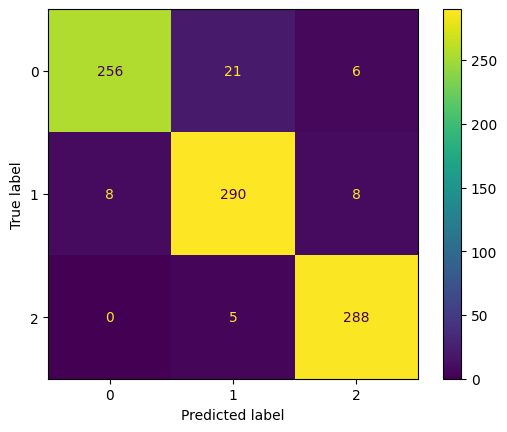

In [ ]:
# Feature Selection using SelectKBest for XGBoost
selector_xgb = SelectKBest(score_func=f_classif, k=best_k)  # Pilih top-k fitur terbaik
X_train_xgb2_selected = selector_xgb.fit_transform(X_train_xgb2, y_train_xgb2)
X_test_xgb2_selected = selector_xgb.transform(X_test_xgb2)

# Train the XGBoost model with the selected features
print("\nTraining XGBoost with selected features...")
best_xgb_model.fit(X_train_xgb2_selected, y_train_xgb2)
xgb2_pred_selected = best_xgb_model.predict(X_test_xgb2_selected)

# Evaluate the model with selected features
print("\nXGBoost Classification Report (with selected features):")
print(classification_report(y_test_xgb2, xgb2_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_xgb2, xgb2_pred_selected, average='weighted')}")
# Get the names of the selected features
selected_feature_indices_xgb = selector_xgb.get_support(indices=True)
selected_features_xgb2= [features[i] for i in selected_feature_indices_xgb]
print(f"\nSelected features for XGBoost: {selected_features_xgb2}")
ConfusionMatrixDisplay.from_predictions(y_test_xgb2, xgb2_pred_selected)
plt.show()

In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_xgb_model.score(X_train_xgb2_selected, y_train_xgb2)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_xgb_model.score(X_test_xgb2_selected, y_test_xgb2)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")


Training Accuracy (with selected features): 0.9947
Testing Accuracy (with selected features): 0.9456
Accuracy Difference (Training - Testing): 0.0491


In [ ]:
# Calculate Accuracy
accuracy_xgb2_selected = accuracy_score(y_test_xgb2, xgb2_pred_selected)
print(f'Accuracy: {accuracy_xgb2_selected}')

# Calculate Precision
precision_xgb2_selected = precision_score(y_test_xgb2, xgb2_pred_selected, average='weighted')
print(f'Precision: {precision_xgb2_selected}')

# Calculate Recall
recall_xgb2_selected = recall_score(y_test_xgb2, xgb2_pred_selected, average='weighted')
print(f'Recall: {recall_xgb2_selected}')

# Calculate F1-score
f1_xgb2_selected = f1_score(y_test_xgb2, xgb2_pred_selected, average='weighted')
print(f'F1-score: {f1_xgb2_selected}')

Accuracy: 0.9455782312925171
Precision: 0.9463313444188383
Recall: 0.9455782312925171
F1-score: 0.9454347585004996


In [ ]:
# Permutation Importance untuk XGBoost
result_xgb = permutation_importance(
    best_xgb_model, X_test_xgb2_selected, y_test_xgb2, n_repeats=10, random_state=42, n_jobs=2
)

feature_importance_xgb_df = pd.DataFrame(
    {
        "Feature": selected_features_xgb2,
        "Importance": result_xgb.importances_mean,
        "Std": result_xgb.importances_std,
    }
)

# Display the feature importances
print("\nPermutation Importance (XGBoost):")
print(feature_importance_xgb_df.sort_values(by="Importance", ascending=False))


Permutation Importance (XGBoost):
                    Feature  Importance       Std
4                      time    0.498753  0.010974
1                       day    0.227891  0.010490
5            suburb_encoded    0.032086  0.004943
11      Speed Max Wind Gust    0.011905  0.004096
10  Direction Max Wind Gust    0.005102  0.002598
6       Maximum Temperature    0.004989  0.003093
3                      year    0.003741  0.001901
2               day_of_week    0.003515  0.002402
9                  Sunshine    0.001814  0.001842
12       Time Max Wind Gust    0.001474  0.001439
7                  Rainfall    0.000000  0.000000
8               Evaporation   -0.000567  0.000567
0                     month   -0.002041  0.002015


### Skenario 3: Split 60:40

In [ ]:
# Split data
X_train_xgb3, X_test_xgb3, y_train_xgb3, y_test_xgb3 = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=42)
print(len(X_train_xgb3), len(y_train_xgb3))
print(len(X_test_xgb3), len(y_test_xgb3))

1764 1764
1176 1176


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:34:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}
Best score for XGBoost: 0.9523870074684522
F1-score: 0.937771083087641
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       398
           1       0.90      0.96      0.93       396
           2       0.95      0.97      0.96       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



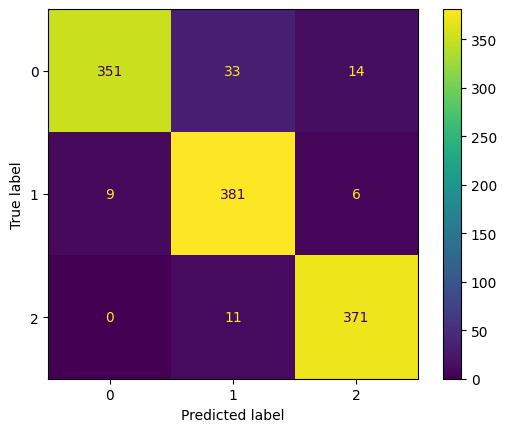

In [ ]:
# Define parameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [3, 6, 10],  # Kedalaman pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Kecepatan learning
    'subsample': [0.8, 1.0],  # Proporsi data yang digunakan per tree
    'colsample_bytree': [0.8, 1.0]  # Proporsi fitur yang digunakan per tree
}

# Buat model XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Grid Search dengan Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_xgb3, y_train_xgb3)

# Print best parameters dan best score untuk XGBoost
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)

# Evaluasi model dengan parameter terbaik
best_xgb_model = grid_search_xgb.best_estimator_
xgb3_pred = best_xgb_model.predict(X_test_xgb3)

print(f"F1-score: {f1_score(y_test_xgb3, xgb3_pred, average='weighted')}")
print(classification_report(y_test_xgb3, xgb3_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_xgb3, xgb3_pred)
plt.show()


In [ ]:
# Evaluasi pada data training
y_train_pred = best_xgb_model.predict(X_train_xgb3)
train_acc = accuracy_score(y_train_xgb3, y_train_pred)
print(f'\nTraining Accuracy: {train_acc}')
print("Training Classification Report:")
print(classification_report(y_train_xgb3, y_train_pred))

# Evaluasi pada data testing
y_test_pred = best_xgb_model.predict(X_test_xgb3)
test_acc = accuracy_score(y_test_xgb3, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Classification Report:")
print(classification_report(y_test_xgb3, y_test_pred))

# F1-score pada testing data
print(f"F1-score: {f1_score(y_test_xgb3, y_test_pred, average='weighted')}")
print(f"Difference (Training - Testing): {train_acc - test_acc:.2f}")



Training Accuracy: 0.9943310657596371
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       582
           1       0.99      1.00      0.99       584
           2       0.99      1.00      1.00       598

    accuracy                           0.99      1764
   macro avg       0.99      0.99      0.99      1764
weighted avg       0.99      0.99      0.99      1764


Testing Accuracy: 0.94
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       398
           1       0.90      0.96      0.93       396
           2       0.95      0.97      0.96       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176

F1-score: 0.937771083087641
Difference (Training - Testing): 0.06


In [ ]:
# Calculate Accuracy
accuracy_xgb3 = accuracy_score(y_test_xgb3, xgb3_pred)
print(f'Accuracy: {accuracy_xgb3}')

# Calculate Precision
precision_xgb3 = precision_score(y_test_xgb3, xgb3_pred, average='weighted')
print(f'Precision: {precision_xgb3}')

# Calculate Recall
recall_xgb3 = recall_score(y_test_xgb3, xgb3_pred, average='weighted')
print(f'Recall: {recall_xgb3}')

# Calculate F1-score
f1_xgb3 = f1_score(y_test_xgb3, xgb3_pred, average='weighted')
print(f'F1-score: {f1_xgb3}')

Accuracy: 0.9379251700680272
Precision: 0.9400618290794578
Recall: 0.9379251700680272
F1-score: 0.937771083087641


In [ ]:
# Feature importance dari XGBoost (berdasarkan model)
feature_importance_xgb = pd.DataFrame({
    'feature': features[:len(best_xgb_model.feature_importances_)],
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (XGBoost):")
print(feature_importance_xgb)


Feature Importance (XGBoost):
                    feature  importance
4                      time    0.270714
1                       day    0.231852
3                      year    0.064327
10              Evaporation    0.062012
2               day_of_week    0.058573
7       Minimum Temperature    0.050481
8       Maximum Temperature    0.039822
0                     month    0.037453
12  Direction Max Wind Gust    0.037304
13      Speed Max Wind Gust    0.032846
11                 Sunshine    0.031374
6           station_encoded    0.025135
14       Time Max Wind Gust    0.022942
5            suburb_encoded    0.018423
9                  Rainfall    0.016741


In [ ]:
# Variabel untuk menyimpan hasil terbaik
best_k, best_f1, best_accuracy, best_features = None, 0, 0, []

# Loop untuk nilai k dari 14 hingga 4 (menurun)
for k in range(14, 3, -1):
    print(f"\nEvaluating with top {k} features...")

    # Seleksi fitur
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_xgb3, y_train_xgb3)
    X_test_selected = selector.transform(X_test_xgb3)

    # Gunakan model terbaik dari grid search XGBoost
    best_xgb_model.fit(X_train_selected, y_train_xgb3)
    predictions = best_xgb_model.predict(X_test_selected)

    # Evaluasi model
    f1 = f1_score(y_test_xgb3, predictions, average='weighted')
    accuracy = accuracy_score(y_test_xgb3, predictions)
    print(f"F1-score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # Update hasil terbaik jika perlu
    if f1 > best_f1:
        best_k, best_f1, best_accuracy, best_features = (
            k, f1, accuracy, [features[i] for i in selector.get_support(indices=True)]
        )

# Output hasil terbaik
print(f"\nBest result with top {best_k} features:")
print(f"F1-score: {best_f1:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Selected features: {best_features}")


Evaluating with top 14 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.9421
Accuracy: 0.9422

Evaluating with top 13 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.9395
Accuracy: 0.9396

Evaluating with top 12 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.9413
Accuracy: 0.9413

Evaluating with top 11 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6118
Accuracy: 0.6148

Evaluating with top 10 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6299
Accuracy: 0.6412

Evaluating with top 9 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6278
Accuracy: 0.6395

Evaluating with top 8 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6308
Accuracy: 0.6420

Evaluating with top 7 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6318
Accuracy: 0.6429

Evaluating with top 6 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6337
Accuracy: 0.6446

Evaluating with top 5 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6327
Accuracy: 0.6437

Evaluating with top 4 features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score: 0.6288
Accuracy: 0.6403

Best result with top 14 features:
F1-score: 0.9421
Accuracy: 0.9422
Selected features: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'station_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']



Training XGBoost with selected features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report (with selected features):
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       398
           1       0.90      0.96      0.93       396
           2       0.95      0.97      0.96       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176

F1-score (with selected features): 0.9421104109607527

Selected features for XGBoost: ['month', 'day', 'day_of_week', 'year', 'time', 'suburb_encoded', 'station_encoded', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction Max Wind Gust', 'Speed Max Wind Gust', 'Time Max Wind Gust']


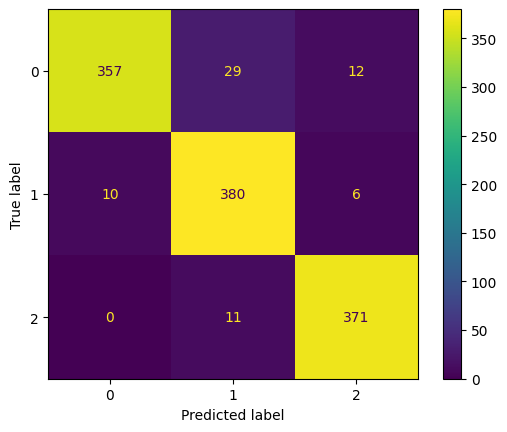

In [ ]:
# Feature Selection using SelectKBest for XGBoost
selector_xgb = SelectKBest(score_func=f_classif, k=best_k)  # Pilih top-k fitur terbaik
X_train_xgb3_selected = selector_xgb.fit_transform(X_train_xgb3, y_train_xgb3)
X_test_xgb3_selected = selector_xgb.transform(X_test_xgb3)

# Train the XGBoost model with the selected features
print("\nTraining XGBoost with selected features...")
best_xgb_model.fit(X_train_xgb3_selected, y_train_xgb3)
xgb3_pred_selected = best_xgb_model.predict(X_test_xgb3_selected)

# Evaluate the model with selected features
print("\nXGBoost Classification Report (with selected features):")
print(classification_report(y_test_xgb3, xgb3_pred_selected))
print(f"F1-score (with selected features): {f1_score(y_test_xgb3, xgb3_pred_selected, average='weighted')}")
# Get the names of the selected features
selected_feature_indices_xgb = selector_xgb.get_support(indices=True)
selected_features_xgb3= [features[i] for i in selected_feature_indices_xgb]
print(f"\nSelected features for XGBoost: {selected_features_xgb3}")
ConfusionMatrixDisplay.from_predictions(y_test_xgb3, xgb3_pred_selected)
plt.show()

In [ ]:
# Evaluate accuracy on the training set
training_accuracy = best_xgb_model.score(X_train_xgb3_selected, y_train_xgb3)
print(f"\nTraining Accuracy (with selected features): {training_accuracy:.4f}")

# Evaluate accuracy on the testing set
testing_accuracy = best_xgb_model.score(X_test_xgb3_selected, y_test_xgb3)
print(f"Testing Accuracy (with selected features): {testing_accuracy:.4f}")

# Calculate the accuracy difference
accuracy_difference = training_accuracy - testing_accuracy
print(f"Accuracy Difference (Training - Testing): {accuracy_difference:.4f}")


Training Accuracy (with selected features): 0.9949
Testing Accuracy (with selected features): 0.9422
Accuracy Difference (Training - Testing): 0.0527


In [ ]:
# Calculate Accuracy
accuracy_xgb3_selected = accuracy_score(y_test_xgb3, xgb3_pred_selected)
print(f'Accuracy: {accuracy_xgb3_selected}')

# Calculate Precision
precision_xgb3_selected = precision_score(y_test_xgb3, xgb3_pred_selected, average='weighted')
print(f'Precision: {precision_xgb3_selected}')

# Calculate Recall
recall_xgb3_selected = recall_score(y_test_xgb3, xgb3_pred_selected, average='weighted')
print(f'Recall: {recall_xgb3_selected}')

# Calculate F1-score
f1_xgb3_selected = f1_score(y_test_xgb3, xgb3_pred_selected, average='weighted')
print(f'F1-score: {f1_xgb3_selected}')

Accuracy: 0.9421768707482994
Precision: 0.9436776658947499
Recall: 0.9421768707482994
F1-score: 0.9421104109607527


In [ ]:
# Permutation Importance untuk XGBoost
result_xgb = permutation_importance(
    best_xgb_model, X_test_xgb3_selected, y_test_xgb3, n_repeats=10, random_state=42, n_jobs=2
)

feature_importance_xgb_df = pd.DataFrame(
    {
        "Feature": selected_features_xgb3,
        "Importance": result_xgb.importances_mean,
        "Std": result_xgb.importances_std,
    }
)

# Display the feature importances
print("\nPermutation Importance (XGBoost):")
print(feature_importance_xgb_df.sort_values(by="Importance", ascending=False))


Permutation Importance (XGBoost):
                    Feature  Importance       Std
4                      time    0.483163  0.010981
1                       day    0.165901  0.006829
5            suburb_encoded    0.029337  0.003407
7       Maximum Temperature    0.009779  0.001753
0                     month    0.008844  0.001832
12      Speed Max Wind Gust    0.008333  0.001649
11  Direction Max Wind Gust    0.005952  0.002344
6           station_encoded    0.005867  0.001761
2               day_of_week    0.003401  0.001784
13       Time Max Wind Gust    0.003316  0.001956
10                 Sunshine    0.003061  0.001622
9               Evaporation    0.002976  0.001024
3                      year    0.002126  0.001331
8                  Rainfall    0.000000  0.000000


## Hasil

In [ ]:
from tabulate import tabulate

In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Scenario', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# SVM Results
svm_results = {
    'SVM': [
        {'Scenario': 'Split 80:20', 'Accuracy': accuracy_svm1, 'Precision': precision_svm1, 'Recall': recall_svm1, 'F1-Score': f1_svm1},
        {'Scenario': 'Split 70:30', 'Accuracy': accuracy_svm2, 'Precision': precision_svm2, 'Recall': recall_svm2, 'F1-Score': f1_svm2},
        {'Scenario': 'Split 60:40', 'Accuracy': accuracy_svm3, 'Precision': precision_svm3, 'Recall': recall_svm3, 'F1-Score': f1_svm3},
        # Add more SVM scenarios here if needed
    ]
}

# Random Forest Results
rf_results = {
    'Random Forest': [
        {'Scenario': 'Split 80:20', 'Accuracy': accuracy_rf1, 'Precision': precision_rf1, 'Recall': recall_rf1, 'F1-Score': f1_rf1},
        {'Scenario': 'Split 70:30', 'Accuracy': accuracy_rf2, 'Precision': precision_rf2, 'Recall': recall_rf2, 'F1-Score': f1_rf2},
        {'Scenario': 'Split 60:40', 'Accuracy': accuracy_rf3, 'Precision': precision_rf3, 'Recall': recall_rf3, 'F1-Score': f1_rf3},
        # Add more RF scenarios here if needed
    ]
}

# Hasil evaluasi untuk XGBoost
xgb_results = {
    'XGBoost': [
        {'Scenario': 'Split 80:20', 'Accuracy': accuracy_xgb1, 'Precision': precision_xgb1, 'Recall': recall_xgb1, 'F1-Score': f1_xgb1},
        {'Scenario': 'Split 70:30', 'Accuracy': accuracy_xgb2, 'Precision': precision_xgb2, 'Recall': recall_xgb2, 'F1-Score': f1_xgb2},
        {'Scenario': 'Split 60:40', 'Accuracy': accuracy_xgb3, 'Precision': precision_xgb3, 'Recall': recall_xgb3, 'F1-Score': f1_xgb3},
    ]
}

# Convert the dictionaries to dataframes
svm_df = pd.DataFrame(svm_results['SVM'])
rf_df = pd.DataFrame(rf_results['Random Forest'])
xgb_df = pd.DataFrame(xgb_results['XGBoost'])

# Add the 'Model' column to each dataframe
svm_df['Model'] = 'SVM'
rf_df['Model'] = 'Random Forest'
xgb_df['Model'] = 'XGBoost'

# Concatenate the dataframes
results_df = pd.concat([svm_df, rf_df, xgb_df], ignore_index=True)

# Reorder columns to have 'Model' as the first column
results_df = results_df[['Model', 'Scenario', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Display the results for the family presentation
print("Performance Comparison of SVM, Random Forest, and XGBoost")
# results_df
# Create a DataFrame from the scenario data
df = pd.DataFrame(results_df)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)

Performance Comparison of SVM, Random Forest, and XGBoost
╒═══════════════╤═════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model         │ Scenario    │   Accuracy │   Precision │   Recall │   F1-Score │
╞═══════════════╪═════════════╪════════════╪═════════════╪══════════╪════════════╡
│ SVM           │ Split 80:20 │   0.920068 │    0.92163  │ 0.920068 │   0.920275 │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM           │ Split 70:30 │   0.918367 │    0.919342 │ 0.918367 │   0.918484 │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM           │ Split 60:40 │   0.913265 │    0.914222 │ 0.913265 │   0.9134   │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest │ Split 80:20 │   0.937075 │    0.938079 │ 0.937075 │   0.93674  │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest │ Split 70:30

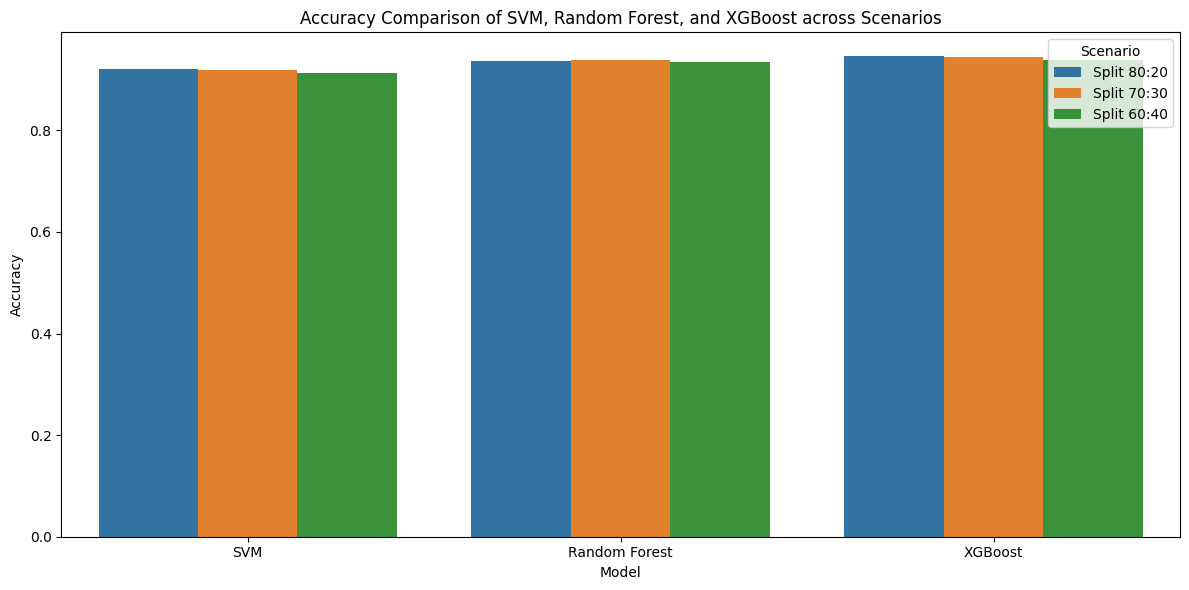

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Scenario', data=results_df)
plt.title('Accuracy Comparison of SVM, Random Forest, and XGBoost across Scenarios')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

## selected

In [ ]:
# Create a DataFrame to store the results
results_df_selected = pd.DataFrame(columns=['Model', 'Scenario', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# SVM Results
svm_results_selected = {
    'SVM': [
        {'Scenario': 'Split 80:20', 'Accuracy': accuracy_svm1_selected, 'Precision': precision_svm1_selected, 'Recall': recall_svm1_selected, 'F1-Score': f1_svm1_selected},
        {'Scenario': 'Split 70:30', 'Accuracy': accuracy_svm2_selected, 'Precision': precision_svm2_selected, 'Recall': recall_svm2_selected, 'F1-Score': f1_svm2_selected},
        {'Scenario': 'Split 60:40', 'Accuracy': accuracy_svm3_selected, 'Precision': precision_svm3_selected, 'Recall': recall_svm3_selected, 'F1-Score': f1_svm3_selected},
    ]
}

# Random Forest Results
rf_results_selected = {
    'Random Forest': [
        {'Scenario': 'Split 80:20', 'Accuracy': accuracy_rf1_selected, 'Precision': precision_rf1_selected, 'Recall': recall_rf1_selected, 'F1-Score': f1_rf1_selected},
        {'Scenario': 'Split 70:30', 'Accuracy': accuracy_rf2_selected, 'Precision': precision_rf2_selected, 'Recall': recall_rf2_selected, 'F1-Score': f1_rf2_selected},
        {'Scenario': 'Split 60:40', 'Accuracy': accuracy_rf3_selected, 'Precision': precision_rf3_selected, 'Recall': recall_rf3_selected, 'F1-Score': f1_rf3_selected},
    ]
}

# XGBoost Results
xgb_results_selected = {
    'XGBoost': [
        {'Scenario': 'Split 80:20', 'Accuracy': accuracy_xgb1_selected, 'Precision': precision_xgb1_selected, 'Recall': recall_xgb1_selected, 'F1-Score': f1_xgb1_selected},
        {'Scenario': 'Split 70:30', 'Accuracy': accuracy_xgb2_selected, 'Precision': precision_xgb2_selected, 'Recall': recall_xgb2_selected, 'F1-Score': f1_xgb2_selected},
        {'Scenario': 'Split 60:40', 'Accuracy': accuracy_xgb3_selected, 'Precision': precision_xgb3_selected, 'Recall': recall_xgb3_selected, 'F1-Score': f1_xgb3_selected},
    ]
}

# Convert the dictionaries to dataframes
svm_df_selected = pd.DataFrame(svm_results_selected['SVM'])
rf_df_selected = pd.DataFrame(rf_results_selected['Random Forest'])
xgb_df_selected = pd.DataFrame(xgb_results_selected['XGBoost'])

# Add the 'Model' column to each dataframe
svm_df_selected['Model'] = 'SVM'
rf_df_selected['Model'] = 'Random Forest'
xgb_df_selected['Model'] = 'XGBoost'

# Concatenate the dataframes
results_df_selected = pd.concat([svm_df_selected, rf_df_selected, xgb_df_selected], ignore_index=True)

# Reorder columns to have 'Model' as the first column
results_df_selected = results_df_selected[['Model', 'Scenario', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Display the results for the family presentation
print("Performance Comparison of SVM, Random Forest, and XGBoost with Selected Features")

# Create a DataFrame from the scenario data
df_selected = pd.DataFrame(results_df_selected)

# Convert DataFrame to a list of rows
rows_selected = df_selected.values.tolist()

# Create a list of headers
headers_selected = df_selected.columns.tolist()

# Generate the table
table_selected = tabulate(rows_selected, headers=headers_selected, tablefmt='fancy_grid')

# Print the table
print(table_selected)

Performance Comparison of SVM, Random Forest, and XGBoost with Selected Features
╒═══════════════╤═════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model         │ Scenario    │   Accuracy │   Precision │   Recall │   F1-Score │
╞═══════════════╪═════════════╪════════════╪═════════════╪══════════╪════════════╡
│ SVM           │ Split 80:20 │   0.92517  │    0.926787 │ 0.92517  │   0.925402 │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM           │ Split 70:30 │   0.922902 │    0.923607 │ 0.922902 │   0.923002 │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM           │ Split 60:40 │   0.918367 │    0.919463 │ 0.918367 │   0.918519 │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest │ Split 80:20 │   0.937075 │    0.938266 │ 0.937075 │   0.936923 │
├───────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Rand

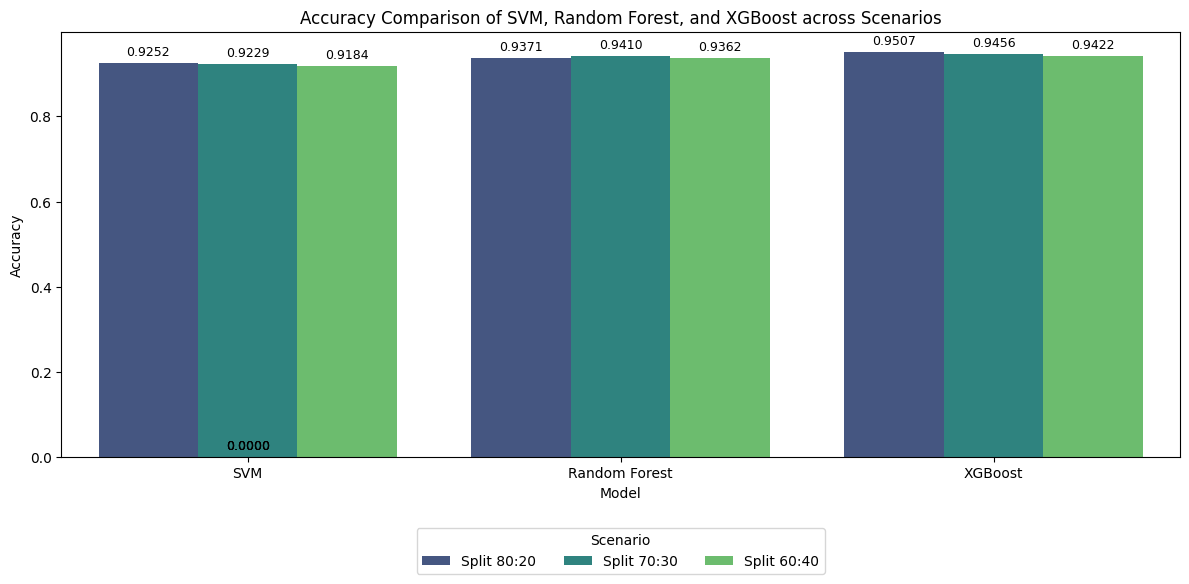

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', hue='Scenario', data=results_df_selected, palette='viridis')
plt.title('Accuracy Comparison of SVM, Random Forest, and XGBoost across Scenarios')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add accuracy values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),  # Show four decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize=9)

# Move the legend below the plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, title='Scenario', fontsize=10)

plt.tight_layout()
plt.show()


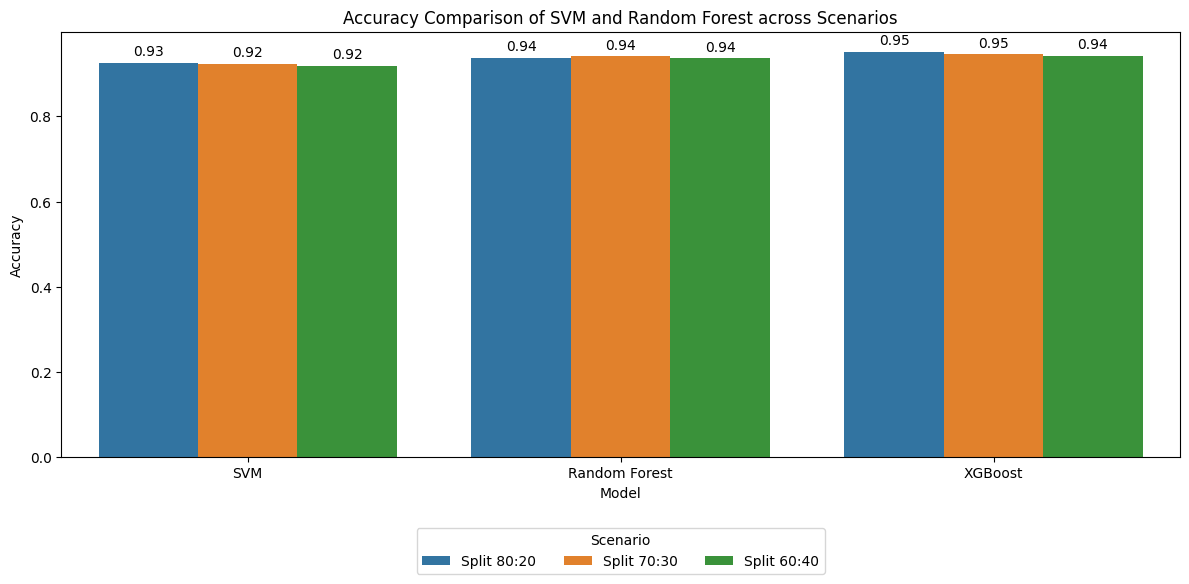

In [ ]:
# Update the plot with legend placed above the graph, avoiding overlap
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', hue='Scenario', data=results_df_selected)
plt.title('Accuracy Comparison of SVM and Random Forest across Scenarios')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Annotate only non-zero bars
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 8),
                    textcoords='offset points')

# Move the legend above the plot without overlapping
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, title='Scenario')

plt.tight_layout()
plt.show()


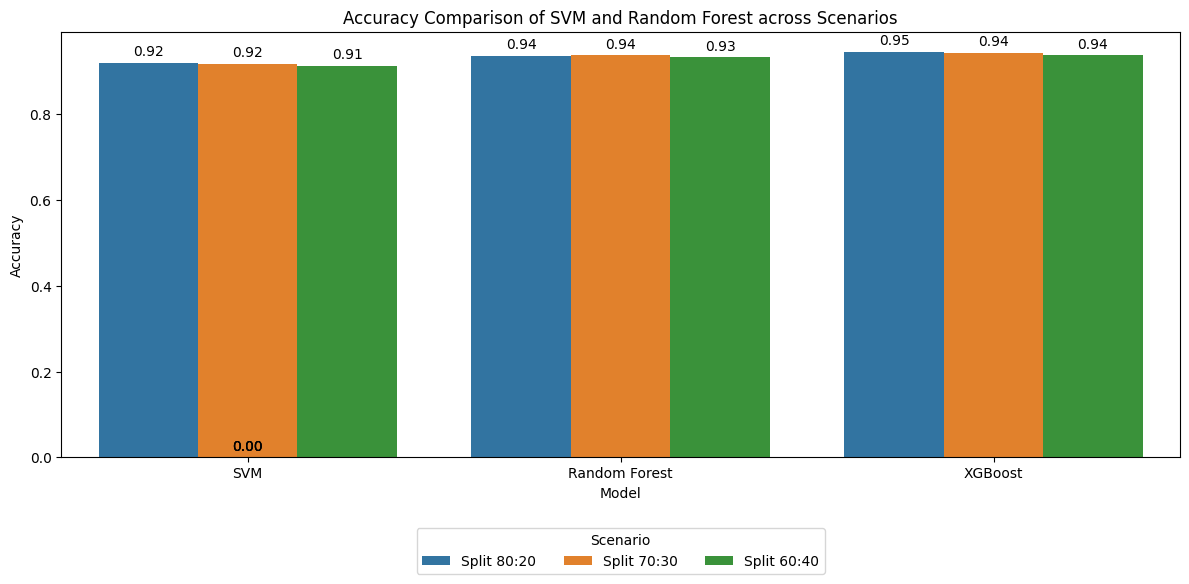

In [ ]:
# prompt: tambahkan nilai akurasi diatas bar nya, ubah box legend diluar grafik atau legend nya dibawah

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', hue='Scenario', data=results_df)
plt.title('Accuracy Comparison of SVM and Random Forest across Scenarios')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add accuracy values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, title='Scenario')

plt.tight_layout()
plt.show()

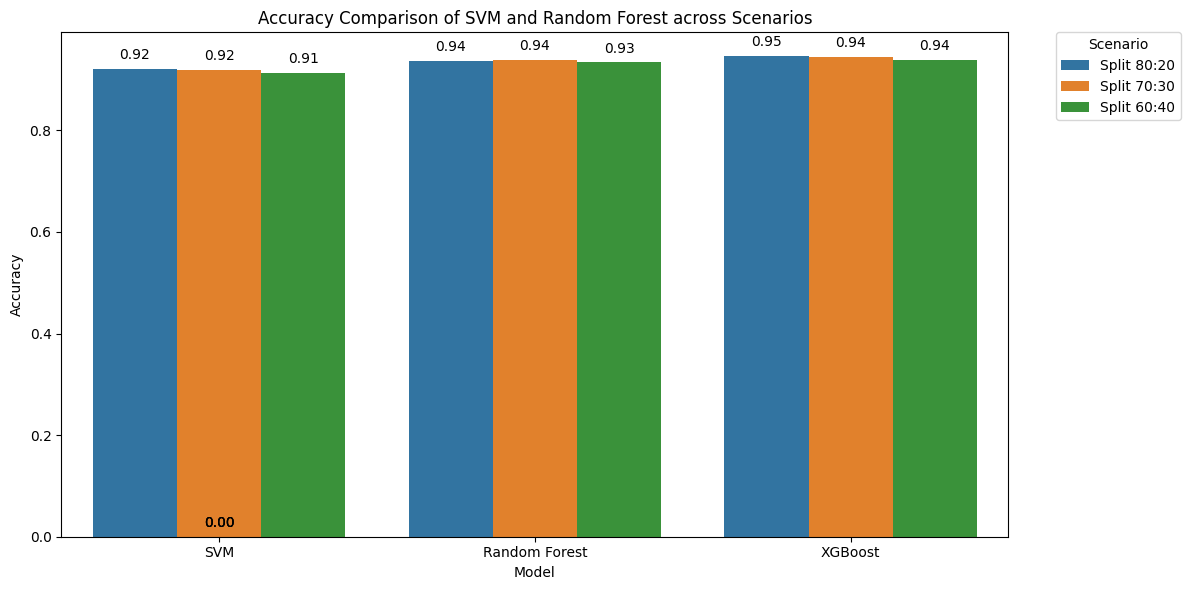

In [ ]:
# prompt: tambahkan nilai akurasi diatas bar nya, ubah box legend diluar grafik atau legend nya diatas tapi didalam ruangan tanpa menimpa grafik batang

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', hue='Scenario', data=results_df)
plt.title('Accuracy Comparison of SVM and Random Forest across Scenarios')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add accuracy values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Scenario') #Modified legend position

plt.tight_layout()
plt.show()

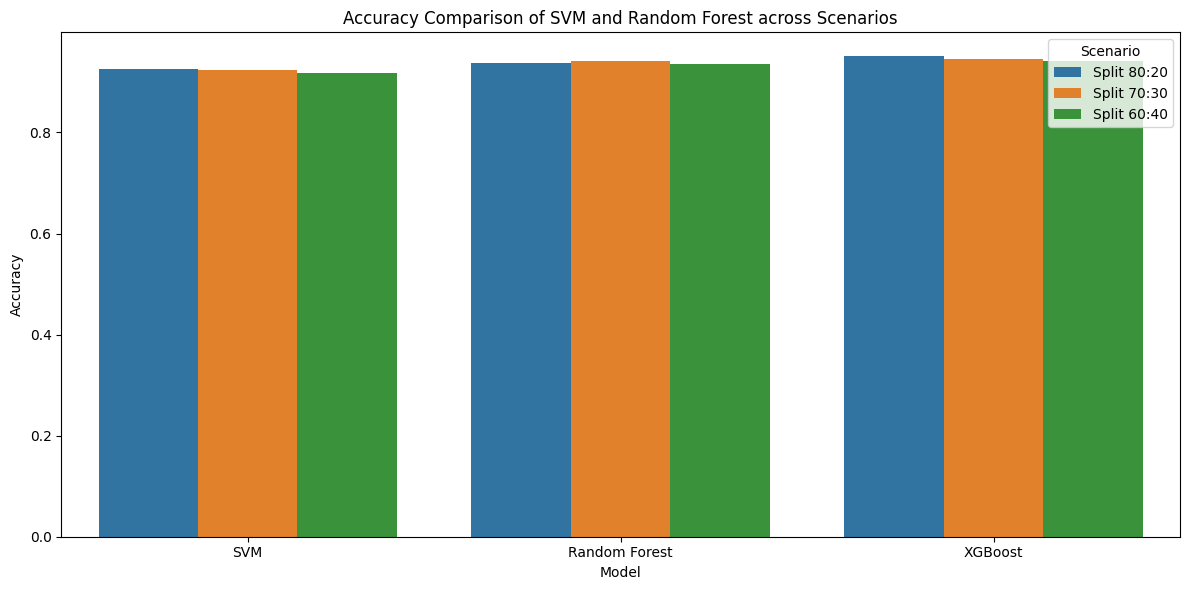

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Scenario', data=results_df_selected)
plt.title('Accuracy Comparison of SVM and Random Forest across Scenarios')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Scenario')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()

## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Skenario 1: Split 80:20

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

2352 2352
588 588



Stacking Model Performance:
Accuracy: 0.9354
Precision: 0.9357
Recall: 0.9354
F1-score: 0.9352
Accuracy Stacking Model: 0.9354
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       193
           1       0.92      0.92      0.92       200
           2       0.94      0.98      0.96       195

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588



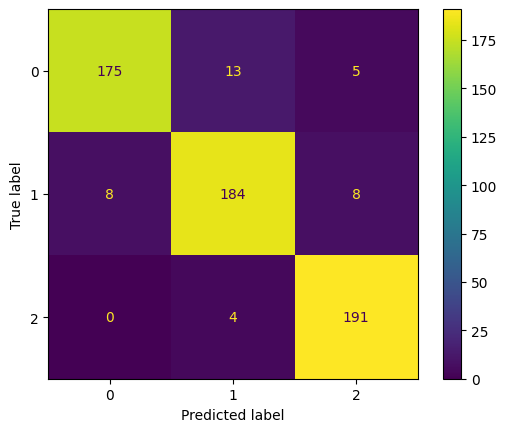

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True, C=100, gamma=1, kernel='rbf', random_state=42)),
    ('rf', RandomForestClassifier(max_depth= 20, min_samples_leaf= 1, min_samples_split=2, n_estimators= 100, random_state=42))
]

# Gunakan Logistic Regression sebagai meta-learner
meta_model = LogisticRegression()

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()



Stacking Model Performance:
Accuracy: 0.9354
Precision: 0.9354
Recall: 0.9354
F1-score: 0.9352
Accuracy Stacking Model: 0.9354
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       193
           1       0.93      0.92      0.92       200
           2       0.94      0.97      0.95       195

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588



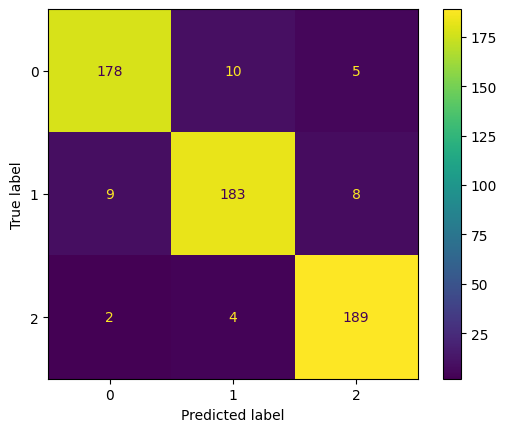

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_model = GradientBoostingClassifier()

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9337
Precision: 0.9339
Recall: 0.9337
F1-score: 0.9336
Accuracy Stacking Model: 0.9337
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       193
           1       0.92      0.92      0.92       200
           2       0.94      0.97      0.95       195

    accuracy                           0.93       588
   macro avg       0.93      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588


Stacking Model Performance:
Accuracy: 0.9337
Precision: 0.9339
Recall: 0.9337
F1-score: 0.9336


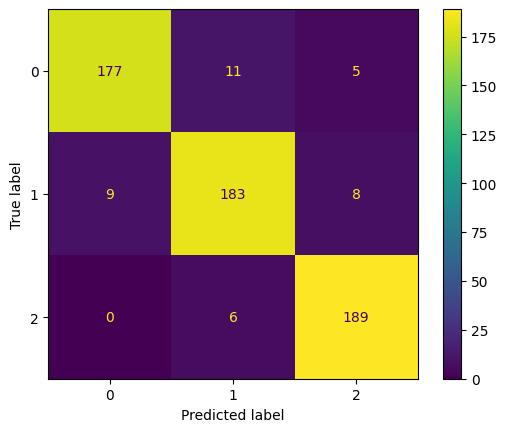

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_learner = XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=42)

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9337
Precision: 0.9346
Recall: 0.9337
F1-score: 0.9337
Accuracy Stacking Model: 0.9337
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       193
           1       0.90      0.93      0.92       200
           2       0.94      0.96      0.95       195

    accuracy                           0.93       588
   macro avg       0.94      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588



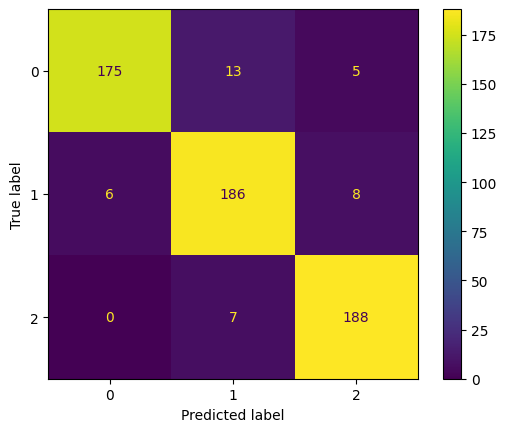

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_learner = LGBMClassifier(n_estimators=50, learning_rate=0.05, random_state=42)

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 2352, number of used features: 14
[LightGBM] [Info] Start training from score -1.094793
[LightGBM] [Info] Start training from score -1.103727
[LightGBM] [Info] Start training from score -1.097338


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 1881, number of used features: 14
[LightGBM] [Info] Start training from score -1.095428
[LightGBM] [Info] Start training from score -1.103408
[LightGBM] [Info] Start training from score -1.097019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 1881, number of used features: 14
[LightGBM] [Info] Start training from score -1.095428
[LightGBM] [Info] Start training from score -1.103408
[LightGBM] [Info] Start training from score -1.097019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 1882, number of used features: 14
[LightGBM] [Info] Start training from score -1.094371
[LightGBM] [Info] Start training from score -1.103940
[LightGBM] [Info] Start training from score -1.097550


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 1882, number of used features: 14
[LightGBM] [Info] Start training from score -1.094371
[LightGBM] [Info] Start training from score -1.103940
[LightGBM] [Info] Start training from score -1.097550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 1882, number of used features: 14
[LightGBM] [Info] Start training from score -1.094371
[LightGBM] [Info] Start training from score -1.103940
[LightGBM] [Info] Start training from score -1.097550


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Stacking Model Performance:
Accuracy: 0.9524
Precision: 0.9525
Recall: 0.9524
F1-score: 0.9522


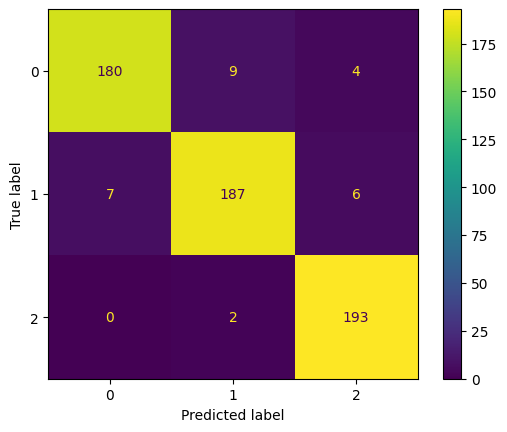

In [ ]:
# Base learners
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Gunakan Logistic Regression sebagai meta-learner
meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf)
    ],
    final_estimator=meta_model,  # Meta learner menggunakan XGBoost atau LightGBM
    passthrough=True  # Gunakan fitur asli selain prediksi base models
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 2352, number of used features: 14
[LightGBM] [Info] Start training from score -1.094793
[LightGBM] [Info] Start training from score -1.103727
[LightGBM] [Info] Start training from score -1.097338


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 1881, number of used features: 14
[LightGBM] [Info] Start training from score -1.095428
[LightGBM] [Info] Start training from score -1.103408
[LightGBM] [Info] Start training from score -1.097019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 1881, number of used features: 14
[LightGBM] [Info] Start training from score -1.095428
[LightGBM] [Info] Start training from score -1.103408
[LightGBM] [Info] Start training from score -1.097019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 1882, number of used features: 14
[LightGBM] [Info] Start training from score -1.094371
[LightGBM] [Info] Start training from score -1.103940
[LightGBM] [Info] Start training from score -1.097550


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 1882, number of used features: 14
[LightGBM] [Info] Start training from score -1.094371
[LightGBM] [Info] Start training from score -1.103940
[LightGBM] [Info] Start training from score -1.097550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 1882, number of used features: 14
[LightGBM] [Info] Start training from score -1.094371
[LightGBM] [Info] Start training from score -1.103940
[LightGBM] [Info] Start training from score -1.097550


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Stacking Model Performance:
Accuracy: 0.9473
Precision: 0.9477
Recall: 0.9473
F1-score: 0.9471


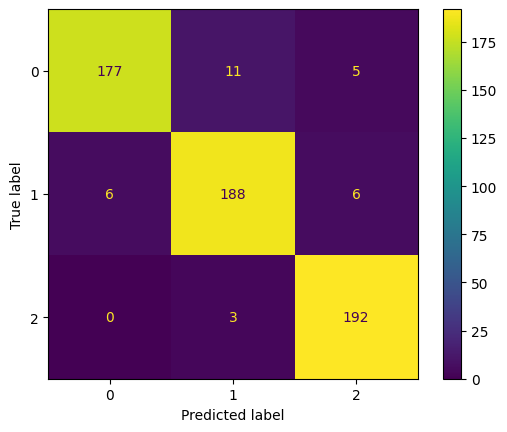

In [ ]:
# Base learners
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Gunakan Logistic Regression sebagai meta-learner
meta_model = GradientBoostingClassifier()

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf)
    ],
    final_estimator=meta_model,  # Meta learner menggunakan XGBoost atau LightGBM
    passthrough=True  # Gunakan fitur asli selain prediksi base models
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Skenario 2: Split 70:30

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

2058 2058
882 882



Stacking Model Performance:
Accuracy: 0.9410
Precision: 0.9412
Recall: 0.9410
F1-score: 0.9409
Accuracy Stacking Model: 0.9410
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       283
           1       0.92      0.93      0.93       306
           2       0.95      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.94      0.94      0.94       882
weighted avg       0.94      0.94      0.94       882



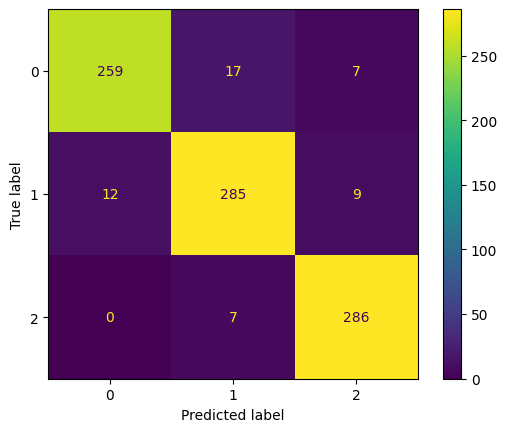

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_model = LogisticRegression()

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9002
Precision: 0.9032
Recall: 0.9002
F1-score: 0.9003
Accuracy Stacking Model: 0.9002
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       283
           1       0.90      0.94      0.92       306
           2       0.96      0.85      0.90       293

    accuracy                           0.90       882
   macro avg       0.90      0.90      0.90       882
weighted avg       0.90      0.90      0.90       882



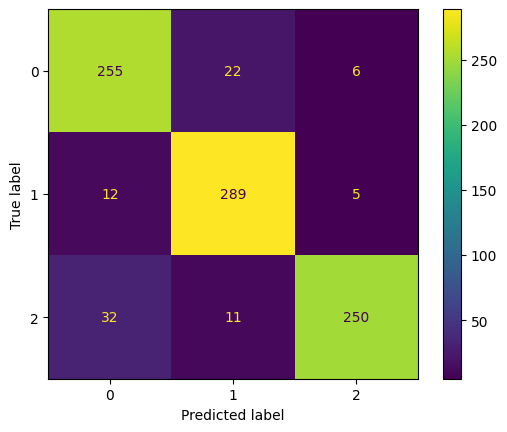

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_model = GradientBoostingClassifier()

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9433
Precision: 0.9436
Recall: 0.9433
F1-score: 0.9432
Accuracy Stacking Model: 0.9433
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       283
           1       0.93      0.93      0.93       306
           2       0.94      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.94      0.94      0.94       882
weighted avg       0.94      0.94      0.94       882



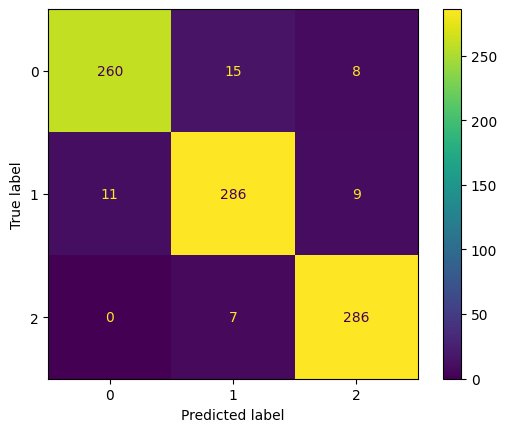

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_learner = XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=42)

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9433
Precision: 0.9436
Recall: 0.9433
F1-score: 0.9431
Accuracy Stacking Model: 0.9433
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       283
           1       0.93      0.94      0.93       306
           2       0.95      0.98      0.96       293

    accuracy                           0.94       882
   macro avg       0.94      0.94      0.94       882
weighted avg       0.94      0.94      0.94       882



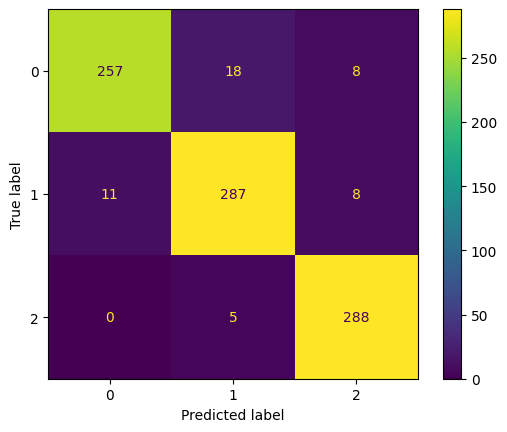

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_learner = LGBMClassifier(n_estimators=50, learning_rate=0.05, random_state=42)

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 2058, number of used features: 14
[LightGBM] [Info] Start training from score -1.082705
[LightGBM] [Info] Start training from score -1.116260
[LightGBM] [Info] Start training from score -1.097156


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 14
[LightGBM] [Info] Start training from score -1.081744
[LightGBM] [Info] Start training from score -1.116388
[LightGBM] [Info] Start training from score -1.098005


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 14
[LightGBM] [Info] Start training from score -1.081744
[LightGBM] [Info] Start training from score -1.116388
[LightGBM] [Info] Start training from score -1.098005


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 14
[LightGBM] [Info] Start training from score -1.083538
[LightGBM] [Info] Start training from score -1.116388
[LightGBM] [Info] Start training from score -1.096185


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 14
[LightGBM] [Info] Start training from score -1.084145
[LightGBM] [Info] Start training from score -1.115142
[LightGBM] [Info] Start training from score -1.096792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 14
[LightGBM] [Info] Start training from score -1.082352
[LightGBM] [Info] Start training from score -1.116995
[LightGBM] [Info] Start training from score -1.096792


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Stacking Model Performance:
Accuracy: 0.9444
Precision: 0.9447
Recall: 0.9444
F1-score: 0.9443


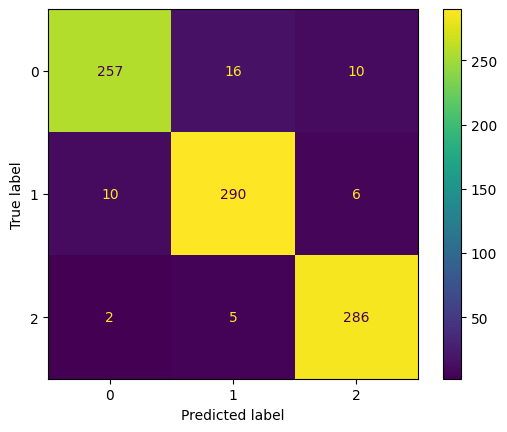

In [ ]:
# Base learners
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Gunakan Logistic Regression sebagai meta-learner
meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf)
    ],
    final_estimator=meta_model,  # Meta learner menggunakan XGBoost atau LightGBM
    passthrough=True  # Gunakan fitur asli selain prediksi base models
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 2058, number of used features: 14
[LightGBM] [Info] Start training from score -1.082705
[LightGBM] [Info] Start training from score -1.116260
[LightGBM] [Info] Start training from score -1.097156


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 14
[LightGBM] [Info] Start training from score -1.081744
[LightGBM] [Info] Start training from score -1.116388
[LightGBM] [Info] Start training from score -1.098005


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 14
[LightGBM] [Info] Start training from score -1.081744
[LightGBM] [Info] Start training from score -1.116388
[LightGBM] [Info] Start training from score -1.098005


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 14
[LightGBM] [Info] Start training from score -1.083538
[LightGBM] [Info] Start training from score -1.116388
[LightGBM] [Info] Start training from score -1.096185


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 14
[LightGBM] [Info] Start training from score -1.084145
[LightGBM] [Info] Start training from score -1.115142
[LightGBM] [Info] Start training from score -1.096792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 14
[LightGBM] [Info] Start training from score -1.082352
[LightGBM] [Info] Start training from score -1.116995
[LightGBM] [Info] Start training from score -1.096792


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Stacking Model Performance:
Accuracy: 0.9478
Precision: 0.9490
Recall: 0.9478
F1-score: 0.9480


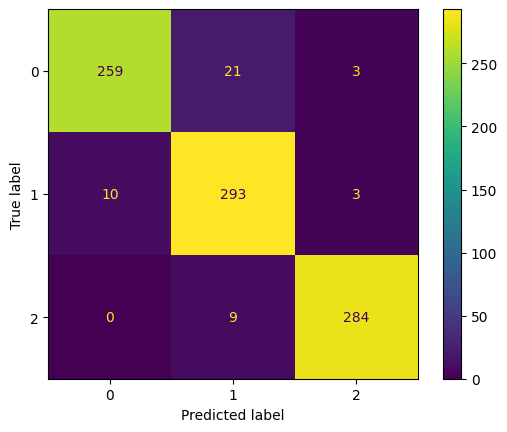

In [ ]:
# Base learners
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Gunakan Logistic Regression sebagai meta-learner
meta_model = GradientBoostingClassifier()

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf)
    ],
    final_estimator=meta_model,  # Meta learner menggunakan XGBoost atau LightGBM
    passthrough=True  # Gunakan fitur asli selain prediksi base models
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Skenario 3: Split 60:40

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

1764 1764
1176 1176



Stacking Model Performance:
Accuracy: 0.9405
Precision: 0.9412
Recall: 0.9405
F1-score: 0.9403
Accuracy Stacking Model: 0.9405
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       398
           1       0.91      0.95      0.93       396
           2       0.95      0.97      0.96       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



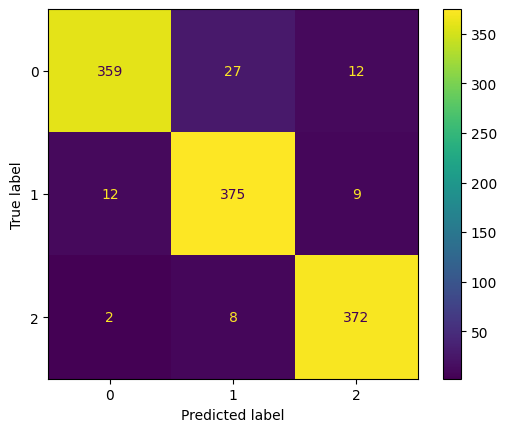

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_model = LogisticRegression()

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9354
Precision: 0.9358
Recall: 0.9354
F1-score: 0.9353
Accuracy Stacking Model: 0.9354
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       398
           1       0.91      0.93      0.92       396
           2       0.95      0.97      0.96       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



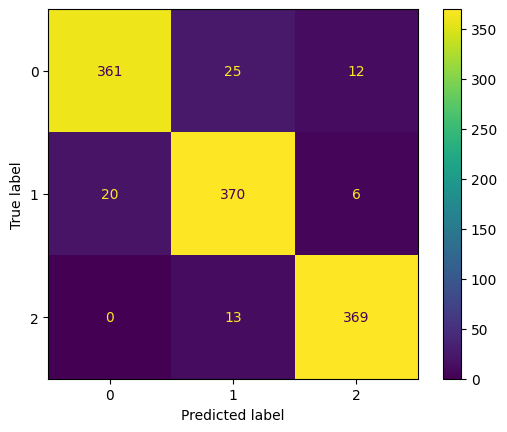

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_model = GradientBoostingClassifier()

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9371
Precision: 0.9380
Recall: 0.9371
F1-score: 0.9370
Accuracy Stacking Model: 0.9371
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       398
           1       0.91      0.95      0.93       396
           2       0.95      0.96      0.95       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



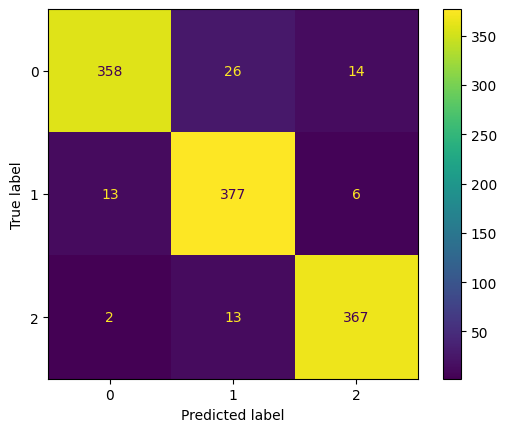

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_learner = XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=42)

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Stacking Model Performance:
Accuracy: 0.9396
Precision: 0.9411
Recall: 0.9396
F1-score: 0.9397
Accuracy Stacking Model: 0.9396
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       398
           1       0.90      0.95      0.93       396
           2       0.96      0.96      0.96       382

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



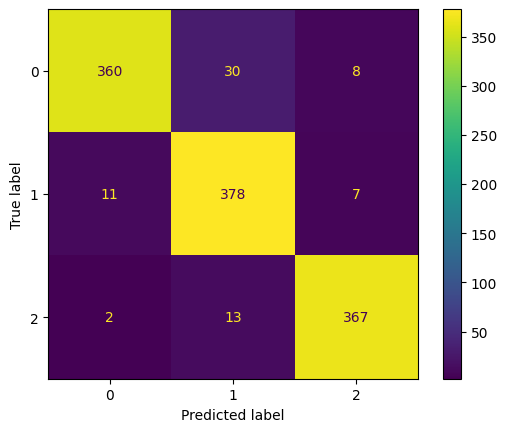

In [ ]:
# Definisikan base models
base_models = [
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Gunakan Logistic Regression sebagai meta-learner
meta_learner = LGBMClassifier(n_estimators=50, learning_rate=0.05, random_state=42)

# Buat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = stacking_model.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Stacking Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 1764, number of used features: 14
[LightGBM] [Info] Start training from score -1.108869
[LightGBM] [Info] Start training from score -1.105438
[LightGBM] [Info] Start training from score -1.081748


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.107868
[LightGBM] [Info] Start training from score -1.105725
[LightGBM] [Info] Start training from score -1.082443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.107868
[LightGBM] [Info] Start training from score -1.105725
[LightGBM] [Info] Start training from score -1.082443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.110017
[LightGBM] [Info] Start training from score -1.103586
[LightGBM] [Info] Start training from score -1.082443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.110017
[LightGBM] [Info] Start training from score -1.105725
[LightGBM] [Info] Start training from score -1.080353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 1412, number of used features: 14
[LightGBM] [Info] Start training from score -1.108577
[LightGBM] [Info] Start training from score -1.106433
[LightGBM] [Info] Start training from score -1.081062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2140
[LightGBM] [Info] Number of data points in the train set: 1764, number of used features: 20
[LightGBM] [Info] Start training from score -1.108869
[LightGBM] [Info] Start training from score -1.105438
[LightGBM] [Info] Start training from score -1.081748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Stacking Model Performance:
Accuracy: 0.9405
Precision: 0.9414
Recall: 0.9405
F1-score: 0.9405


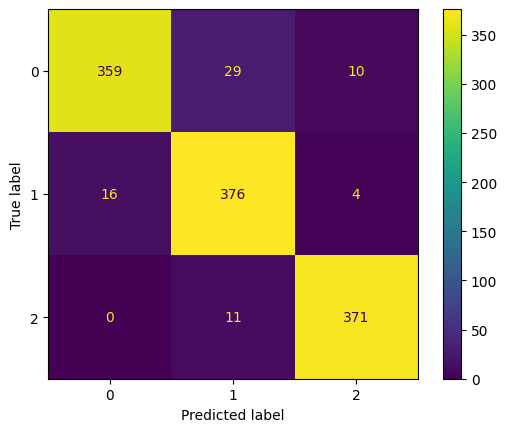

In [ ]:
# Base learners
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Gunakan Logistic Regression sebagai meta-learner
meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf)
    ],
    final_estimator=meta_learner,  # Meta learner menggunakan XGBoost atau LightGBM
    passthrough=True  # Gunakan fitur asli selain prediksi base models
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 1764, number of used features: 14
[LightGBM] [Info] Start training from score -1.108869
[LightGBM] [Info] Start training from score -1.105438
[LightGBM] [Info] Start training from score -1.081748
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.107868
[LightGBM] [Info] Start training from score -1.105725
[LightGBM] [Info] Start trai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.107868
[LightGBM] [Info] Start training from score -1.105725
[LightGBM] [Info] Start training from score -1.082443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.110017
[LightGBM] [Info] Start training from score -1.103586
[LightGBM] [Info] Start training from score -1.082443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 14
[LightGBM] [Info] Start training from score -1.110017
[LightGBM] [Info] Start training from score -1.105725
[LightGBM] [Info] Start training from score -1.080353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 1412, number of used features: 14
[LightGBM] [Info] Start training from score -1.108577
[LightGBM] [Info] Start training from score -1.106433
[LightGBM] [Info] Start training from score -1.081062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Stacking Model Performance:
Accuracy: 0.9294
Precision: 0.9303
Recall: 0.9294
F1-score: 0.9295


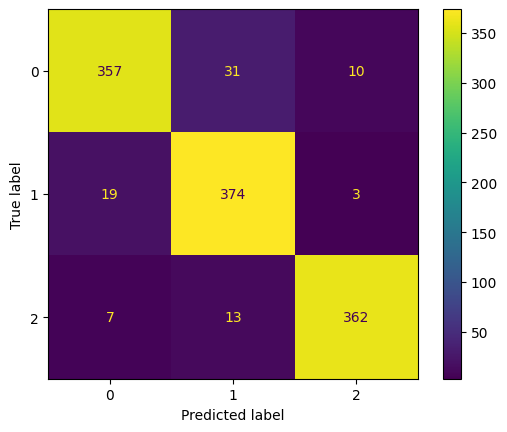

In [ ]:
# Base learners
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Gunakan Logistic Regression sebagai meta-learner
meta_model = GradientBoostingClassifier()

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf)
    ],
    final_estimator=meta_model,  # Meta learner menggunakan XGBoost atau LightGBM
    passthrough=True  # Gunakan fitur asli selain prediksi base models
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print("\nStacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()